In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_colwidth', None)
%matplotlib inline

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/Himanshu-1703/reddit-sentiment-analysis/refs/heads/main/data/reddit.csv')
df.to_csv("data.csv", index=False)
df.head()

,clean_comment,category
0,family mormon have never tried explain them they still stare puzzled from time time like some kind strange creature nonetheless they have come admire for the patience calmness equanimity acceptance and compassion have developed all the things buddhism teaches,1
1,buddhism has very much lot compatible with christianity especially considering that sin and suffering are almost the same thing suffering caused wanting things shouldn want going about getting things the wrong way christian this would mean wanting things that don coincide with god will and wanting things that coincide but without the aid jesus buddhism could also seen proof god all mighty will and omnipotence certainly christians are lucky have one such christ there side but what about everyone else well many christians believe god grace salvation and buddhism god way showing grace upon others would also help study the things jesus said and see how buddha has made similar claims such rich man getting into heaven joke basically advocating that should rid ourselves material possessions fact distinctly remembered jesus making someone cry because that someone asked what achieve salvation and jesus replied with live like buddhist very very roughly translated also point out that buddha rarely spoke anything about god theory personally because knew well enough leave that jesus and mohamed who came later just remember conflict difference opinion but education can fun involving and enlightening easier teach something than prove right like intelligent design,1
2,seriously don say thing first all they won get its too complex explain normal people anyway and they are dogmatic then doesn matter what you say see mechante post and for any reason you decide later life move from buddhism and that doesn suit you identity though you still get keep all the wisdom then your family will treat you like you went through weird hippy phase for while there didncha and you never hear the end pro tip don put one these your wall jpg,-1
3,what you have learned yours and only yours what you want teach different focus the goal not the wrapping paper buddhism can passed others without word about the buddha,0
4,for your own benefit you may want read living buddha living christ thich nhat hanh you might find any subsequent discussions with your loved ones easier you are able articulate some the parallels that exist between buddhism and christianity don surprised they react negatively for having lost you treat them with compassion and deserved understanding although they may indeed display signs being hurt your new path properly sharing with them way that may alleviate their fear something they may perceive wrong the very least alien their beliefs may help allowing them the long run accept although not necessarily agree with your decision regardless where they end you have make your own way,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37249 entries, 0 to 37248
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   clean_comment  37149 non-null  object
 1   category       37249 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 582.1+ KB


In [4]:
df.describe()

,category
count,37249.000000
mean,0.202771
std,0.778515
min,-1.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,1.000000


In [5]:
df.isnull().sum()

clean_comment    100
category           0
dtype: int64

In [6]:
df[df['clean_comment'].isna()]

,clean_comment,category
413,NaN,0
605,NaN,0
2422,NaN,0
2877,NaN,0
3307,NaN,0
...,...,...
35975,NaN,0
36036,NaN,0
37043,NaN,0
37111,NaN,0


In [7]:
df[df['clean_comment'].isna()]['category'].value_counts()

category
0    100
Name: count, dtype: int64

In [8]:
df.dropna(inplace=True)

In [9]:
df.duplicated().sum()

np.int64(350)

In [10]:
df.drop_duplicates(inplace=True)

In [11]:
df[(df['clean_comment'].str.strip() == '')]

,clean_comment,category
181,,0
4432,\n,0
10592,,0
16173,,0
32149,\n,0
34959,,0


In [12]:
df[(df['clean_comment'].str.strip() == '')].shape

(6, 2)

In [13]:
df = df[~(df['clean_comment'].str.strip() == '')]

In [14]:
df['clean_comment'] = df['clean_comment'].str.lower()
df.head()

,clean_comment,category
0,family mormon have never tried explain them they still stare puzzled from time time like some kind strange creature nonetheless they have come admire for the patience calmness equanimity acceptance and compassion have developed all the things buddhism teaches,1
1,buddhism has very much lot compatible with christianity especially considering that sin and suffering are almost the same thing suffering caused wanting things shouldn want going about getting things the wrong way christian this would mean wanting things that don coincide with god will and wanting things that coincide but without the aid jesus buddhism could also seen proof god all mighty will and omnipotence certainly christians are lucky have one such christ there side but what about everyone else well many christians believe god grace salvation and buddhism god way showing grace upon others would also help study the things jesus said and see how buddha has made similar claims such rich man getting into heaven joke basically advocating that should rid ourselves material possessions fact distinctly remembered jesus making someone cry because that someone asked what achieve salvation and jesus replied with live like buddhist very very roughly translated also point out that buddha rarely spoke anything about god theory personally because knew well enough leave that jesus and mohamed who came later just remember conflict difference opinion but education can fun involving and enlightening easier teach something than prove right like intelligent design,1
2,seriously don say thing first all they won get its too complex explain normal people anyway and they are dogmatic then doesn matter what you say see mechante post and for any reason you decide later life move from buddhism and that doesn suit you identity though you still get keep all the wisdom then your family will treat you like you went through weird hippy phase for while there didncha and you never hear the end pro tip don put one these your wall jpg,-1
3,what you have learned yours and only yours what you want teach different focus the goal not the wrapping paper buddhism can passed others without word about the buddha,0
4,for your own benefit you may want read living buddha living christ thich nhat hanh you might find any subsequent discussions with your loved ones easier you are able articulate some the parallels that exist between buddhism and christianity don surprised they react negatively for having lost you treat them with compassion and deserved understanding although they may indeed display signs being hurt your new path properly sharing with them way that may alleviate their fear something they may perceive wrong the very least alien their beliefs may help allowing them the long run accept although not necessarily agree with your decision regardless where they end you have make your own way,1


In [15]:
df[df['clean_comment'].apply(lambda x: x.startswith(' ') or x.endswith(' '))]

,clean_comment,category
0,family mormon have never tried explain them they still stare puzzled from time time like some kind strange creature nonetheless they have come admire for the patience calmness equanimity acceptance and compassion have developed all the things buddhism teaches,1
1,buddhism has very much lot compatible with christianity especially considering that sin and suffering are almost the same thing suffering caused wanting things shouldn want going about getting things the wrong way christian this would mean wanting things that don coincide with god will and wanting things that coincide but without the aid jesus buddhism could also seen proof god all mighty will and omnipotence certainly christians are lucky have one such christ there side but what about everyone else well many christians believe god grace salvation and buddhism god way showing grace upon others would also help study the things jesus said and see how buddha has made similar claims such rich man getting into heaven joke basically advocating that should rid ourselves material possessions fact distinctly remembered jesus making someone cry because that someone asked what achieve salvation and jesus replied with live like buddhist very very roughly translated also point out that buddha rarely spoke anything about god theory personally because knew well enough leave that jesus and mohamed who came later just remember conflict difference opinion but education can fun involving and enlightening easier teach something than prove right like intelligent design,1
2,seriously don say thing first all they won get its too complex explain normal people anyway and they are dogmatic then doesn matter what you say see mechante post and for any reason you decide later life move from buddhism and that doesn suit you identity though you still get keep all the wisdom then your family will treat you like you went through weird hippy phase for while there didncha and you never hear the end pro tip don put one these your wall jpg,-1
3,what you have learned yours and only yours what you want teach different focus the goal not the wrapping paper buddhism can passed others without word about the buddha,0
4,for your own benefit you may want read living buddha living christ thich nhat hanh you might find any subsequent discussions with your loved ones easier you are able articulate some the parallels that exist between buddhism and christianity don surprised they react negatively for having lost you treat them with compassion and deserved understanding although they may indeed display signs being hurt your new path properly sharing with them way that may alleviate their fear something they may perceive wrong the very least alien their beliefs may help allowing them the long run accept although not necessarily agree with your decision regardless where they end you have make your own way,1
...,...,...
37241,let the janta decide not ulema clerics,0
37242,hona hai same with vaccination education insurance there end mohemmadan regressiveness,0
37246,downvote karna tha par upvote hogaya,0
37247,haha nice,1


In [16]:
df['clean_comment'] = df['clean_comment'].str.strip()

In [17]:
df[df['clean_comment'].apply(lambda x: x.startswith(' ') or x.endswith(' '))]

,clean_comment,category


In [18]:
url_pattern = r'http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+'

comments_with_urls = df[df['clean_comment'].str.contains(url_pattern, regex=True)]

comments_with_urls.head()

,clean_comment,category


In [19]:
comments_with_newline = df[df['clean_comment'].str.contains('\n')]
comments_with_newline.head()

clean_comment  \
448                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                            

In [20]:
df['clean_comment'] = df['clean_comment'].str.replace('\n', ' ', regex=True)

In [21]:
df.loc[1354]

clean_comment    amsa press conference australian maritime safety authority emergency response general manager john young and australian transport safety bureau chief commissioner martin dolan attendance article will include video full press conference for the next half hour aspx full press statements young statement would like update you some credible information amsa has received from the atsb which will see the search area refocused today the amsa search for any sign the missing malaysia airlines flight mh370 has been shifted area north following advice from the australian transport safety bureau international air crash investigation team malaysia provided updated advice the atsb which has examined the information and determined area 1100 kilometres the north east the existing search area now the most credible lead where debris may located the new search area approximately 319 000 square kilometres about 1850 kilometres west perth the australian geospatial intelligence organisation 

<Axes: xlabel='category', ylabel='count'>

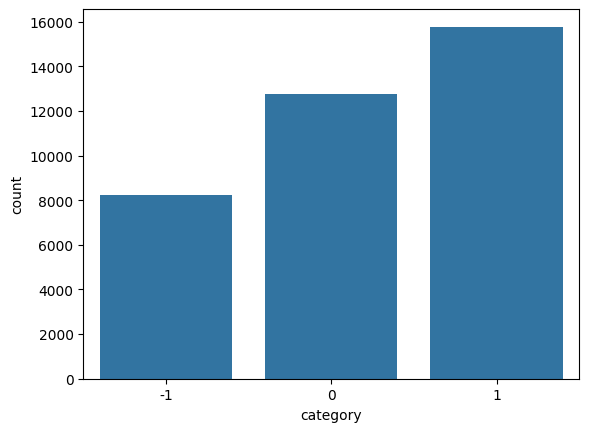

In [22]:
sns.countplot(data=df, x='category')

In [23]:
(df['category'].value_counts(normalize=True) * 100).round(2)

category
 1    42.86
 0    34.71
-1    22.42
Name: proportion, dtype: float64

In [24]:
df['word_count'] = df['clean_comment'].apply(lambda x: len(x.split()))
df.head()

,clean_comment,category,word_count
0,family mormon have never tried explain them they still stare puzzled from time time like some kind strange creature nonetheless they have come admire for the patience calmness equanimity acceptance and compassion have developed all the things buddhism teaches,1,39
1,buddhism has very much lot compatible with christianity especially considering that sin and suffering are almost the same thing suffering caused wanting things shouldn want going about getting things the wrong way christian this would mean wanting things that don coincide with god will and wanting things that coincide but without the aid jesus buddhism could also seen proof god all mighty will and omnipotence certainly christians are lucky have one such christ there side but what about everyone else well many christians believe god grace salvation and buddhism god way showing grace upon others would also help study the things jesus said and see how buddha has made similar claims such rich man getting into heaven joke basically advocating that should rid ourselves material possessions fact distinctly remembered jesus making someone cry because that someone asked what achieve salvation and jesus replied with live like buddhist very very roughly translated also point out that buddha rarely spoke anything about god theory personally because knew well enough leave that jesus and mohamed who came later just remember conflict difference opinion but education can fun involving and enlightening easier teach something than prove right like intelligent design,1,196
2,seriously don say thing first all they won get its too complex explain normal people anyway and they are dogmatic then doesn matter what you say see mechante post and for any reason you decide later life move from buddhism and that doesn suit you identity though you still get keep all the wisdom then your family will treat you like you went through weird hippy phase for while there didncha and you never hear the end pro tip don put one these your wall jpg,-1,86
3,what you have learned yours and only yours what you want teach different focus the goal not the wrapping paper buddhism can passed others without word about the buddha,0,29
4,for your own benefit you may want read living buddha living christ thich nhat hanh you might find any subsequent discussions with your loved ones easier you are able articulate some the parallels that exist between buddhism and christianity don surprised they react negatively for having lost you treat them with compassion and deserved understanding although they may indeed display signs being hurt your new path properly sharing with them way that may alleviate their fear something they may perceive wrong the very least alien their beliefs may help allowing them the long run accept although not necessarily agree with your decision regardless where they end you have make your own way,1,112


In [25]:
df.describe()

,category,word_count
count,36793.000000,36793.000000
mean,0.204414,29.667464
std,0.781729,56.790738
min,-1.000000,1.000000
25%,0.000000,6.000000
50%,0.000000,13.000000
75%,1.000000,30.000000
max,1.000000,1307.000000


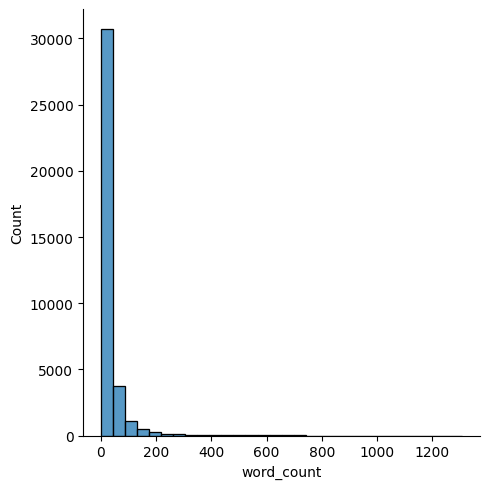

In [26]:
sns.displot(df['word_count'], bins=30)

Text(0.5, 1.0, 'Distribution of Word Count by Sentiment Category')

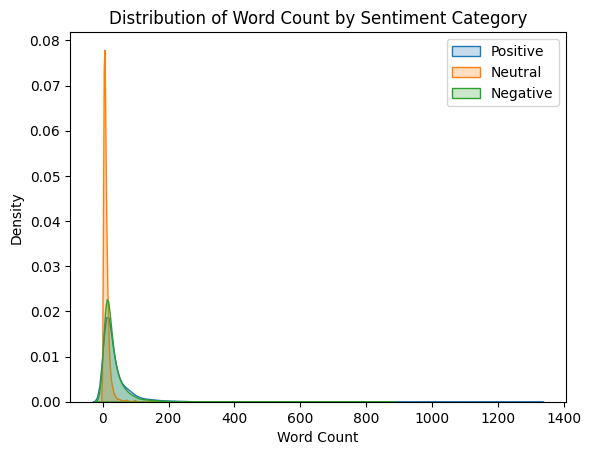

In [27]:
plt.Figure(figsize=(10,6))

sns.kdeplot(df[df['category'] == 1]['word_count'], label='Positive', fill=True)

sns.kdeplot(df[df['category'] == 0]['word_count'], label='Neutral', fill=True)

sns.kdeplot(df[df['category'] == -1]['word_count'], label='Negative', fill=True)

plt.legend()
plt.xlabel('Word Count')
plt.title('Distribution of Word Count by Sentiment Category')


<Axes: ylabel='word_count'>

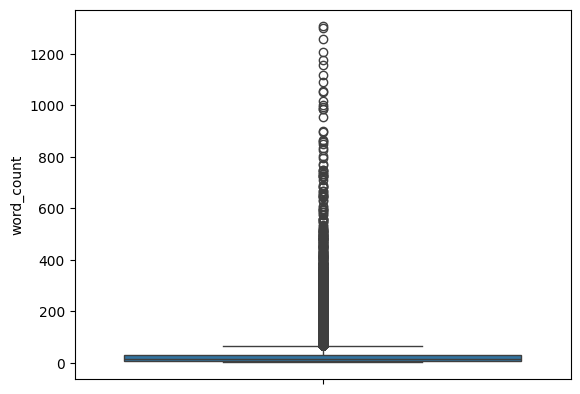

In [28]:
sns.boxplot(df['word_count'])

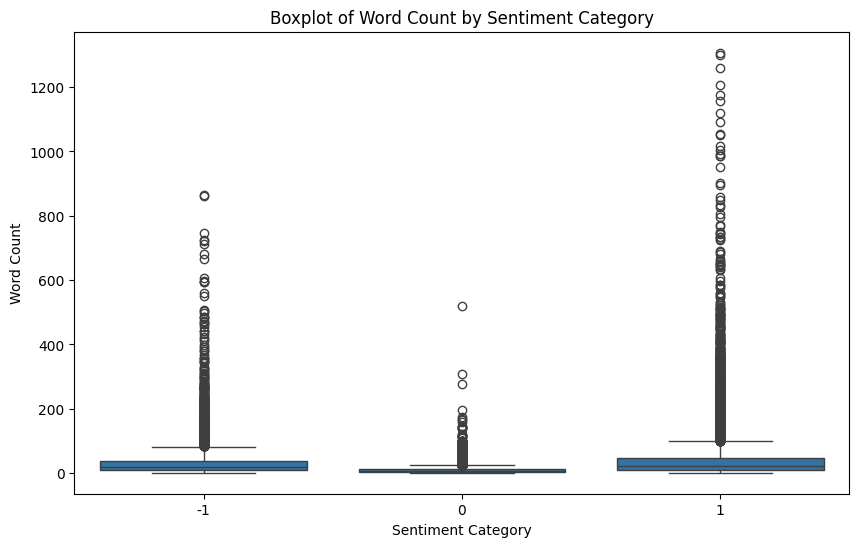

In [29]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='category', y='word_count')
plt.title('Boxplot of Word Count by Sentiment Category')
plt.xlabel('Sentiment Category')
plt.ylabel('Word Count')
plt.show()

<Axes: xlabel='category', ylabel='word_count'>

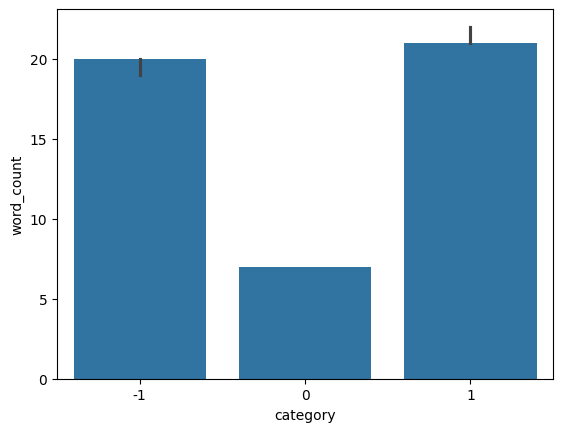

In [30]:
sns.barplot(data=df, x='category', y='word_count', estimator='median')

In [31]:
from nltk.corpus import stopwords
import nltk

nltk.download('stopwords')

stopwords = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\arpit\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [32]:
df['num_stop_words'] = df['clean_comment'].apply(lambda x: len([word for word in x.split() if word in stopwords]))

In [33]:
df.head()

,clean_comment,category,word_count,num_stop_words
0,family mormon have never tried explain them they still stare puzzled from time time like some kind strange creature nonetheless they have come admire for the patience calmness equanimity acceptance and compassion have developed all the things buddhism teaches,1,39,13
1,buddhism has very much lot compatible with christianity especially considering that sin and suffering are almost the same thing suffering caused wanting things shouldn want going about getting things the wrong way christian this would mean wanting things that don coincide with god will and wanting things that coincide but without the aid jesus buddhism could also seen proof god all mighty will and omnipotence certainly christians are lucky have one such christ there side but what about everyone else well many christians believe god grace salvation and buddhism god way showing grace upon others would also help study the things jesus said and see how buddha has made similar claims such rich man getting into heaven joke basically advocating that should rid ourselves material possessions fact distinctly remembered jesus making someone cry because that someone asked what achieve salvation and jesus replied with live like buddhist very very roughly translated also point out that buddha rarely spoke anything about god theory personally because knew well enough leave that jesus and mohamed who came later just remember conflict difference opinion but education can fun involving and enlightening easier teach something than prove right like intelligent design,1,196,59
2,seriously don say thing first all they won get its too complex explain normal people anyway and they are dogmatic then doesn matter what you say see mechante post and for any reason you decide later life move from buddhism and that doesn suit you identity though you still get keep all the wisdom then your family will treat you like you went through weird hippy phase for while there didncha and you never hear the end pro tip don put one these your wall jpg,-1,86,40
3,what you have learned yours and only yours what you want teach different focus the goal not the wrapping paper buddhism can passed others without word about the buddha,0,29,15
4,for your own benefit you may want read living buddha living christ thich nhat hanh you might find any subsequent discussions with your loved ones easier you are able articulate some the parallels that exist between buddhism and christianity don surprised they react negatively for having lost you treat them with compassion and deserved understanding although they may indeed display signs being hurt your new path properly sharing with them way that may alleviate their fear something they may perceive wrong the very least alien their beliefs may help allowing them the long run accept although not necessarily agree with your decision regardless where they end you have make your own way,1,112,45


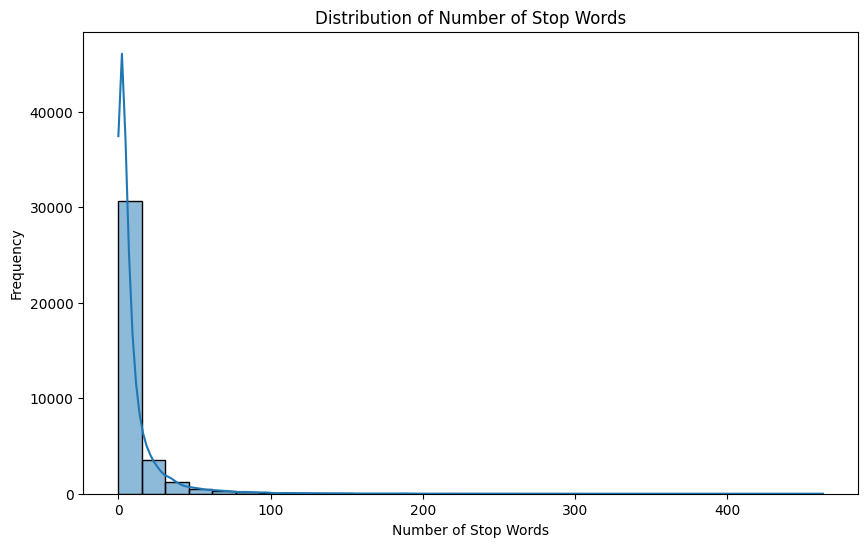

In [34]:
plt.figure(figsize=(10,6))
sns.histplot(df['num_stop_words'], bins=30, kde=True)
plt.title('Distribution of Number of Stop Words')
plt.xlabel('Number of Stop Words')
plt.ylabel('Frequency')
plt.show()

<Axes: xlabel='category', ylabel='num_stop_words'>

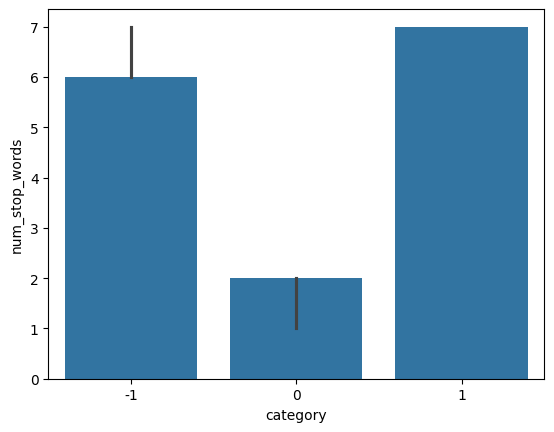

In [35]:
sns.barplot(data=df, x='category', y='num_stop_words', estimator='median')

In [36]:
from collections import Counter

all_stop_words = [word for sentence in df['clean_comment'] for word in sentence.split() if word in stopwords]

most_common_stop_words = Counter(all_stop_words).most_common(20)

top_20_stop_words = pd.DataFrame(most_common_stop_words, columns=['stop_word', 'count'])

In [37]:
top_20_stop_words

,stop_word,count
0,the,57669
1,and,28950
2,that,15372
3,this,13463
4,for,12976
5,you,11723
6,are,10566
7,not,8691
8,they,8654
9,have,8380


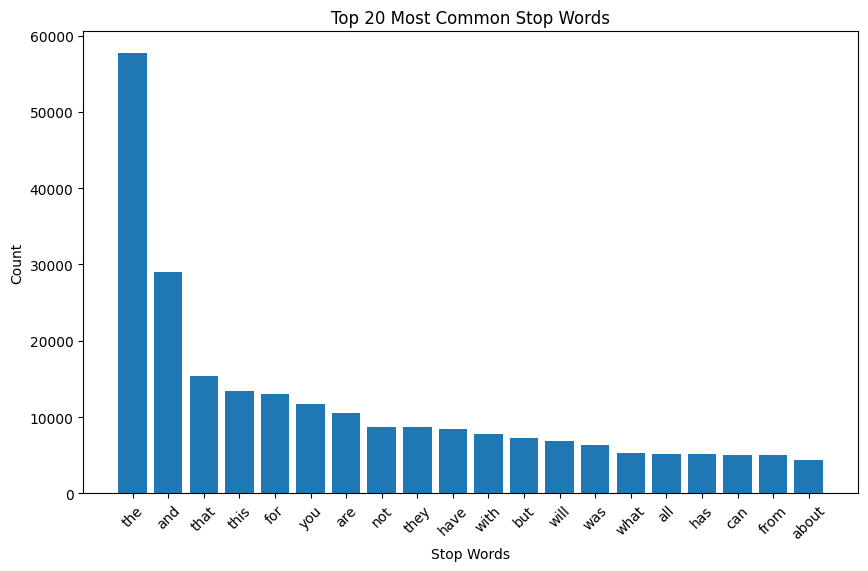

In [38]:
plt.figure(figsize=(10, 6))
plt.bar(top_20_stop_words['stop_word'], top_20_stop_words['count'])
plt.xticks(rotation=45)
plt.title('Top 20 Most Common Stop Words')
plt.xlabel('Stop Words')
plt.ylabel('Count')
plt.show()

In [39]:
df['num_chars'] = df['clean_comment'].apply(len)
df.head()

,clean_comment,category,word_count,num_stop_words,num_chars
0,family mormon have never tried explain them they still stare puzzled from time time like some kind strange creature nonetheless they have come admire for the patience calmness equanimity acceptance and compassion have developed all the things buddhism teaches,1,39,13,259
1,buddhism has very much lot compatible with christianity especially considering that sin and suffering are almost the same thing suffering caused wanting things shouldn want going about getting things the wrong way christian this would mean wanting things that don coincide with god will and wanting things that coincide but without the aid jesus buddhism could also seen proof god all mighty will and omnipotence certainly christians are lucky have one such christ there side but what about everyone else well many christians believe god grace salvation and buddhism god way showing grace upon others would also help study the things jesus said and see how buddha has made similar claims such rich man getting into heaven joke basically advocating that should rid ourselves material possessions fact distinctly remembered jesus making someone cry because that someone asked what achieve salvation and jesus replied with live like buddhist very very roughly translated also point out that buddha rarely spoke anything about god theory personally because knew well enough leave that jesus and mohamed who came later just remember conflict difference opinion but education can fun involving and enlightening easier teach something than prove right like intelligent design,1,196,59,1268
2,seriously don say thing first all they won get its too complex explain normal people anyway and they are dogmatic then doesn matter what you say see mechante post and for any reason you decide later life move from buddhism and that doesn suit you identity though you still get keep all the wisdom then your family will treat you like you went through weird hippy phase for while there didncha and you never hear the end pro tip don put one these your wall jpg,-1,86,40,459
3,what you have learned yours and only yours what you want teach different focus the goal not the wrapping paper buddhism can passed others without word about the buddha,0,29,15,167
4,for your own benefit you may want read living buddha living christ thich nhat hanh you might find any subsequent discussions with your loved ones easier you are able articulate some the parallels that exist between buddhism and christianity don surprised they react negatively for having lost you treat them with compassion and deserved understanding although they may indeed display signs being hurt your new path properly sharing with them way that may alleviate their fear something they may perceive wrong the very least alien their beliefs may help allowing them the long run accept although not necessarily agree with your decision regardless where they end you have make your own way,1,112,45,690


<Axes: xlabel='category', ylabel='num_chars'>

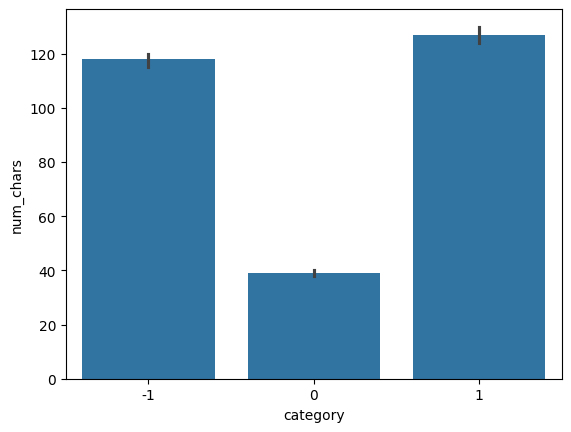

In [40]:
sns.barplot(data=df, x='category', y='num_chars', estimator='median')

In [41]:
from collections import Counter

all_text = ' '.join(df['clean_comment'])

char_freq = Counter(all_text)

char_freq_df = pd.DataFrame(char_freq.items(), columns=['character', 'count']).sort_values(by='count', ascending=False)

In [42]:
char_freq_df

,character,count
6,,1091592
12,e,666610
13,t,491287
1,a,481134
3,i,401388
...,...,...
1345,唯,1
1346,统,1
1330,段,1
1331,她,1


In [43]:
char_freq_df['character'].values

array([' ', 'e', 't', ..., '段', '她', '谁'], shape=(1378,), dtype=object)

In [44]:
char_freq_df.tail(10)

,character,count
1340,遥,1
1341,则,1
1342,豹,1
1343,皿,1
1344,煮,1
1345,唯,1
1346,统,1
1330,段,1
1331,她,1
1332,谁,1


In [45]:
df['num_punctuation_chars'] = df['clean_comment'].apply(lambda x: sum([1 for char in x if char in '!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~']))

In [46]:
df.tail()

,clean_comment,category,word_count,num_stop_words,num_chars,num_punctuation_chars
37244,jesus,0,1,0,5,0
37245,kya bhai pure saal chutiya banaya modi aur jab saal khatam hone hai sala tune bhi chutiya bana diya,1,19,0,99,0
37246,downvote karna tha par upvote hogaya,0,6,0,36,0
37247,haha nice,1,2,0,9,0
37248,facebook itself now working bjp’ cell,0,6,2,37,0


In [47]:
df['num_punctuation_chars'].describe()

count    36793.000000
mean         0.022531
std          0.765155
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max        136.000000
Name: num_punctuation_chars, dtype: float64

In [48]:
from sklearn.feature_extraction.text import CountVectorizer

def get_top_ngrams(corpus, n=None):
    vec = CountVectorizer(ngram_range=(2,2), stop_words='english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_of_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_of_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key= lambda x: x[1], reverse=True)
    return words_freq[:n]

In [49]:
top_25_bigrams = get_top_ngrams(df['clean_comment'], n=25)

In [50]:
top_25_bigrams

[('free encyclopedia', np.int64(623)),
 ('encyclopedia team', np.int64(598)),
 ('good good', np.int64(409)),
 ('prime minister', np.int64(389)),
 ('best overall', np.int64(375)),
 ('don know', np.int64(352)),
 ('looks like', np.int64(339)),
 ('don think', np.int64(334)),
 ('team reached', np.int64(322)),
 ('social media', np.int64(316)),
 ('movie movie', np.int64(276)),
 ('narendra modi', np.int64(272)),
 ('rahul gandhi', np.int64(264)),
 ('lot lot', np.int64(232)),
 ('reached free', np.int64(224)),
 ('right wing', np.int64(207)),
 ('team sports', np.int64(206)),
 ('overall submitter', np.int64(204)),
 ('submitter best', np.int64(195)),
 ('just like', np.int64(189)),
 ('movie good', np.int64(183)),
 ('amit shah', np.int64(169)),
 ('overall post', np.int64(168)),
 ('people like', np.int64(162)),
 ('post best', np.int64(162))]

In [51]:
top_25_bigrams_df = pd.DataFrame(top_25_bigrams, columns=['bigram', 'count'])
top_25_bigrams_df.head()

,bigram,count
0,free encyclopedia,623
1,encyclopedia team,598
2,good good,409
3,prime minister,389
4,best overall,375


C:\Users\arpit\AppData\Local\Temp\ipykernel_29412\1874762148.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y='bigram', x='count', data=top_25_bigrams_df, palette='viridis')


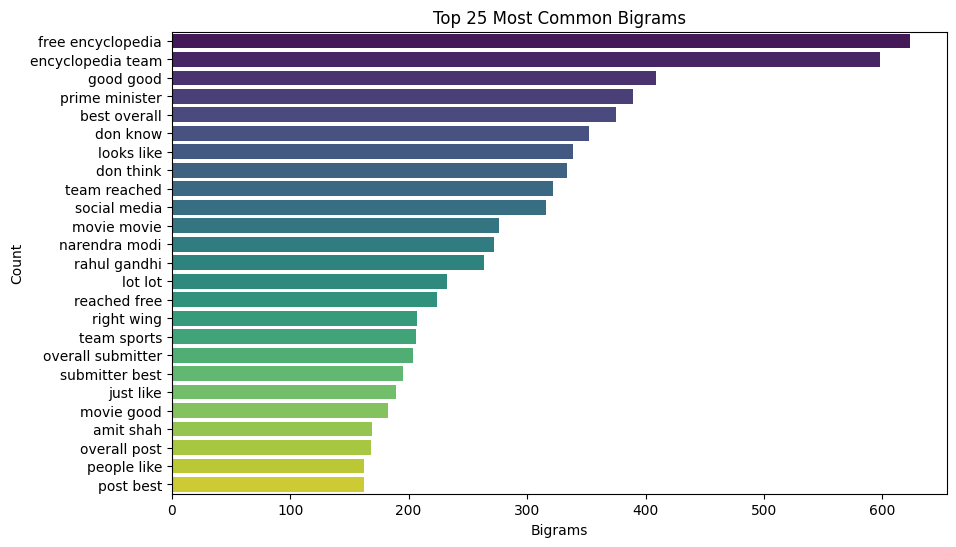

In [52]:
plt.figure(figsize=(10, 6))
sns.barplot(y='bigram', x='count', data=top_25_bigrams_df, palette='viridis')
plt.title('Top 25 Most Common Bigrams')
plt.xlabel('Bigrams')
plt.ylabel('Count')
plt.show()

In [53]:
def get_top_trigrams(corpus, n=None):
    vec = CountVectorizer(ngram_range=(3,3), stop_words='english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_of_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_of_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key= lambda x: x[1], reverse=True)
    return words_freq[:n]

In [54]:
top_25_trigrams = get_top_trigrams(df['clean_comment'], n=25)

In [55]:
top_25_trigrams_df = pd.DataFrame(top_25_trigrams, columns=['trigram', 'count'])
top_25_trigrams_df.head()

,trigram,count
0,free encyclopedia team,598
1,good good good,385
2,encyclopedia team reached,316
3,movie movie movie,266
4,team reached free,224


C:\Users\arpit\AppData\Local\Temp\ipykernel_29412\1353097892.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y='trigram', x='count', data=top_25_trigrams_df, palette='viridis')


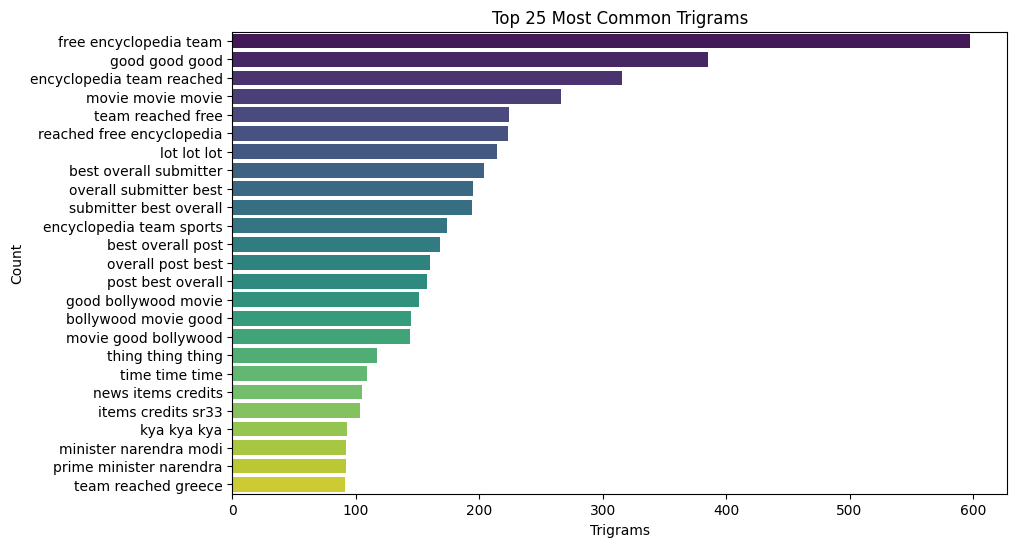

In [56]:
plt.figure(figsize=(10, 6))
sns.barplot(y='trigram', x='count', data=top_25_trigrams_df, palette='viridis')
plt.title('Top 25 Most Common Trigrams')
plt.xlabel('Trigrams')
plt.ylabel('Count')
plt.show()

In [57]:
import re

df['clean_comment'] = df['clean_comment'].apply(lambda x: re.sub(r'[^A-Za-z0-9\s!?.,]', '', str(x)))

In [58]:
all_text = ' '.join(df['clean_comment'])

char_freq = Counter(all_text)

char_freq_df = pd.DataFrame(char_freq.items(), columns=['character', 'count']).sort_values(by='count', ascending=False)

char_freq_df.head(15)

,character,count
6,,1091592
12,e,666610
13,t,491287
1,a,481134
3,i,401388
9,n,388465
7,o,379908
17,s,355279
8,r,331425
10,h,296748


In [59]:
df.head()

,clean_comment,category,word_count,num_stop_words,num_chars,num_punctuation_chars
0,family mormon have never tried explain them they still stare puzzled from time time like some kind strange creature nonetheless they have come admire for the patience calmness equanimity acceptance and compassion have developed all the things buddhism teaches,1,39,13,259,0
1,buddhism has very much lot compatible with christianity especially considering that sin and suffering are almost the same thing suffering caused wanting things shouldn want going about getting things the wrong way christian this would mean wanting things that don coincide with god will and wanting things that coincide but without the aid jesus buddhism could also seen proof god all mighty will and omnipotence certainly christians are lucky have one such christ there side but what about everyone else well many christians believe god grace salvation and buddhism god way showing grace upon others would also help study the things jesus said and see how buddha has made similar claims such rich man getting into heaven joke basically advocating that should rid ourselves material possessions fact distinctly remembered jesus making someone cry because that someone asked what achieve salvation and jesus replied with live like buddhist very very roughly translated also point out that buddha rarely spoke anything about god theory personally because knew well enough leave that jesus and mohamed who came later just remember conflict difference opinion but education can fun involving and enlightening easier teach something than prove right like intelligent design,1,196,59,1268,0
2,seriously don say thing first all they won get its too complex explain normal people anyway and they are dogmatic then doesn matter what you say see mechante post and for any reason you decide later life move from buddhism and that doesn suit you identity though you still get keep all the wisdom then your family will treat you like you went through weird hippy phase for while there didncha and you never hear the end pro tip don put one these your wall jpg,-1,86,40,459,0
3,what you have learned yours and only yours what you want teach different focus the goal not the wrapping paper buddhism can passed others without word about the buddha,0,29,15,167,0
4,for your own benefit you may want read living buddha living christ thich nhat hanh you might find any subsequent discussions with your loved ones easier you are able articulate some the parallels that exist between buddhism and christianity don surprised they react negatively for having lost you treat them with compassion and deserved understanding although they may indeed display signs being hurt your new path properly sharing with them way that may alleviate their fear something they may perceive wrong the very least alien their beliefs may help allowing them the long run accept although not necessarily agree with your decision regardless where they end you have make your own way,1,112,45,690,0


In [60]:
from nltk.corpus import stopwords

stopwords = set(stopwords.words('english')) - {'not', 'but', 'however', 'no', 'yet', 'only'}

df['clean_comment'] = df['clean_comment'].apply(lambda x: ' '.join([word for word in x.split() if word.lower() not in stopwords]))
df['word_count'] = df['clean_comment'].apply(lambda x: len(x.split()))
df['num_stop_words'] = df['clean_comment'].apply(lambda x: len([word for word in x.split() if word in stopwords]))
df['num_chars'] = df['clean_comment'].apply(len)
df['num_punctuation_chars'] = df['clean_comment'].apply(lambda x: sum([1 for char in x if char in '!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~']))

In [61]:
df.head()

,clean_comment,category,word_count,num_stop_words,num_chars,num_punctuation_chars
0,family mormon never tried explain still stare puzzled time time like kind strange creature nonetheless come admire patience calmness equanimity acceptance compassion developed things buddhism teaches,1,26,0,199,0
1,buddhism much lot compatible christianity especially considering sin suffering almost thing suffering caused wanting things want going getting things wrong way christian would mean wanting things coincide god wanting things coincide but without aid jesus buddhism could also seen proof god mighty omnipotence certainly christians lucky one christ side but everyone else well many christians believe god grace salvation buddhism god way showing grace upon others would also help study things jesus said see buddha made similar claims rich man getting heaven joke basically advocating rid material possessions fact distinctly remembered jesus making someone cry someone asked achieve salvation jesus replied live like buddhist roughly translated also point buddha rarely spoke anything god theory personally knew well enough leave jesus mohamed came later remember conflict difference opinion but education fun involving enlightening easier teach something prove right like intelligent design,1,140,0,990,0
2,seriously say thing first get complex explain normal people anyway dogmatic matter say see mechante post reason decide later life move buddhism suit identity though still get keep wisdom family treat like went weird hippy phase didncha never hear end pro tip put one wall jpg,-1,46,0,275,0
3,learned only want teach different focus goal not wrapping paper buddhism passed others without word buddha,0,16,0,106,0
4,benefit may want read living buddha living christ thich nhat hanh might find subsequent discussions loved ones easier able articulate parallels exist buddhism christianity surprised react negatively lost treat compassion deserved understanding although may indeed display signs hurt new path properly sharing way may alleviate fear something may perceive wrong least alien beliefs may help allowing long run accept although not necessarily agree decision regardless end make way,1,68,0,478,0


In [62]:
from nltk.stem import WordNetLemmatizer

nltk.download('wordnet')

lemmatizer = WordNetLemmatizer()

df['clean_comment'] = df['clean_comment'].apply(lambda x: ' '.join([lemmatizer.lemmatize(word) for word in x.split()]))

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\arpit\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [63]:
df.head()

,clean_comment,category,word_count,num_stop_words,num_chars,num_punctuation_chars
0,family mormon never tried explain still stare puzzled time time like kind strange creature nonetheless come admire patience calmness equanimity acceptance compassion developed thing buddhism teach,1,26,0,199,0
1,buddhism much lot compatible christianity especially considering sin suffering almost thing suffering caused wanting thing want going getting thing wrong way christian would mean wanting thing coincide god wanting thing coincide but without aid jesus buddhism could also seen proof god mighty omnipotence certainly christian lucky one christ side but everyone else well many christian believe god grace salvation buddhism god way showing grace upon others would also help study thing jesus said see buddha made similar claim rich man getting heaven joke basically advocating rid material possession fact distinctly remembered jesus making someone cry someone asked achieve salvation jesus replied live like buddhist roughly translated also point buddha rarely spoke anything god theory personally knew well enough leave jesus mohamed came later remember conflict difference opinion but education fun involving enlightening easier teach something prove right like intelligent design,1,140,0,990,0
2,seriously say thing first get complex explain normal people anyway dogmatic matter say see mechante post reason decide later life move buddhism suit identity though still get keep wisdom family treat like went weird hippy phase didncha never hear end pro tip put one wall jpg,-1,46,0,275,0
3,learned only want teach different focus goal not wrapping paper buddhism passed others without word buddha,0,16,0,106,0
4,benefit may want read living buddha living christ thich nhat hanh might find subsequent discussion loved one easier able articulate parallel exist buddhism christianity surprised react negatively lost treat compassion deserved understanding although may indeed display sign hurt new path properly sharing way may alleviate fear something may perceive wrong least alien belief may help allowing long run accept although not necessarily agree decision regardless end make way,1,68,0,478,0


In [64]:
from wordcloud import WordCloud

def plot_word_cloud(text):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(text))
    plt.figure(figsize=(10, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()

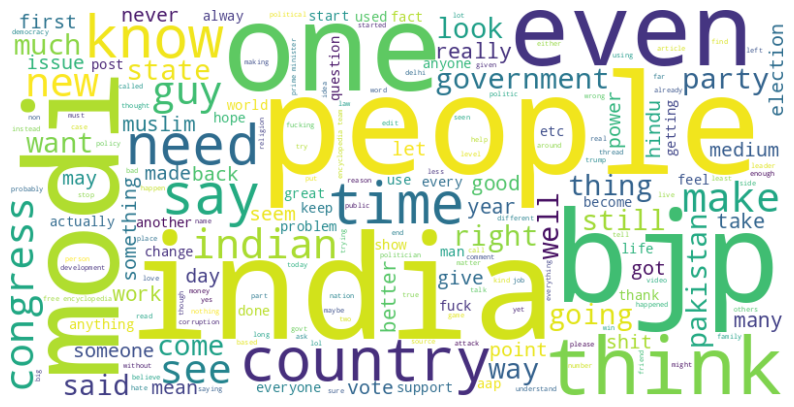

In [65]:
plot_word_cloud(df['clean_comment'])

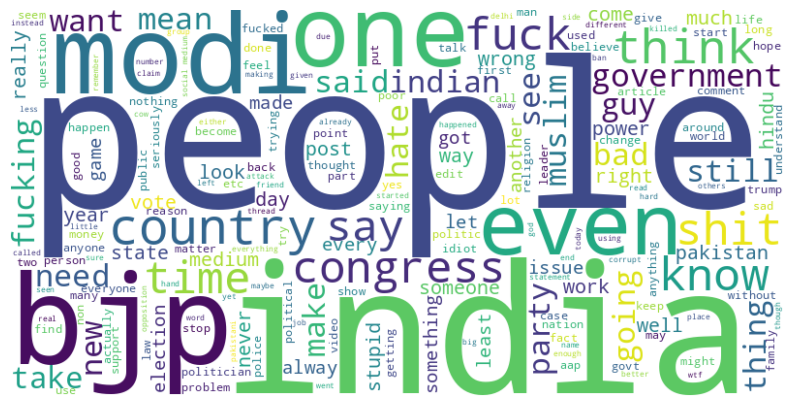

In [66]:
plot_word_cloud(df[df['category'] == -1]['clean_comment'])

In [67]:
def plot_top_n_words(df, n=20):
    words = ' '.join(df['clean_comment']).split()

    counter = Counter(words)
    most_common_words = counter.most_common(n)
    words, counts = zip(*most_common_words)

    plt.figure(figsize=(15,10))
    sns.barplot(x=list(counts), y=list(words))
    plt.title(f"Top {n} Most Common Words")
    plt.xlabel("Frequency")
    plt.ylabel("Words")
    plt.show()

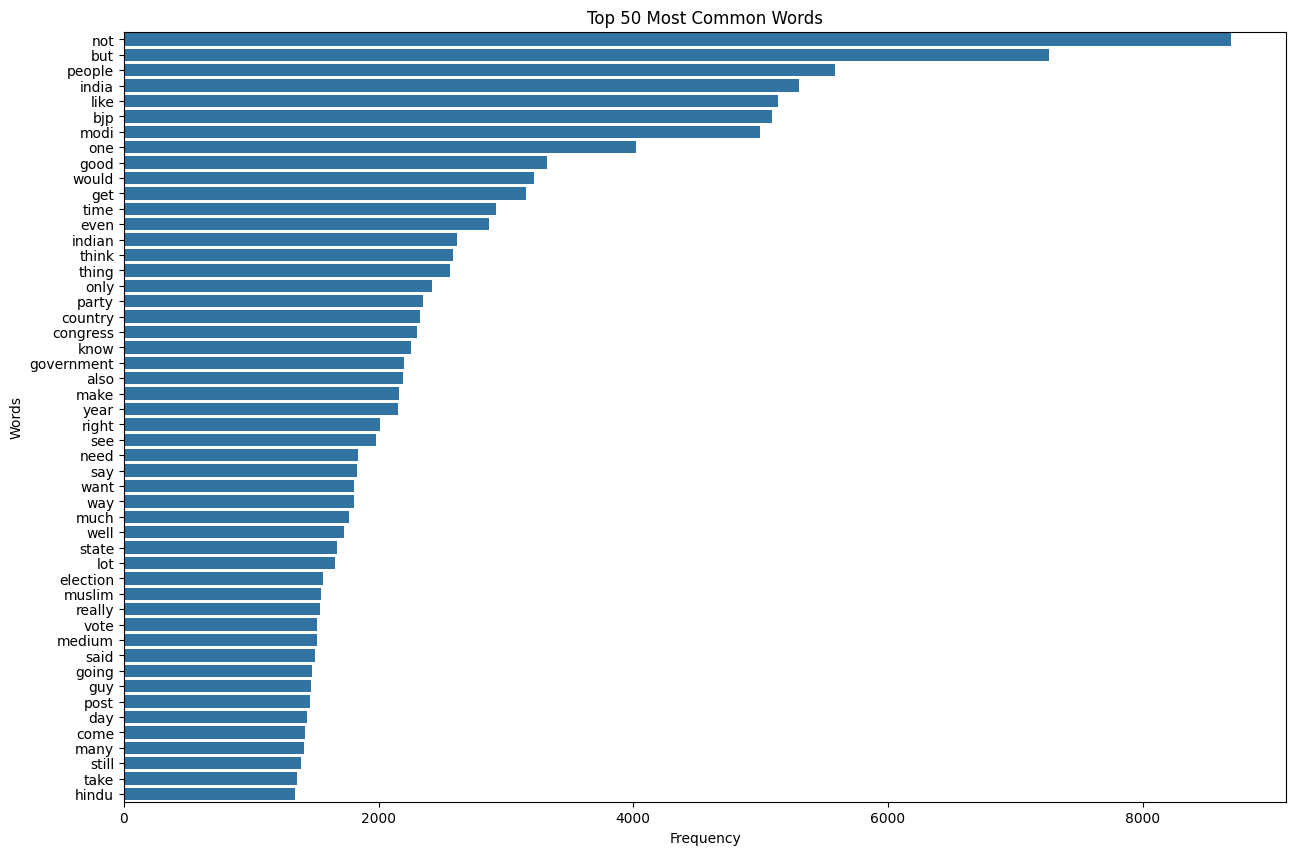

In [68]:
plot_top_n_words(df, 50)

In [69]:
def plot_top_n_words_by_category(df, n=20, start=0):

    word_category_counts = {}

    for idx, row in df.iterrows():
        words = row['clean_comment'].split()
        category = row['category']

        for word in words:
            if word not in word_category_counts:
                word_category_counts[word] = { -1: 0, 0: 0, 1: 0 }

            word_category_counts[word][category] += 1

    total_word_counts = {word: sum(counts.values()) for word, counts in word_category_counts.items()}

    most_common_words = sorted(total_word_counts.items(), key=lambda x: x[1], reverse=True)[start:start+n]
    top_words = [word for word, _ in most_common_words]

    word_labels = top_words
    negative_counts = [word_category_counts[word][-1] for word in top_words]
    neutral_counts = [word_category_counts[word][0] for word in top_words]
    positive_counts = [word_category_counts[word][1] for word in top_words]

    plt.figure(figsize=(12, 8))
    bar_width = 0.75

    plt.barh(word_labels, negative_counts, color='red', label='Negative (-1)', height=bar_width)
    plt.barh(word_labels, neutral_counts, left=negative_counts, color='gray', label='Neutral (0)', height=bar_width)
    plt.barh(word_labels, positive_counts, left=[i+j for i,j in zip(negative_counts, neutral_counts)], color='green', label='Positive (1)', height=bar_width)

    plt.xlabel('Frequency')
    plt.ylabel('Words')
    plt.title(f'Top {n} Most Frequent Words with Stacked Sentiment Categories')
    plt.legend(title='Sentiment', loc='lower right')
    plt.gca().invert_yaxis()
    plt.show()


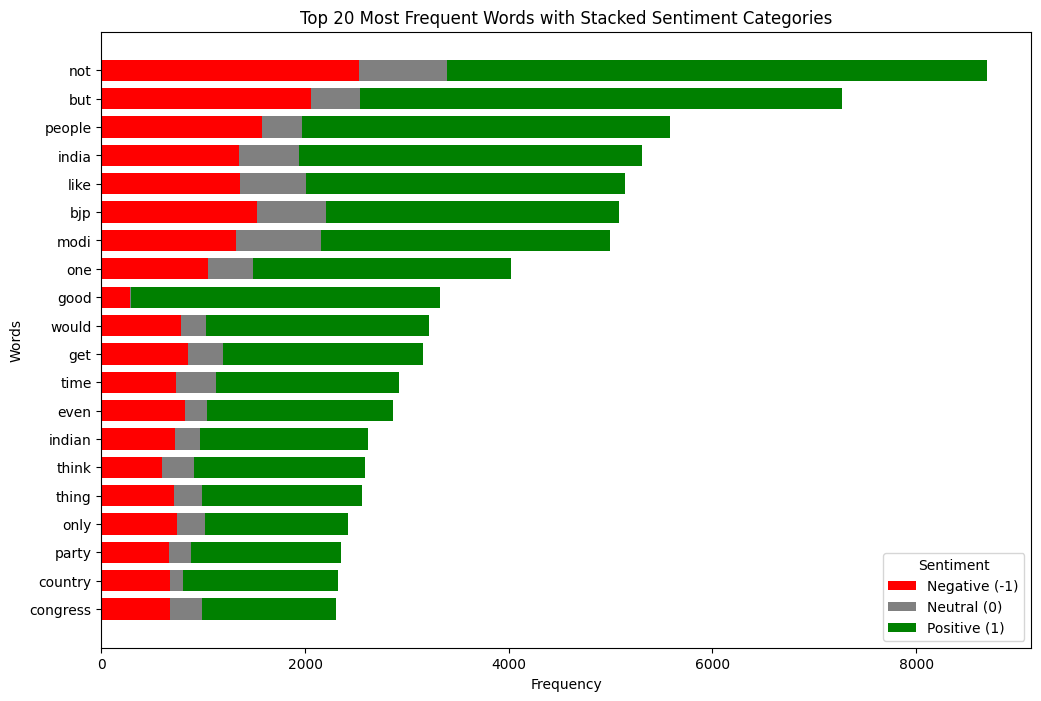

In [70]:
plot_top_n_words_by_category(df, n=20)

In [71]:
import os
import mlflow
import dagshub
from dotenv import load_dotenv
load_dotenv()

os.environ['MLFLOW_TRACKING_URI'] = os.getenv('MLFLOW_TRACKING_URI')
os.environ['MLFLOW_TRACKING_USERNAME'] = os.getenv('MLFLOW_TRACKING_USERNAME')
os.environ['MLFLOW_TRACKING_PASSWORD'] = os.getenv('MLFLOW_TRACKING_PASSWORD')

dagshub.init(repo_owner='ArpitKadam', repo_name='SentimentalAI', mlflow=True)

with mlflow.start_run():
  mlflow.log_param('parameter name', 'value')
  mlflow.log_metric('metric name', 1)

Accessing as ArpitKadam

Initialized MLflow to track repo "ArpitKadam/SentimentalAI"

Repository ArpitKadam/SentimentalAI initialized!

🏃 View run orderly-bird-489 at: https://dagshub.com/ArpitKadam/SentimentalAI.mlflow/#/experiments/0/runs/efadb329d2c44f1193ad6d22ec37c8b1
🧪 View experiment at: https://dagshub.com/ArpitKadam/SentimentalAI.mlflow/#/experiments/0


In [73]:
df.drop(columns=["word_count", "num_stop_words", "num_chars", "num_punctuation_chars"], inplace=True, axis=1)

In [98]:
df.head()

,clean_comment,category
0,family mormon never tried explain still stare puzzled time time like kind strange creature nonetheless come admire patience calmness equanimity acceptance compassion developed thing buddhism teach,1
1,buddhism much lot compatible christianity especially considering sin suffering almost thing suffering caused wanting thing want going getting thing wrong way christian would mean wanting thing coincide god wanting thing coincide but without aid jesus buddhism could also seen proof god mighty omnipotence certainly christian lucky one christ side but everyone else well many christian believe god grace salvation buddhism god way showing grace upon others would also help study thing jesus said see buddha made similar claim rich man getting heaven joke basically advocating rid material possession fact distinctly remembered jesus making someone cry someone asked achieve salvation jesus replied live like buddhist roughly translated also point buddha rarely spoke anything god theory personally knew well enough leave jesus mohamed came later remember conflict difference opinion but education fun involving enlightening easier teach something prove right like intelligent design,1
2,seriously say thing first get complex explain normal people anyway dogmatic matter say see mechante post reason decide later life move buddhism suit identity though still get keep wisdom family treat like went weird hippy phase didncha never hear end pro tip put one wall jpg,-1
3,learned only want teach different focus goal not wrapping paper buddhism passed others without word buddha,0
4,benefit may want read living buddha living christ thich nhat hanh might find subsequent discussion loved one easier able articulate parallel exist buddhism christianity surprised react negatively lost treat compassion deserved understanding although may indeed display sign hurt new path properly sharing way may alleviate fear something may perceive wrong least alien belief may help allowing long run accept although not necessarily agree decision regardless end make way,1


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import mlflow
import mlflow.sklearn
import optuna
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB
from mlflow.models.signature import infer_signature
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split, cross_val_predict, StratifiedKFold
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc, precision_recall_curve
from imblearn.over_sampling import SMOTE, ADASYN
from imblearn.under_sampling import RandomUnderSampler
from imblearn.combine import SMOTEENN
%matplotlib inline

In [77]:
vectorizer = CountVectorizer(max_features=10000)
x = vectorizer.fit_transform(df['clean_comment']).toarray()
y = df['category']

In [78]:
x.shape

(36793, 10000)

In [79]:
y.shape

(36793,)

In [80]:
import os
from dotenv import load_dotenv
load_dotenv()

MLFLOW_TRACKING_URI = os.getenv('MLFLOW_TRACKING_URI')
MLFLOW_TRACKING_USERNAME = os.getenv('MLFLOW_TRACKING_USERNAME')
MLFLOW_TRACKING_PASSWORD = os.getenv('MLFLOW_TRACKING_PASSWORD')

In [82]:
dagshub.init(repo_owner='ArpitKadam', repo_name='SentimentalAI', mlflow=True)
mlflow.set_experiment("RF Baseline Model")

Initialized MLflow to track repo "ArpitKadam/SentimentalAI"

Repository ArpitKadam/SentimentalAI initialized!

2025/09/20 20:06:25 INFO mlflow.tracking.fluent: Experiment with name 'RF Baseline Model' does not exist. Creating a new experiment.


<Experiment: artifact_location='mlflow-artifacts:/a5e4e0d3424d4b2dbea2b542f5b50117', creation_time=1758378985514, experiment_id='1', last_update_time=1758378985514, lifecycle_stage='active', name='RF Baseline Model', tags={}>

In [83]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42, stratify=y)

In [ ]:
with mlflow.start_run() as run:
    mlflow.set_tag("mlflow.runName", "Random Forest Classifier Baseline 1")
    mlflow.set_tag("experiment_type", "Baseline")
    mlflow.set_tag("model_type", "RandomForestClassifier")
    mlflow.set_tag("description", "Baseline model using RandomForestClassifier with Bag of Words (BOW).")

    # Params
    mlflow.log_param("vectorizer", "CountVectorizer")
    mlflow.log_param("vectorizer_max_features", vectorizer.max_features)

    n_estimators = 200
    max_depth = 15
    mlflow.log_param("n_estimators", n_estimators)
    mlflow.log_param("max_depth", max_depth)

    # Train
    model = RandomForestClassifier(n_estimators=n_estimators, max_depth=max_depth, random_state=42)
    model.fit(x_train, y_train)

    # Predictions
    y_pred = model.predict(x_test)

    # Metrics
    acc = accuracy_score(y_test, y_pred)
    cls_report = classification_report(y_test, y_pred, output_dict=True)
    conf_matrix = confusion_matrix(y_test, y_pred)

    mlflow.log_metric("accuracy", acc)

    # Log classification report metrics
    for label, metrics in cls_report.items():
        if isinstance(metrics, dict):
            for metric_name, metric_value in metrics.items():
                mlflow.log_metric(f"{label}_{metric_name}", metric_value)

    # Save & log artifacts
    with open("classification_report.txt", "w") as f:
        f.write(str(cls_report))
    mlflow.log_artifact("classification_report.txt")

    with open("confusion_matrix.txt", "w") as f:
        f.write(str(conf_matrix))
    mlflow.log_artifact("confusion_matrix.txt")

    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=model.classes_, yticklabels=model.classes_)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix')
    plt.savefig("confusion_matrix.png")
    mlflow.log_artifact("confusion_matrix.png")
    plt.close()

    # Log dataset
    df.to_csv("dataset.csv", index=False)
    mlflow.log_artifact("dataset.csv")

    # Log model
    mlflow.sklearn.log_model(model, "random_forest_model")

print(f"Accuracy: {acc}")


2025/09/20 20:26:53 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run Random Forest Classifier Baseline at: https://dagshub.com/ArpitKadam/SentimentalAI.mlflow/#/experiments/1/runs/a44ccf1bd13347a1b89e2597fda580f3
🧪 View experiment at: https://dagshub.com/ArpitKadam/SentimentalAI.mlflow/#/experiments/1
Accuracy: 0.6503601032749015


In [ ]:
with mlflow.start_run() as run:
    mlflow.set_tag("mlflow.runName", "Random Forest Classifier Baseline 2")
    mlflow.set_tag("experiment_type", "Baseline")
    mlflow.set_tag("model_type", "RandomForestClassifier")
    mlflow.set_tag("description", "Baseline model using RandomForestClassifier with Bag of Words (BOW).")

    # Params
    mlflow.log_param("vectorizer", "CountVectorizer")
    mlflow.log_param("vectorizer_max_features", vectorizer.max_features)

    n_estimators = 100
    max_depth = 10
    mlflow.log_param("n_estimators", n_estimators)
    mlflow.log_param("max_depth", max_depth)

    # Train
    model = RandomForestClassifier(n_estimators=n_estimators, max_depth=max_depth, random_state=42)
    model.fit(x_train, y_train)

    # Predictions
    y_pred = model.predict(x_test)

    # Metrics
    acc = accuracy_score(y_test, y_pred)
    cls_report = classification_report(y_test, y_pred, output_dict=True)
    conf_matrix = confusion_matrix(y_test, y_pred)

    mlflow.log_metric("accuracy", acc)

    # Log classification report metrics
    for label, metrics in cls_report.items():
        if isinstance(metrics, dict):
            for metric_name, metric_value in metrics.items():
                mlflow.log_metric(f"{label}_{metric_name}", metric_value)

    # Save & log artifacts
    with open("classification_report.txt", "w") as f:
        f.write(str(cls_report))
    mlflow.log_artifact("classification_report.txt")

    with open("confusion_matrix.txt", "w") as f:
        f.write(str(conf_matrix))
    mlflow.log_artifact("confusion_matrix.txt")

    # Confusion Matrix plot
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
                xticklabels=model.classes_, yticklabels=model.classes_)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix')
    plt.savefig("confusion_matrix.png")
    mlflow.log_artifact("confusion_matrix.png")
    plt.close()

    # Feature importance
    feature_importances = model.feature_importances_
    indices = np.argsort(feature_importances)[::-1][:20]  # top 20
    top_features = [vectorizer.get_feature_names_out()[i] for i in indices]

    plt.figure(figsize=(10, 6))
    sns.barplot(x=feature_importances[indices], y=top_features)
    plt.title("Top 20 Feature Importances")
    plt.xlabel("Importance")
    plt.ylabel("Features")
    plt.tight_layout()
    plt.savefig("feature_importances.png")
    mlflow.log_artifact("feature_importances.png")
    plt.close()

    # Log dataset
    df.to_csv("dataset.csv", index=False)
    mlflow.log_artifact("dataset.csv")

    # Log model with signature and input example
    signature = infer_signature(x_train, model.predict(x_train))
    input_example = x_test[:1]

    mlflow.sklearn.log_model(
        sk_model=model,
        artifact_path="random_forest_model",
        signature=signature,
        input_example=input_example
    )

print(f"Accuracy: {acc}")


🏃 View run Random Forest Classifier Baseline 2 at: https://dagshub.com/ArpitKadam/SentimentalAI.mlflow/#/experiments/1/runs/3a2cd58fb83d43d9b1a3a56dd99abb41
🧪 View experiment at: https://dagshub.com/ArpitKadam/SentimentalAI.mlflow/#/experiments/1
Accuracy: 0.625764370158989


In [96]:
mlflow.set_experiment("BOW vs TFIDF")

2025/09/20 20:51:04 INFO mlflow.tracking.fluent: Experiment with name 'BOW vs TFIDF' does not exist. Creating a new experiment.


<Experiment: artifact_location='mlflow-artifacts:/e1238e199d274d13ac0fcdd87d6af333', creation_time=1758381664265, experiment_id='2', last_update_time=1758381664265, lifecycle_stage='active', name='BOW vs TFIDF', tags={}>

In [99]:
def run_experiment(vectorizer_type, ngram_range, vectorizer_max_features, vectorizer_name):

    if vectorizer_type == "BOW":
        vectorizer = CountVectorizer(ngram_range=ngram_range, max_features=vectorizer_max_features)
    else:
        vectorizer = TfidfVectorizer(ngram_range=ngram_range, max_features=vectorizer_max_features)

    x_train, x_test, y_train, y_test = train_test_split(df['clean_comment'], df['category'], test_size=0.2, random_state=42, stratify=df['category'])

    x_train = vectorizer.fit_transform(x_train)
    x_test = vectorizer.transform(x_test)

    with mlflow.start_run() as run:
        mlflow.set_tag("mlflow.runName", f"{vectorizer_name} with NGram {ngram_range} - RF")
        mlflow.set_tag("experiment_type", "Vectorizer Comparison")
        mlflow.set_tag("model_type", "RandomForestClassifier")
        mlflow.set_tag("description", f"Model using RandomForestClassifier with {vectorizer_name} and Ngram {ngram_range}.")

        # Params
        mlflow.log_param("vectorizer", vectorizer_name)
        mlflow.log_param("vectorizer_max_features", vectorizer.max_features)
        mlflow.log_param("ngram_range", ngram_range)

        n_estimators = 200
        max_depth = 15
        mlflow.log_param("n_estimators", n_estimators)
        mlflow.log_param("max_depth", max_depth)

        # Train
        model = RandomForestClassifier(n_estimators=n_estimators, max_depth=max_depth, random_state=42)
        model.fit(x_train, y_train)

        # Predictions
        y_pred = model.predict(x_test)

        # Metrics
        acc = accuracy_score(y_test, y_pred)
        cls_report = classification_report(y_test, y_pred, output_dict=True)
        conf_matrix = confusion_matrix(y_test, y_pred)

        mlflow.log_metric("accuracy", acc)

        # Log classification report metrics
        for label, metrics in cls_report.items():
            if isinstance(metrics, dict):
                for metric_name, metric_value in metrics.items():
                    mlflow.log_metric(f"{label}_{metric_name}", metric_value)

        # Save & log artifacts
        with open("classification_report.txt", "w") as f:
            f.write(str(cls_report))
        mlflow.log_artifact("classification_report.txt")

        with open("confusion_matrix.txt", "w") as f:
            f.write(str(conf_matrix))
        mlflow.log_artifact("confusion_matrix.txt")

        # Confusion Matrix plot
        plt.figure(figsize=(8, 6))
        sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
                    xticklabels=model.classes_, yticklabels=model.classes_)
        plt.xlabel('Predicted')
        plt.ylabel('Actual')
        plt.title('Confusion Matrix')
        plt.savefig("confusion_matrix.png")
        mlflow.log_artifact("confusion_matrix.png")
        plt.close()

        # Feature importance
        feature_importances = model.feature_importances_
        indices = np.argsort(feature_importances)[::-1][:20]
        top_features = [vectorizer.get_feature_names_out()[i] for i in indices]

        plt.figure(figsize=(10, 6))
        sns.barplot(x=feature_importances[indices], y=top_features)
        plt.title("Top 20 Feature Importances")
        plt.xlabel("Importance")
        plt.ylabel("Features")
        plt.tight_layout()
        plt.savefig("feature_importances.png")
        mlflow.log_artifact("feature_importances.png")
        plt.close()

        # Log dataset
        df.to_csv("dataset.csv", index=False)
        mlflow.log_artifact("dataset.csv")

        # Log model with signature and input example
        signature = infer_signature(x_train[:10].toarray(), model.predict(x_train[:10].toarray()))
        x_train_dense = x_train.toarray()
        x_test_dense = x_test[:1].toarray()

        signature = infer_signature(x_train_dense, model.predict(x_train_dense))
        
        mlflow.sklearn.log_model(
            sk_model=model,
            artifact_path="random_forest_model",
            signature=signature,
            input_example=x_test_dense
        )

    print(f"Accuracy: {acc}")
        

In [100]:
ngram_ranges = [(1,1), (1,2), (1,3)]
nax_features = [5000, 10000]

for ngram_range in ngram_ranges:
    for vectorizer_max_features in nax_features:
        run_experiment("BOW", ngram_range, vectorizer_max_features, "CountVectorizer")
        run_experiment("TFIDF", ngram_range, vectorizer_max_features, "TfidfVectorizer")

🏃 View run CountVectorizer with NGram (1, 1) - RF at: https://dagshub.com/ArpitKadam/SentimentalAI.mlflow/#/experiments/2/runs/e09b5099dd014b20a3c741213fa7288b
🧪 View experiment at: https://dagshub.com/ArpitKadam/SentimentalAI.mlflow/#/experiments/2
Accuracy: 0.6514472075010191


🏃 View run TfidfVectorizer with NGram (1, 1) - RF at: https://dagshub.com/ArpitKadam/SentimentalAI.mlflow/#/experiments/2/runs/b35f2f0c8498420096b65c11b0b523d0
🧪 View experiment at: https://dagshub.com/ArpitKadam/SentimentalAI.mlflow/#/experiments/2
Accuracy: 0.6517189835575485


🏃 View run CountVectorizer with NGram (1, 1) - RF at: https://dagshub.com/ArpitKadam/SentimentalAI.mlflow/#/experiments/2/runs/c8e072b3e619477c89c49deab834eec5
🧪 View experiment at: https://dagshub.com/ArpitKadam/SentimentalAI.mlflow/#/experiments/2
Accuracy: 0.6464193504552249


🏃 View run TfidfVectorizer with NGram (1, 1) - RF at: https://dagshub.com/ArpitKadam/SentimentalAI.mlflow/#/experiments/2/runs/b3ce8b5fa4a84c7781ff6304b7f7bc08
🧪 View experiment at: https://dagshub.com/ArpitKadam/SentimentalAI.mlflow/#/experiments/2
Accuracy: 0.6480500067944014


🏃 View run CountVectorizer with NGram (1, 2) - RF at: https://dagshub.com/ArpitKadam/SentimentalAI.mlflow/#/experiments/2/runs/34aeeebeb0b448bda7ae47f643f7b9e4
🧪 View experiment at: https://dagshub.com/ArpitKadam/SentimentalAI.mlflow/#/experiments/2
Accuracy: 0.6513113194727544


🏃 View run TfidfVectorizer with NGram (1, 2) - RF at: https://dagshub.com/ArpitKadam/SentimentalAI.mlflow/#/experiments/2/runs/d67394d4b8d64adeadce425dee726108
🧪 View experiment at: https://dagshub.com/ArpitKadam/SentimentalAI.mlflow/#/experiments/2
Accuracy: 0.6544367441228428


🏃 View run CountVectorizer with NGram (1, 2) - RF at: https://dagshub.com/ArpitKadam/SentimentalAI.mlflow/#/experiments/2/runs/82a04120a49f4171b3f0df5a93c5c674
🧪 View experiment at: https://dagshub.com/ArpitKadam/SentimentalAI.mlflow/#/experiments/2
Accuracy: 0.6491371110205191


🏃 View run TfidfVectorizer with NGram (1, 2) - RF at: https://dagshub.com/ArpitKadam/SentimentalAI.mlflow/#/experiments/2/runs/2370e5457097431493b769775c28ecab
🧪 View experiment at: https://dagshub.com/ArpitKadam/SentimentalAI.mlflow/#/experiments/2
Accuracy: 0.6483217828509308


🏃 View run CountVectorizer with NGram (1, 3) - RF at: https://dagshub.com/ArpitKadam/SentimentalAI.mlflow/#/experiments/2/runs/9d7633fa3e2a49b6baa0015305dceb8e
🧪 View experiment at: https://dagshub.com/ArpitKadam/SentimentalAI.mlflow/#/experiments/2
Accuracy: 0.6500883272183721


🏃 View run TfidfVectorizer with NGram (1, 3) - RF at: https://dagshub.com/ArpitKadam/SentimentalAI.mlflow/#/experiments/2/runs/9da8b0ebaa8241e8acf7d15ba7cc3cf5
🧪 View experiment at: https://dagshub.com/ArpitKadam/SentimentalAI.mlflow/#/experiments/2
Accuracy: 0.651039543416225


🏃 View run CountVectorizer with NGram (1, 3) - RF at: https://dagshub.com/ArpitKadam/SentimentalAI.mlflow/#/experiments/2/runs/31351f86effc4435852221b3f357d1ae
🧪 View experiment at: https://dagshub.com/ArpitKadam/SentimentalAI.mlflow/#/experiments/2
Accuracy: 0.6522625356706074


🏃 View run TfidfVectorizer with NGram (1, 3) - RF at: https://dagshub.com/ArpitKadam/SentimentalAI.mlflow/#/experiments/2/runs/48fadfff6ec946b49403c4e5ab1bab87
🧪 View experiment at: https://dagshub.com/ArpitKadam/SentimentalAI.mlflow/#/experiments/2
Accuracy: 0.6491371110205191


In [102]:
mlflow.set_experiment("TFIDF Bigram Max-Features")

2025/09/20 22:30:02 INFO mlflow.tracking.fluent: Experiment with name 'TFIDF Bigram Max-Features' does not exist. Creating a new experiment.


<Experiment: artifact_location='mlflow-artifacts:/9042bf2ef13542ec82e2d4b86499b9e7', creation_time=1758387602790, experiment_id='4', last_update_time=1758387602790, lifecycle_stage='active', name='TFIDF Bigram Max-Features', tags={}>

In [ ]:
x = df['clean_comment']
y = df['category']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42, stratify=y)

In [109]:
def tfidf_max_features(max_features):
    ngram_range = (1, 2)

    vectorizer = TfidfVectorizer(ngram_range=ngram_range, max_features=max_features)

    x = df['clean_comment']
    y = df['category']
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42, stratify=y)

    x_train = vectorizer.fit_transform(x_train)
    x_test = vectorizer.transform(x_test)

    with mlflow.start_run() as run:
        mlflow.set_tag("mlflow.runName", f"TFIDF Bigram Max-Features {max_features}")
        mlflow.set_tag("experiment_type", "TFIDF Max-Features")
        mlflow.set_tag("model_type", "RandomForestClassifier")
        mlflow.set_tag("description", f"Model using RandomForestClassifier with TfidfVectorizer (Bigram) and max_features={max_features}.")

        n_estimators = 200
        max_depth = 15

        mlflow.log_param("vectorizer", "TfidfVectorizer")
        mlflow.log_param("ngram_range", ngram_range)
        mlflow.log_param("vectorizer_max_features", max_features)
        mlflow.log_param("n_estimators", n_estimators)
        mlflow.log_param("max_depth", max_depth)

        model = RandomForestClassifier(n_estimators=n_estimators, max_depth=max_depth, random_state=42)
        model.fit(x_train, y_train)

        y_pred = model.predict(x_test)

        acc = accuracy_score(y_test, y_pred)
        cls_report = classification_report(y_test, y_pred, output_dict=True)
        conf_matrix = confusion_matrix(y_test, y_pred)

        mlflow.log_metric("accuracy", acc)

        # Log classification report metrics
        for label, metrics in cls_report.items():
            if isinstance(metrics, dict):
                for metric_name, metric_value in metrics.items():
                    mlflow.log_metric(f"{label}_{metric_name}", metric_value)

        # Save & log artifacts
        with open("classification_report.txt", "w") as f:
            f.write(str(cls_report))
        mlflow.log_artifact("classification_report.txt")

        with open("confusion_matrix.txt", "w") as f:
            f.write(str(conf_matrix))
        mlflow.log_artifact("confusion_matrix.txt")

        # Confusion Matrix plot
        plt.figure(figsize=(8, 6))
        sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
                    xticklabels=model.classes_, yticklabels=model.classes_)
        plt.xlabel('Predicted')
        plt.ylabel('Actual')
        plt.title('Confusion Matrix')
        plt.savefig("confusion_matrix.png")
        mlflow.log_artifact("confusion_matrix.png")
        plt.close()

        # Feature importance
        feature_importances = model.feature_importances_
        indices = np.argsort(feature_importances)[::-1][:20]
        top_features = [vectorizer.get_feature_names_out()[i] for i in indices]

        plt.figure(figsize=(10, 6))
        sns.barplot(x=feature_importances[indices], y=top_features)
        plt.title("Top 20 Feature Importances")
        plt.xlabel("Importance")
        plt.ylabel("Features")
        plt.tight_layout()
        plt.savefig("feature_importances.png")
        mlflow.log_artifact("feature_importances.png")
        plt.close()

        # Log dataset
        df.to_csv("dataset.csv", index=False)
        mlflow.log_artifact("dataset.csv")

        # Log model with signature and input example
        x_train_dense = x_train[:10].toarray()
        x_test_dense = x_test[:1].toarray()

        signature = infer_signature(x_train_dense, model.predict(x_train_dense))
        
        mlflow.sklearn.log_model(
            sk_model=model,
            artifact_path=f"RF_Model_with_TFIDF_Bigram_Max-Features_{max_features}",
            signature=signature,
            input_example=x_test_dense
        )

    print(f"Accuracy: {acc}")
        
        

In [110]:
max_features = [2000, 5000, 10000, 15000, 20000]

for max_feature in max_features:
    tfidf_max_features(max_feature)

🏃 View run TFIDF Bigram Max-Features 2000 at: https://dagshub.com/ArpitKadam/SentimentalAI.mlflow/#/experiments/4/runs/4484bf9d3a7d473a96e15390af305526
🧪 View experiment at: https://dagshub.com/ArpitKadam/SentimentalAI.mlflow/#/experiments/4
Accuracy: 0.6617746976491371


🏃 View run TFIDF Bigram Max-Features 5000 at: https://dagshub.com/ArpitKadam/SentimentalAI.mlflow/#/experiments/4/runs/1469f9e5ff834affb810aa99ce40dd24
🧪 View experiment at: https://dagshub.com/ArpitKadam/SentimentalAI.mlflow/#/experiments/4
Accuracy: 0.6544367441228428


🏃 View run TFIDF Bigram Max-Features 10000 at: https://dagshub.com/ArpitKadam/SentimentalAI.mlflow/#/experiments/4/runs/7ef05dfcf0ec4ae5bf9bba1f622c251d
🧪 View experiment at: https://dagshub.com/ArpitKadam/SentimentalAI.mlflow/#/experiments/4
Accuracy: 0.6483217828509308


🏃 View run TFIDF Bigram Max-Features 15000 at: https://dagshub.com/ArpitKadam/SentimentalAI.mlflow/#/experiments/4/runs/689d32a39df54d9faa875a0320939ee1
🧪 View experiment at: https://dagshub.com/ArpitKadam/SentimentalAI.mlflow/#/experiments/4
Accuracy: 0.646827014540019


🏃 View run TFIDF Bigram Max-Features 20000 at: https://dagshub.com/ArpitKadam/SentimentalAI.mlflow/#/experiments/4/runs/23f65e6201994f95aefb69047244c327
🧪 View experiment at: https://dagshub.com/ArpitKadam/SentimentalAI.mlflow/#/experiments/4
Accuracy: 0.6427503736920778


In [112]:
mlflow.set_experiment("Handling Imbalanced Data")

2025/09/20 23:09:07 INFO mlflow.tracking.fluent: Experiment with name 'Handling Imbalanced Data' does not exist. Creating a new experiment.


<Experiment: artifact_location='mlflow-artifacts:/8ef9c9e96e814aae8ed5b14058d513f2', creation_time=1758389948254, experiment_id='5', last_update_time=1758389948254, lifecycle_stage='active', name='Handling Imbalanced Data', tags={}>

In [116]:
def imbalanced_experiment(imbalance_method):
    ngram_range = (1, 2)
    max_features = 2000

    x = df['clean_comment']
    y = df['category']

    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42, stratify=y)

    vectorizer = TfidfVectorizer(ngram_range=ngram_range, max_features=max_features)
    x_train = vectorizer.fit_transform(x_train)
    x_test = vectorizer.transform(x_test)

    if imbalance_method == "class_weights":
        class_weight = 'balanced'
    else:
        class_weight = None

        if imbalance_method == 'oversampling':
            sampler = SMOTE(random_state=42)
            x_train, y_train = sampler.fit_resample(x_train, y_train)
        
        elif imbalance_method == 'undersampling':
            sampler = RandomUnderSampler(random_state=42)
            x_train, y_train = sampler.fit_resample(x_train, y_train)

        elif imbalance_method == 'smoteenn':
            sampler = SMOTEENN(random_state=42)
            x_train, y_train = sampler.fit_resample(x_train, y_train)
        
        elif imbalance_method == "adasyn":
            sampler = ADASYN(random_state=42)
            x_train, y_train = sampler.fit_resample(x_train, y_train)

    with mlflow.start_run() as run:
        mlflow.set_tag("mlflow.runName", f"Imbalance Handling - {imbalance_method}")
        mlflow.set_tag("experiment_type", "Imbalanced Data Handling")
        mlflow.set_tag("model_type", "RandomForestClassifier")
        mlflow.set_tag("description", f"Model using RandomForestClassifier with TfidfVectorizer (Bigram) and imbalance handling method: {imbalance_method}.")

        n_estimators = 200
        max_depth = 15

        mlflow.log_param("vectorizer", "TfidfVectorizer")
        mlflow.log_param("ngram_range", ngram_range)
        mlflow.log_param("vectorizer_max_features", max_features)
        mlflow.log_param("imbalance_method", imbalance_method)
        mlflow.log_param("n_estimators", n_estimators)
        mlflow.log_param("max_depth", max_depth)
        mlflow.log_param("imbalance_method", imbalance_method)
        if class_weight is not None:
            mlflow.log_param("class_weight", class_weight)

        model = RandomForestClassifier(n_estimators=n_estimators, max_depth=max_depth, random_state=42, class_weight=class_weight)
        model.fit(x_train, y_train)

        y_pred = model.predict(x_test)

        acc = accuracy_score(y_test, y_pred)
        cls_report = classification_report(y_test, y_pred, output_dict=True)
        conf_matrix = confusion_matrix(y_test, y_pred)

        mlflow.log_metric("accuracy", acc)

        # Log classification report metrics
        for label, metrics in cls_report.items():
            if isinstance(metrics, dict):
                for metric_name, metric_value in metrics.items():
                    mlflow.log_metric(f"{label}_{metric_name}", metric_value)

        # Save & log artifacts
        with open("classification_report.txt", "w") as f:
            f.write(str(cls_report))
        mlflow.log_artifact("classification_report.txt")

        with open("confusion_matrix.txt", "w") as f:
            f.write(str(conf_matrix))
        mlflow.log_artifact("confusion_matrix.txt")

        # Confusion Matrix plot
        plt.figure(figsize=(8, 6))
        sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
                    xticklabels=model.classes_, yticklabels=model.classes_)
        plt.xlabel('Predicted')
        plt.ylabel('Actual')
        plt.title('Confusion Matrix')
        plt.savefig("confusion_matrix.png")
        mlflow.log_artifact("confusion_matrix.png")
        plt.close()

        # Feature importance
        feature_importances = model.feature_importances_
        indices = np.argsort(feature_importances)[::-1][:20]
        top_features = [vectorizer.get_feature_names_out()[i] for i in indices]

        plt.figure(figsize=(10, 6))
        sns.barplot(x=feature_importances[indices], y=top_features)
        plt.title("Top 20 Feature Importances")
        plt.xlabel("Importance")
        plt.ylabel("Features")
        plt.tight_layout()
        plt.savefig("feature_importances.png")
        mlflow.log_artifact("feature_importances.png")
        plt.close()

        # Log dataset
        df.to_csv("dataset.csv", index=False)
        mlflow.log_artifact("dataset.csv")

        # Log model with signature and input example
        x_train_dense = x_train[:10].toarray()
        x_test_dense = x_test[:1].toarray()

        signature = infer_signature(x_train_dense, model.predict(x_train_dense))
        
        mlflow.sklearn.log_model(
            sk_model=model,
            artifact_path=f"RF_Model_with_{imbalance_method}",
            signature=signature,
            input_example=x_test_dense
        )

    print(f"Accuracy: {acc}")

        

In [117]:
imbalanced_methods = ['class_weights', 'oversampling', 'undersampling', 'smoteenn', 'adasyn']

for methods in imbalanced_methods:
    imbalanced_experiment(methods)

🏃 View run Imbalance Handling - class_weights at: https://dagshub.com/ArpitKadam/SentimentalAI.mlflow/#/experiments/5/runs/582d88a9744140c9aaca70fae39b8b7d
🧪 View experiment at: https://dagshub.com/ArpitKadam/SentimentalAI.mlflow/#/experiments/5
Accuracy: 0.695067264573991


🏃 View run Imbalance Handling - oversampling at: https://dagshub.com/ArpitKadam/SentimentalAI.mlflow/#/experiments/5/runs/6b605a904651425f9da85491384082af
🧪 View experiment at: https://dagshub.com/ArpitKadam/SentimentalAI.mlflow/#/experiments/5
Accuracy: 0.6923495040086969


🏃 View run Imbalance Handling - undersampling at: https://dagshub.com/ArpitKadam/SentimentalAI.mlflow/#/experiments/5/runs/33ff6ff19d0a46c2b4b4611591af431a
🧪 View experiment at: https://dagshub.com/ArpitKadam/SentimentalAI.mlflow/#/experiments/5
Accuracy: 0.6882728631607555


🏃 View run Imbalance Handling - smoteenn at: https://dagshub.com/ArpitKadam/SentimentalAI.mlflow/#/experiments/5/runs/54b65fa21ea04f45b2cfa9e4966dbf34
🧪 View experiment at: https://dagshub.com/ArpitKadam/SentimentalAI.mlflow/#/experiments/5
Accuracy: 0.444489740453866


🏃 View run Imbalance Handling - adasyn at: https://dagshub.com/ArpitKadam/SentimentalAI.mlflow/#/experiments/5/runs/693de7c4fd33453cb406c11d9f75d7ea
🧪 View experiment at: https://dagshub.com/ArpitKadam/SentimentalAI.mlflow/#/experiments/5
Accuracy: 0.6931648321782851


In [122]:
mlflow.set_experiment("Hyperparameter Tuning with ML Models")

2025/09/21 00:43:23 INFO mlflow.tracking.fluent: Experiment with name 'Hyperparameter Tuning with ML Models' does not exist. Creating a new experiment.


<Experiment: artifact_location='mlflow-artifacts:/3957ab83256340e0a6df50df7afafae1', creation_time=1758395603739, experiment_id='6', last_update_time=1758395603739, lifecycle_stage='active', name='Hyperparameter Tuning with ML Models', tags={}>

## XGBOOST

In [121]:
df['category'] = df['category'].map({-1: 2, 0: 0, 1: 1})

In [124]:
# Train/Test Split + Vectorization
ngram_range = (1, 2)
max_features = 2000

x_train, x_test, y_train, y_test = train_test_split(
    df['clean_comment'], df['category'],
    test_size=0.2, random_state=42, stratify=df['category']
)

vectorizer = TfidfVectorizer(ngram_range=ngram_range, max_features=max_features)
x_train = vectorizer.fit_transform(x_train)
x_test = vectorizer.transform(x_test)

# Handle imbalance
smote = SMOTE(random_state=42)
x_train, y_train = smote.fit_resample(x_train, y_train)


# ==============================
# MLflow Logging Function
# ==============================
def log_mlflow(model_name, model, x_train, x_test, y_train, y_test, vectorizer):
    with mlflow.start_run() as run:
        mlflow.set_tag("mlflow.runName", f"Optuna - {model_name}")
        mlflow.set_tag("experiment_type", "Hyperparameter Tuning")
        mlflow.set_tag("model_type", model_name)
        mlflow.set_tag("description", f"Optuna tuned {model_name} with TF-IDF + SMOTE")

        # Vectorizer params
        mlflow.log_param("vectorizer", "TfidfVectorizer")
        mlflow.log_param("ngram_range", ngram_range)
        mlflow.log_param("vectorizer_max_features", max_features)
        mlflow.log_param("imbalance_method", "SMOTE")

        # Train
        model.fit(x_train, y_train)
        y_pred = model.predict(x_test)

        acc = accuracy_score(y_test, y_pred)
        cls_report = classification_report(y_test, y_pred, output_dict=True)
        conf_matrix = confusion_matrix(y_test, y_pred)

        mlflow.log_metric("accuracy", acc)

        # Log classification report metrics
        for label, metrics in cls_report.items():
            if isinstance(metrics, dict):
                for metric_name, metric_value in metrics.items():
                    mlflow.log_metric(f"{label}_{metric_name}", metric_value)

        # Save & log artifacts
        with open("classification_report.txt", "w") as f:
            f.write(str(cls_report))
        mlflow.log_artifact("classification_report.txt")

        with open("confusion_matrix.txt", "w") as f:
            f.write(str(conf_matrix))
        mlflow.log_artifact("confusion_matrix.txt")

        # Confusion Matrix plot
        plt.figure(figsize=(8, 6))
        sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
                    xticklabels=model.classes_, yticklabels=model.classes_)
        plt.xlabel('Predicted')
        plt.ylabel('Actual')
        plt.title('Confusion Matrix')
        plt.savefig("confusion_matrix.png")
        mlflow.log_artifact("confusion_matrix.png")
        plt.close()

        # Feature importance (only for tree-based models)
        if hasattr(model, "feature_importances_"):
            feature_importances = model.feature_importances_
            indices = np.argsort(feature_importances)[::-1][:20]
            top_features = [vectorizer.get_feature_names_out()[i] for i in indices]

            plt.figure(figsize=(10, 6))
            sns.barplot(x=feature_importances[indices], y=top_features)
            plt.title("Top 20 Feature Importances")
            plt.xlabel("Importance")
            plt.ylabel("Features")
            plt.tight_layout()
            plt.savefig("feature_importances.png")
            mlflow.log_artifact("feature_importances.png")
            plt.close()

        # Log dataset
        df.to_csv("dataset.csv", index=False)
        mlflow.log_artifact("dataset.csv")

        # Log model
        signature = infer_signature(x_train[:10].toarray(), model.predict(x_train[:10]))
        mlflow.sklearn.log_model(
            sk_model=model,
            artifact_path=f"{model_name}_Hyperparameter_Tuned",
            signature=signature,
            input_example=x_test[:1].toarray()
        )

    print(f"Accuracy: {acc}")


# ==============================
# Optuna Objective
# ==============================
def objective_xgboost(trial):
    n_estimators = trial.suggest_int('n_estimators', 50, 300)
    learning_rate = trial.suggest_float('learning_rate', 1e-4, 1e-1, log=True)
    max_depth = trial.suggest_int('max_depth', 3, 10)

    model = XGBClassifier(
        n_estimators=n_estimators,
        learning_rate=learning_rate,
        max_depth=max_depth,
        use_label_encoder=False,
        eval_metric='mlogloss',
        random_state=42
    )

    model.fit(x_train, y_train)
    preds = model.predict(x_test)
    acc = accuracy_score(y_test, preds)

    # log trial info to mlflow
    with mlflow.start_run(nested=True):
        mlflow.log_param("n_estimators", n_estimators)
        mlflow.log_param("learning_rate", learning_rate)
        mlflow.log_param("max_depth", max_depth)
        mlflow.log_metric("trial_accuracy", acc)

    return acc


# ==============================
# Run Optuna + MLflow
# ==============================
def run_optuna_experiment():
    study = optuna.create_study(direction='maximize')
    study.optimize(objective_xgboost, n_trials=30)

    best_params = study.best_params
    best_model = XGBClassifier(
        **best_params,
        use_label_encoder=False,
        eval_metric='mlogloss',
        random_state=42
    )

    # Final MLflow logging with best model
    log_mlflow("XGBClassifier", best_model, x_train, x_test, y_train, y_test, vectorizer)

run_optuna_experiment()

[I 2025-09-21 00:59:05,800] A new study created in memory with name: no-name-bb1eb25c-872d-4e59-84f8-3c4b2d2e5910


🏃 View run rumbling-ram-361 at: https://dagshub.com/ArpitKadam/SentimentalAI.mlflow/#/experiments/6/runs/9f2dc380a82d4f308a9a780dcfa79483
🧪 View experiment at: https://dagshub.com/ArpitKadam/SentimentalAI.mlflow/#/experiments/6


[I 2025-09-21 01:01:36,691] Trial 0 finished with value: 0.6082348145128414 and parameters: {'n_estimators': 269, 'learning_rate': 0.0013155977294566352, 'max_depth': 8}. Best is trial 0 with value: 0.6082348145128414.


🏃 View run worried-bat-411 at: https://dagshub.com/ArpitKadam/SentimentalAI.mlflow/#/experiments/6/runs/b87a3f88dca74b3a8f632b8a7d562e6e
🧪 View experiment at: https://dagshub.com/ArpitKadam/SentimentalAI.mlflow/#/experiments/6


[I 2025-09-21 01:02:36,542] Trial 1 finished with value: 0.6964261448566381 and parameters: {'n_estimators': 138, 'learning_rate': 0.030504868532169917, 'max_depth': 7}. Best is trial 1 with value: 0.6964261448566381.


🏃 View run valuable-sponge-443 at: https://dagshub.com/ArpitKadam/SentimentalAI.mlflow/#/experiments/6/runs/eb99b9b3793a4a86b2a039ba3155e644
🧪 View experiment at: https://dagshub.com/ArpitKadam/SentimentalAI.mlflow/#/experiments/6


[I 2025-09-21 01:02:54,529] Trial 2 finished with value: 0.5178692757168093 and parameters: {'n_estimators': 140, 'learning_rate': 0.00020086428525968966, 'max_depth': 3}. Best is trial 1 with value: 0.6964261448566381.


🏃 View run awesome-eel-634 at: https://dagshub.com/ArpitKadam/SentimentalAI.mlflow/#/experiments/6/runs/876a7c0ae1c74996a16de976ad100313
🧪 View experiment at: https://dagshub.com/ArpitKadam/SentimentalAI.mlflow/#/experiments/6


[I 2025-09-21 01:03:40,038] Trial 3 finished with value: 0.5636635412420166 and parameters: {'n_estimators': 298, 'learning_rate': 0.0018026193695208077, 'max_depth': 4}. Best is trial 1 with value: 0.6964261448566381.


🏃 View run rare-shrike-684 at: https://dagshub.com/ArpitKadam/SentimentalAI.mlflow/#/experiments/6/runs/728eece21c624063aa705d8f12b9fd47
🧪 View experiment at: https://dagshub.com/ArpitKadam/SentimentalAI.mlflow/#/experiments/6


[I 2025-09-21 01:04:10,775] Trial 4 finished with value: 0.5924718032341351 and parameters: {'n_estimators': 294, 'learning_rate': 0.006182124729639871, 'max_depth': 3}. Best is trial 1 with value: 0.6964261448566381.


🏃 View run placid-gnat-689 at: https://dagshub.com/ArpitKadam/SentimentalAI.mlflow/#/experiments/6/runs/4051a5c81dfa4e19aa35ac3cc3241816
🧪 View experiment at: https://dagshub.com/ArpitKadam/SentimentalAI.mlflow/#/experiments/6


[I 2025-09-21 01:04:29,379] Trial 5 finished with value: 0.557820356026634 and parameters: {'n_estimators': 52, 'learning_rate': 0.00012178007591027986, 'max_depth': 6}. Best is trial 1 with value: 0.6964261448566381.


🏃 View run gregarious-toad-784 at: https://dagshub.com/ArpitKadam/SentimentalAI.mlflow/#/experiments/6/runs/248106e25f51476997804ab5ccf2bb25
🧪 View experiment at: https://dagshub.com/ArpitKadam/SentimentalAI.mlflow/#/experiments/6


[I 2025-09-21 01:04:41,811] Trial 6 finished with value: 0.6193776328305476 and parameters: {'n_estimators': 88, 'learning_rate': 0.0308597375926502, 'max_depth': 3}. Best is trial 1 with value: 0.6964261448566381.


🏃 View run mercurial-newt-756 at: https://dagshub.com/ArpitKadam/SentimentalAI.mlflow/#/experiments/6/runs/1b99d89de1a0420faf5315bb2b803629
🧪 View experiment at: https://dagshub.com/ArpitKadam/SentimentalAI.mlflow/#/experiments/6


[I 2025-09-21 01:06:45,016] Trial 7 finished with value: 0.7172170131811387 and parameters: {'n_estimators': 215, 'learning_rate': 0.02113965512246719, 'max_depth': 9}. Best is trial 7 with value: 0.7172170131811387.


🏃 View run flawless-chimp-791 at: https://dagshub.com/ArpitKadam/SentimentalAI.mlflow/#/experiments/6/runs/e475bfe9f5b6475ab8b2fe72e61c52b7
🧪 View experiment at: https://dagshub.com/ArpitKadam/SentimentalAI.mlflow/#/experiments/6


[I 2025-09-21 01:07:02,236] Trial 8 finished with value: 0.5673325180051637 and parameters: {'n_estimators': 135, 'learning_rate': 0.007754371984220213, 'max_depth': 3}. Best is trial 7 with value: 0.7172170131811387.


🏃 View run nebulous-mole-975 at: https://dagshub.com/ArpitKadam/SentimentalAI.mlflow/#/experiments/6/runs/ef35cfb7ae784fd49fb68a32d74cb25c
🧪 View experiment at: https://dagshub.com/ArpitKadam/SentimentalAI.mlflow/#/experiments/6


[I 2025-09-21 01:08:36,751] Trial 9 finished with value: 0.77986139421117 and parameters: {'n_estimators': 257, 'learning_rate': 0.05453880876390255, 'max_depth': 8}. Best is trial 9 with value: 0.77986139421117.


🏃 View run able-whale-88 at: https://dagshub.com/ArpitKadam/SentimentalAI.mlflow/#/experiments/6/runs/e3c823b0798e4d4ebb31c6912cb53549
🧪 View experiment at: https://dagshub.com/ArpitKadam/SentimentalAI.mlflow/#/experiments/6


[I 2025-09-21 01:10:17,359] Trial 10 finished with value: 0.8130180731077592 and parameters: {'n_estimators': 223, 'learning_rate': 0.09818281529924582, 'max_depth': 10}. Best is trial 10 with value: 0.8130180731077592.


🏃 View run bedecked-stork-154 at: https://dagshub.com/ArpitKadam/SentimentalAI.mlflow/#/experiments/6/runs/07c3ccfa6e6f4cb583bac3f200506502
🧪 View experiment at: https://dagshub.com/ArpitKadam/SentimentalAI.mlflow/#/experiments/6


[I 2025-09-21 01:11:59,480] Trial 11 finished with value: 0.8069031118358473 and parameters: {'n_estimators': 225, 'learning_rate': 0.09029022700233423, 'max_depth': 10}. Best is trial 10 with value: 0.8130180731077592.


🏃 View run inquisitive-newt-553 at: https://dagshub.com/ArpitKadam/SentimentalAI.mlflow/#/experiments/6/runs/3637c87fdec94ce3b6ab01602ea9dff7
🧪 View experiment at: https://dagshub.com/ArpitKadam/SentimentalAI.mlflow/#/experiments/6


[I 2025-09-21 01:13:40,844] Trial 12 finished with value: 0.8029623590161706 and parameters: {'n_estimators': 210, 'learning_rate': 0.08229097564558958, 'max_depth': 10}. Best is trial 10 with value: 0.8130180731077592.


🏃 View run marvelous-trout-853 at: https://dagshub.com/ArpitKadam/SentimentalAI.mlflow/#/experiments/6/runs/db6eaf838d8a4404a8f79420e9bab534
🧪 View experiment at: https://dagshub.com/ArpitKadam/SentimentalAI.mlflow/#/experiments/6


[I 2025-09-21 01:15:13,865] Trial 13 finished with value: 0.8074466639489061 and parameters: {'n_estimators': 205, 'learning_rate': 0.09467938227532417, 'max_depth': 10}. Best is trial 10 with value: 0.8130180731077592.


🏃 View run worried-bass-407 at: https://dagshub.com/ArpitKadam/SentimentalAI.mlflow/#/experiments/6/runs/2a11d1e37e5c4873b9c365ad43d0d147
🧪 View experiment at: https://dagshub.com/ArpitKadam/SentimentalAI.mlflow/#/experiments/6


[I 2025-09-21 01:17:38,956] Trial 14 finished with value: 0.6821579018888436 and parameters: {'n_estimators': 174, 'learning_rate': 0.011911352934297499, 'max_depth': 10}. Best is trial 10 with value: 0.8130180731077592.


🏃 View run nimble-squid-165 at: https://dagshub.com/ArpitKadam/SentimentalAI.mlflow/#/experiments/6/runs/1777c77690664416ba3b3c5316b52a58
🧪 View experiment at: https://dagshub.com/ArpitKadam/SentimentalAI.mlflow/#/experiments/6


[I 2025-09-21 01:18:40,073] Trial 15 finished with value: 0.5613534447615165 and parameters: {'n_estimators': 182, 'learning_rate': 0.0005286547209594442, 'max_depth': 6}. Best is trial 10 with value: 0.8130180731077592.


🏃 View run clean-hare-298 at: https://dagshub.com/ArpitKadam/SentimentalAI.mlflow/#/experiments/6/runs/5b3ead4a77634f959d9951aec90dbec0
🧪 View experiment at: https://dagshub.com/ArpitKadam/SentimentalAI.mlflow/#/experiments/6


[I 2025-09-21 01:21:28,350] Trial 16 finished with value: 0.6449245821443131 and parameters: {'n_estimators': 252, 'learning_rate': 0.003633112494161293, 'max_depth': 9}. Best is trial 10 with value: 0.8130180731077592.


🏃 View run awesome-sow-493 at: https://dagshub.com/ArpitKadam/SentimentalAI.mlflow/#/experiments/6/runs/9d02896dfb8047baada27085fa4fd3f9
🧪 View experiment at: https://dagshub.com/ArpitKadam/SentimentalAI.mlflow/#/experiments/6


[I 2025-09-21 01:23:14,790] Trial 17 finished with value: 0.701182225845903 and parameters: {'n_estimators': 183, 'learning_rate': 0.01926242456981247, 'max_depth': 9}. Best is trial 10 with value: 0.8130180731077592.


🏃 View run agreeable-hen-335 at: https://dagshub.com/ArpitKadam/SentimentalAI.mlflow/#/experiments/6/runs/f527d35c336144f9902844cac3b34dea
🧪 View experiment at: https://dagshub.com/ArpitKadam/SentimentalAI.mlflow/#/experiments/6


[I 2025-09-21 01:23:55,452] Trial 18 finished with value: 0.7344747927707569 and parameters: {'n_estimators': 230, 'learning_rate': 0.04579515897081177, 'max_depth': 5}. Best is trial 10 with value: 0.8130180731077592.


🏃 View run resilient-shrike-251 at: https://dagshub.com/ArpitKadam/SentimentalAI.mlflow/#/experiments/6/runs/791767ceb44e45fa8d729987fe7ec459
🧪 View experiment at: https://dagshub.com/ArpitKadam/SentimentalAI.mlflow/#/experiments/6


[I 2025-09-21 01:25:27,751] Trial 19 finished with value: 0.6668025546949313 and parameters: {'n_estimators': 161, 'learning_rate': 0.012014354544593764, 'max_depth': 8}. Best is trial 10 with value: 0.8130180731077592.


🏃 View run secretive-ox-230 at: https://dagshub.com/ArpitKadam/SentimentalAI.mlflow/#/experiments/6/runs/0a54cb1ae45542d5b6606734efbced33
🧪 View experiment at: https://dagshub.com/ArpitKadam/SentimentalAI.mlflow/#/experiments/6


[I 2025-09-21 01:26:03,956] Trial 20 finished with value: 0.751324908275581 and parameters: {'n_estimators': 104, 'learning_rate': 0.09678249176124926, 'max_depth': 7}. Best is trial 10 with value: 0.8130180731077592.


🏃 View run nervous-calf-632 at: https://dagshub.com/ArpitKadam/SentimentalAI.mlflow/#/experiments/6/runs/7254e7f23bd34c728afb06aa8737cffd
🧪 View experiment at: https://dagshub.com/ArpitKadam/SentimentalAI.mlflow/#/experiments/6


[I 2025-09-21 01:27:41,301] Trial 21 finished with value: 0.8063595597227884 and parameters: {'n_estimators': 207, 'learning_rate': 0.09318400955627355, 'max_depth': 10}. Best is trial 10 with value: 0.8130180731077592.


🏃 View run incongruous-worm-902 at: https://dagshub.com/ArpitKadam/SentimentalAI.mlflow/#/experiments/6/runs/2b45848a6087431e90ddd4487079aee5
🧪 View experiment at: https://dagshub.com/ArpitKadam/SentimentalAI.mlflow/#/experiments/6


[I 2025-09-21 01:29:48,715] Trial 22 finished with value: 0.7876070118222585 and parameters: {'n_estimators': 236, 'learning_rate': 0.05258507191982645, 'max_depth': 10}. Best is trial 10 with value: 0.8130180731077592.


🏃 View run youthful-elk-731 at: https://dagshub.com/ArpitKadam/SentimentalAI.mlflow/#/experiments/6/runs/3d72e370fde84b1b83c7d3a1a3afca4b
🧪 View experiment at: https://dagshub.com/ArpitKadam/SentimentalAI.mlflow/#/experiments/6


[I 2025-09-21 01:31:17,045] Trial 23 finished with value: 0.7574398695474929 and parameters: {'n_estimators': 198, 'learning_rate': 0.04283215115682862, 'max_depth': 9}. Best is trial 10 with value: 0.8130180731077592.


🏃 View run sneaky-snail-324 at: https://dagshub.com/ArpitKadam/SentimentalAI.mlflow/#/experiments/6/runs/e69de23dc53c4fd4a8236ca626d3af4e
🧪 View experiment at: https://dagshub.com/ArpitKadam/SentimentalAI.mlflow/#/experiments/6


[I 2025-09-21 01:33:41,323] Trial 24 finished with value: 0.7309417040358744 and parameters: {'n_estimators': 233, 'learning_rate': 0.021200744647836334, 'max_depth': 10}. Best is trial 10 with value: 0.8130180731077592.


🏃 View run luminous-croc-506 at: https://dagshub.com/ArpitKadam/SentimentalAI.mlflow/#/experiments/6/runs/624f885f76db40099190d918d6a60be5
🧪 View experiment at: https://dagshub.com/ArpitKadam/SentimentalAI.mlflow/#/experiments/6


[I 2025-09-21 01:36:21,700] Trial 25 finished with value: 0.8098926484576708 and parameters: {'n_estimators': 276, 'learning_rate': 0.08434543384313753, 'max_depth': 9}. Best is trial 10 with value: 0.8130180731077592.


🏃 View run glamorous-seal-167 at: https://dagshub.com/ArpitKadam/SentimentalAI.mlflow/#/experiments/6/runs/94c58cca4e1041eda03eaf834c259fb0
🧪 View experiment at: https://dagshub.com/ArpitKadam/SentimentalAI.mlflow/#/experiments/6


[I 2025-09-21 01:38:03,678] Trial 26 finished with value: 0.7919554287267292 and parameters: {'n_estimators': 272, 'learning_rate': 0.05634074349768522, 'max_depth': 9}. Best is trial 10 with value: 0.8130180731077592.


🏃 View run ambitious-shrimp-356 at: https://dagshub.com/ArpitKadam/SentimentalAI.mlflow/#/experiments/6/runs/60e7c96987e04d0b9225ebd4ca788987
🧪 View experiment at: https://dagshub.com/ArpitKadam/SentimentalAI.mlflow/#/experiments/6


[I 2025-09-21 01:39:45,445] Trial 27 finished with value: 0.7499660279929338 and parameters: {'n_estimators': 274, 'learning_rate': 0.030945932173794745, 'max_depth': 8}. Best is trial 10 with value: 0.8130180731077592.


🏃 View run nervous-bird-669 at: https://dagshub.com/ArpitKadam/SentimentalAI.mlflow/#/experiments/6/runs/427c189960424cbfa30e1505666163ad
🧪 View experiment at: https://dagshub.com/ArpitKadam/SentimentalAI.mlflow/#/experiments/6


[I 2025-09-21 01:42:09,876] Trial 28 finished with value: 0.6095936947954885 and parameters: {'n_estimators': 250, 'learning_rate': 0.0007776716673199617, 'max_depth': 9}. Best is trial 10 with value: 0.8130180731077592.


🏃 View run trusting-mouse-157 at: https://dagshub.com/ArpitKadam/SentimentalAI.mlflow/#/experiments/6/runs/2c8d4441dbf84324989fe44bcfbf4d15
🧪 View experiment at: https://dagshub.com/ArpitKadam/SentimentalAI.mlflow/#/experiments/6


[I 2025-09-21 01:44:29,035] Trial 29 finished with value: 0.6373148525614893 and parameters: {'n_estimators': 287, 'learning_rate': 0.003179573763429419, 'max_depth': 8}. Best is trial 10 with value: 0.8130180731077592.


🏃 View run Optuna - XGBClassifier at: https://dagshub.com/ArpitKadam/SentimentalAI.mlflow/#/experiments/6/runs/77ab1c77cbcf403e9782df7e3683eb22
🧪 View experiment at: https://dagshub.com/ArpitKadam/SentimentalAI.mlflow/#/experiments/6
Accuracy: 0.8130180731077592


In [125]:
# ==============================
# Optuna Objective for RandomForest
# ==============================
def objective_randomforest(trial):
    n_estimators = trial.suggest_int('n_estimators', 50, 300, step=50)
    max_depth = trial.suggest_int('max_depth', 5, 30)
    min_samples_split = trial.suggest_int('min_samples_split', 2, 10)
    min_samples_leaf = trial.suggest_int('min_samples_leaf', 1, 5)
    max_features = trial.suggest_categorical('max_features', ['sqrt', 'log2'])

    model = RandomForestClassifier(
        n_estimators=n_estimators,
        max_depth=max_depth,
        min_samples_split=min_samples_split,
        min_samples_leaf=min_samples_leaf,
        max_features=max_features,
        random_state=42,
        n_jobs=-1
    )

    model.fit(x_train, y_train)
    preds = model.predict(x_test)
    acc = accuracy_score(y_test, preds)

    # log trial info to mlflow
    with mlflow.start_run(nested=True):
        mlflow.log_param("n_estimators", n_estimators)
        mlflow.log_param("max_depth", max_depth)
        mlflow.log_param("min_samples_split", min_samples_split)
        mlflow.log_param("min_samples_leaf", min_samples_leaf)
        mlflow.log_param("max_features", max_features)
        mlflow.log_metric("trial_accuracy", acc)

    return acc


# ==============================
# Run Optuna + MLflow for RandomForest
# ==============================
def run_optuna_rf_experiment():
    study = optuna.create_study(direction='maximize')
    study.optimize(objective_randomforest, n_trials=20)

    best_params = study.best_params
    best_model = RandomForestClassifier(
        **best_params,
        random_state=42,
        n_jobs=-1
    )

    # Final MLflow logging with best model
    log_mlflow("RandomForestClassifier", best_model, x_train, x_test, y_train, y_test, vectorizer)

# Run experiment
run_optuna_rf_experiment()


[I 2025-09-21 01:48:07,512] A new study created in memory with name: no-name-69a2b49d-70f6-4701-a7bf-fb884e76189b


🏃 View run hilarious-ram-163 at: https://dagshub.com/ArpitKadam/SentimentalAI.mlflow/#/experiments/6/runs/9966339bc26c4297a5e65b3928d38ee5
🧪 View experiment at: https://dagshub.com/ArpitKadam/SentimentalAI.mlflow/#/experiments/6


[I 2025-09-21 01:48:45,051] Trial 0 finished with value: 0.655252072292431 and parameters: {'n_estimators': 100, 'max_depth': 7, 'min_samples_split': 9, 'min_samples_leaf': 1, 'max_features': 'sqrt'}. Best is trial 0 with value: 0.655252072292431.


🏃 View run dazzling-mule-952 at: https://dagshub.com/ArpitKadam/SentimentalAI.mlflow/#/experiments/6/runs/00aa6b41c658416996b372483b78ac60
🧪 View experiment at: https://dagshub.com/ArpitKadam/SentimentalAI.mlflow/#/experiments/6


[I 2025-09-21 01:49:17,812] Trial 1 finished with value: 0.6453322462291072 and parameters: {'n_estimators': 150, 'max_depth': 12, 'min_samples_split': 9, 'min_samples_leaf': 4, 'max_features': 'log2'}. Best is trial 0 with value: 0.655252072292431.


🏃 View run traveling-hog-427 at: https://dagshub.com/ArpitKadam/SentimentalAI.mlflow/#/experiments/6/runs/e93fe04b2da8461fa51508f635b2d960
🧪 View experiment at: https://dagshub.com/ArpitKadam/SentimentalAI.mlflow/#/experiments/6


[I 2025-09-21 01:50:11,061] Trial 2 finished with value: 0.6490012229922544 and parameters: {'n_estimators': 50, 'max_depth': 8, 'min_samples_split': 5, 'min_samples_leaf': 4, 'max_features': 'sqrt'}. Best is trial 0 with value: 0.655252072292431.


🏃 View run capricious-swan-227 at: https://dagshub.com/ArpitKadam/SentimentalAI.mlflow/#/experiments/6/runs/fb311d8863b64a3d953b62b6321a676b
🧪 View experiment at: https://dagshub.com/ArpitKadam/SentimentalAI.mlflow/#/experiments/6


[I 2025-09-21 01:50:20,488] Trial 3 finished with value: 0.6180187525479005 and parameters: {'n_estimators': 200, 'max_depth': 5, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_features': 'log2'}. Best is trial 0 with value: 0.655252072292431.


🏃 View run ambitious-hen-911 at: https://dagshub.com/ArpitKadam/SentimentalAI.mlflow/#/experiments/6/runs/ff9ad057ae8241ab9a6f7bc122e9e14c
🧪 View experiment at: https://dagshub.com/ArpitKadam/SentimentalAI.mlflow/#/experiments/6


[I 2025-09-21 01:50:52,412] Trial 4 finished with value: 0.6684332110341079 and parameters: {'n_estimators': 250, 'max_depth': 9, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 'sqrt'}. Best is trial 4 with value: 0.6684332110341079.


🏃 View run bright-zebra-227 at: https://dagshub.com/ArpitKadam/SentimentalAI.mlflow/#/experiments/6/runs/c636736066bf41bc8b7dc50c6d2bf49f
🧪 View experiment at: https://dagshub.com/ArpitKadam/SentimentalAI.mlflow/#/experiments/6


[I 2025-09-21 01:51:17,318] Trial 5 finished with value: 0.6939801603478734 and parameters: {'n_estimators': 200, 'max_depth': 30, 'min_samples_split': 9, 'min_samples_leaf': 2, 'max_features': 'log2'}. Best is trial 5 with value: 0.6939801603478734.


🏃 View run honorable-crab-956 at: https://dagshub.com/ArpitKadam/SentimentalAI.mlflow/#/experiments/6/runs/f66bbae27bfa4fe293b3d37636abda90
🧪 View experiment at: https://dagshub.com/ArpitKadam/SentimentalAI.mlflow/#/experiments/6


[I 2025-09-21 01:51:32,983] Trial 6 finished with value: 0.6589210490555782 and parameters: {'n_estimators': 100, 'max_depth': 17, 'min_samples_split': 4, 'min_samples_leaf': 2, 'max_features': 'log2'}. Best is trial 5 with value: 0.6939801603478734.


🏃 View run masked-shrew-223 at: https://dagshub.com/ArpitKadam/SentimentalAI.mlflow/#/experiments/6/runs/c819340b9d5049c0b333c7cdb60af566
🧪 View experiment at: https://dagshub.com/ArpitKadam/SentimentalAI.mlflow/#/experiments/6


[I 2025-09-21 01:52:05,724] Trial 7 finished with value: 0.6855551025954614 and parameters: {'n_estimators': 150, 'max_depth': 25, 'min_samples_split': 3, 'min_samples_leaf': 4, 'max_features': 'log2'}. Best is trial 5 with value: 0.6939801603478734.


🏃 View run overjoyed-trout-930 at: https://dagshub.com/ArpitKadam/SentimentalAI.mlflow/#/experiments/6/runs/a6d13cb2344b4dc2b7d3546b96d60e52
🧪 View experiment at: https://dagshub.com/ArpitKadam/SentimentalAI.mlflow/#/experiments/6


[I 2025-09-21 01:52:20,807] Trial 8 finished with value: 0.6867780948498438 and parameters: {'n_estimators': 150, 'max_depth': 27, 'min_samples_split': 10, 'min_samples_leaf': 1, 'max_features': 'log2'}. Best is trial 5 with value: 0.6939801603478734.


🏃 View run inquisitive-mare-57 at: https://dagshub.com/ArpitKadam/SentimentalAI.mlflow/#/experiments/6/runs/20d9ef4f693149c2adba7e010a6ecb22
🧪 View experiment at: https://dagshub.com/ArpitKadam/SentimentalAI.mlflow/#/experiments/6


[I 2025-09-21 01:52:36,167] Trial 9 finished with value: 0.6295692349504008 and parameters: {'n_estimators': 100, 'max_depth': 10, 'min_samples_split': 4, 'min_samples_leaf': 3, 'max_features': 'log2'}. Best is trial 5 with value: 0.6939801603478734.


🏃 View run smiling-smelt-821 at: https://dagshub.com/ArpitKadam/SentimentalAI.mlflow/#/experiments/6/runs/f44bcceabadc4eb5820bbaca3f396f4c
🧪 View experiment at: https://dagshub.com/ArpitKadam/SentimentalAI.mlflow/#/experiments/6


[I 2025-09-21 01:52:53,987] Trial 10 finished with value: 0.7135480364179916 and parameters: {'n_estimators': 300, 'max_depth': 30, 'min_samples_split': 7, 'min_samples_leaf': 3, 'max_features': 'sqrt'}. Best is trial 10 with value: 0.7135480364179916.


🏃 View run stately-steed-10 at: https://dagshub.com/ArpitKadam/SentimentalAI.mlflow/#/experiments/6/runs/ea5cf618c691481793a5e58b8d291ba0
🧪 View experiment at: https://dagshub.com/ArpitKadam/SentimentalAI.mlflow/#/experiments/6


[I 2025-09-21 01:53:10,583] Trial 11 finished with value: 0.7135480364179916 and parameters: {'n_estimators': 300, 'max_depth': 30, 'min_samples_split': 7, 'min_samples_leaf': 3, 'max_features': 'sqrt'}. Best is trial 10 with value: 0.7135480364179916.


🏃 View run fearless-auk-856 at: https://dagshub.com/ArpitKadam/SentimentalAI.mlflow/#/experiments/6/runs/18f8aa5f71104059b8df437da7b4657a
🧪 View experiment at: https://dagshub.com/ArpitKadam/SentimentalAI.mlflow/#/experiments/6


[I 2025-09-21 01:53:27,477] Trial 12 finished with value: 0.70254110612855 and parameters: {'n_estimators': 300, 'max_depth': 23, 'min_samples_split': 7, 'min_samples_leaf': 5, 'max_features': 'sqrt'}. Best is trial 10 with value: 0.7135480364179916.


🏃 View run agreeable-donkey-510 at: https://dagshub.com/ArpitKadam/SentimentalAI.mlflow/#/experiments/6/runs/0857ec5bda0945548625548a6515494f
🧪 View experiment at: https://dagshub.com/ArpitKadam/SentimentalAI.mlflow/#/experiments/6


[I 2025-09-21 01:53:47,543] Trial 13 finished with value: 0.696969696969697 and parameters: {'n_estimators': 300, 'max_depth': 20, 'min_samples_split': 7, 'min_samples_leaf': 3, 'max_features': 'sqrt'}. Best is trial 10 with value: 0.7135480364179916.


🏃 View run orderly-finch-773 at: https://dagshub.com/ArpitKadam/SentimentalAI.mlflow/#/experiments/6/runs/932082b8f5d5418086cd6a7ac51a8000
🧪 View experiment at: https://dagshub.com/ArpitKadam/SentimentalAI.mlflow/#/experiments/6


[I 2025-09-21 01:53:59,119] Trial 14 finished with value: 0.7135480364179916 and parameters: {'n_estimators': 250, 'max_depth': 30, 'min_samples_split': 7, 'min_samples_leaf': 3, 'max_features': 'sqrt'}. Best is trial 10 with value: 0.7135480364179916.


🏃 View run selective-fox-268 at: https://dagshub.com/ArpitKadam/SentimentalAI.mlflow/#/experiments/6/runs/a690b33f797f4f2f8aa74b7ebd64493a
🧪 View experiment at: https://dagshub.com/ArpitKadam/SentimentalAI.mlflow/#/experiments/6


[I 2025-09-21 01:54:06,587] Trial 15 finished with value: 0.6905829596412556 and parameters: {'n_estimators': 250, 'max_depth': 16, 'min_samples_split': 8, 'min_samples_leaf': 3, 'max_features': 'sqrt'}. Best is trial 10 with value: 0.7135480364179916.


🏃 View run redolent-hawk-165 at: https://dagshub.com/ArpitKadam/SentimentalAI.mlflow/#/experiments/6/runs/0fe8376c70c94894b351a3d3053ea1bf
🧪 View experiment at: https://dagshub.com/ArpitKadam/SentimentalAI.mlflow/#/experiments/6


[I 2025-09-21 01:54:14,167] Trial 16 finished with value: 0.708656067400462 and parameters: {'n_estimators': 300, 'max_depth': 27, 'min_samples_split': 2, 'min_samples_leaf': 5, 'max_features': 'sqrt'}. Best is trial 10 with value: 0.7135480364179916.


🏃 View run efficient-sheep-771 at: https://dagshub.com/ArpitKadam/SentimentalAI.mlflow/#/experiments/6/runs/b36442de62e64aceb6dbc5c2da32b24e
🧪 View experiment at: https://dagshub.com/ArpitKadam/SentimentalAI.mlflow/#/experiments/6


[I 2025-09-21 01:54:22,144] Trial 17 finished with value: 0.6996874575349912 and parameters: {'n_estimators': 250, 'max_depth': 22, 'min_samples_split': 6, 'min_samples_leaf': 4, 'max_features': 'sqrt'}. Best is trial 10 with value: 0.7135480364179916.


🏃 View run welcoming-deer-759 at: https://dagshub.com/ArpitKadam/SentimentalAI.mlflow/#/experiments/6/runs/117c838e6e59457192e64f8e83349e29
🧪 View experiment at: https://dagshub.com/ArpitKadam/SentimentalAI.mlflow/#/experiments/6


[I 2025-09-21 01:54:30,346] Trial 18 finished with value: 0.7106943878244326 and parameters: {'n_estimators': 300, 'max_depth': 27, 'min_samples_split': 6, 'min_samples_leaf': 2, 'max_features': 'sqrt'}. Best is trial 10 with value: 0.7135480364179916.


🏃 View run trusting-wolf-839 at: https://dagshub.com/ArpitKadam/SentimentalAI.mlflow/#/experiments/6/runs/49b26b7238414e6c84ec79a5e18a6ed0
🧪 View experiment at: https://dagshub.com/ArpitKadam/SentimentalAI.mlflow/#/experiments/6


[I 2025-09-21 01:54:37,504] Trial 19 finished with value: 0.6995515695067265 and parameters: {'n_estimators': 200, 'max_depth': 20, 'min_samples_split': 8, 'min_samples_leaf': 3, 'max_features': 'sqrt'}. Best is trial 10 with value: 0.7135480364179916.


🏃 View run Optuna - RandomForestClassifier at: https://dagshub.com/ArpitKadam/SentimentalAI.mlflow/#/experiments/6/runs/99b7b4fef943451f9b433a09c8fcff76
🧪 View experiment at: https://dagshub.com/ArpitKadam/SentimentalAI.mlflow/#/experiments/6
Accuracy: 0.7135480364179916


In [126]:
# ==============================
# Optuna Objective for DecisionTree
# ==============================
def objective_decisiontree(trial):
    criterion = trial.suggest_categorical('criterion', ['gini', 'entropy', 'log_loss'])
    max_depth = trial.suggest_int('max_depth', 3, 30)
    min_samples_split = trial.suggest_int('min_samples_split', 2, 10)
    min_samples_leaf = trial.suggest_int('min_samples_leaf', 1, 5)
    max_features = trial.suggest_categorical('max_features', [None, 'sqrt', 'log2'])

    model = DecisionTreeClassifier(
        criterion=criterion,
        max_depth=max_depth,
        min_samples_split=min_samples_split,
        min_samples_leaf=min_samples_leaf,
        max_features=max_features,
        random_state=42
    )

    model.fit(x_train, y_train)
    preds = model.predict(x_test)
    acc = accuracy_score(y_test, preds)

    # log trial info to mlflow
    with mlflow.start_run(nested=True):
        mlflow.log_param("criterion", criterion)
        mlflow.log_param("max_depth", max_depth)
        mlflow.log_param("min_samples_split", min_samples_split)
        mlflow.log_param("min_samples_leaf", min_samples_leaf)
        mlflow.log_param("max_features", max_features)
        mlflow.log_metric("trial_accuracy", acc)

    return acc


# ==============================
# Run Optuna + MLflow for DecisionTree
# ==============================
def run_optuna_dt_experiment():
    study = optuna.create_study(direction='maximize')
    study.optimize(objective_decisiontree, n_trials=30)

    best_params = study.best_params
    best_model = DecisionTreeClassifier(
        **best_params,
        random_state=42
    )

    # Final MLflow logging with best model
    log_mlflow("DecisionTreeClassifier", best_model, x_train, x_test, y_train, y_test, vectorizer)

# Run experiment
run_optuna_dt_experiment()


[I 2025-09-21 02:01:03,420] A new study created in memory with name: no-name-33c74cd4-00dd-46eb-b1a0-aba3c5a8b20e


🏃 View run spiffy-ox-759 at: https://dagshub.com/ArpitKadam/SentimentalAI.mlflow/#/experiments/6/runs/64491d2025904c0a8a14fe74f4f07374
🧪 View experiment at: https://dagshub.com/ArpitKadam/SentimentalAI.mlflow/#/experiments/6


[I 2025-09-21 02:01:12,128] Trial 0 finished with value: 0.634189427911401 and parameters: {'criterion': 'entropy', 'max_depth': 29, 'min_samples_split': 7, 'min_samples_leaf': 2, 'max_features': None}. Best is trial 0 with value: 0.634189427911401.


🏃 View run stately-skunk-591 at: https://dagshub.com/ArpitKadam/SentimentalAI.mlflow/#/experiments/6/runs/203ada6a8ba74fe1a0c85f864020de72
🧪 View experiment at: https://dagshub.com/ArpitKadam/SentimentalAI.mlflow/#/experiments/6


[I 2025-09-21 02:01:16,981] Trial 1 finished with value: 0.4546813425737193 and parameters: {'criterion': 'gini', 'max_depth': 26, 'min_samples_split': 6, 'min_samples_leaf': 2, 'max_features': 'log2'}. Best is trial 0 with value: 0.634189427911401.


🏃 View run bittersweet-rat-468 at: https://dagshub.com/ArpitKadam/SentimentalAI.mlflow/#/experiments/6/runs/8ec0df0048f94b8fa0477190ab4c8f77
🧪 View experiment at: https://dagshub.com/ArpitKadam/SentimentalAI.mlflow/#/experiments/6


[I 2025-09-21 02:01:23,227] Trial 2 finished with value: 0.44612039679304255 and parameters: {'criterion': 'gini', 'max_depth': 26, 'min_samples_split': 3, 'min_samples_leaf': 1, 'max_features': 'log2'}. Best is trial 0 with value: 0.634189427911401.


🏃 View run abundant-cod-689 at: https://dagshub.com/ArpitKadam/SentimentalAI.mlflow/#/experiments/6/runs/ef856690fb854bd9be78adbede410588
🧪 View experiment at: https://dagshub.com/ArpitKadam/SentimentalAI.mlflow/#/experiments/6


[I 2025-09-21 02:01:32,149] Trial 3 finished with value: 0.5207229243103683 and parameters: {'criterion': 'log_loss', 'max_depth': 23, 'min_samples_split': 4, 'min_samples_leaf': 4, 'max_features': 'sqrt'}. Best is trial 0 with value: 0.634189427911401.


🏃 View run redolent-crow-956 at: https://dagshub.com/ArpitKadam/SentimentalAI.mlflow/#/experiments/6/runs/6a3ff7bafc44443fbabf97c81992a81a
🧪 View experiment at: https://dagshub.com/ArpitKadam/SentimentalAI.mlflow/#/experiments/6


[I 2025-09-21 02:01:41,165] Trial 4 finished with value: 0.6135344476151651 and parameters: {'criterion': 'log_loss', 'max_depth': 20, 'min_samples_split': 5, 'min_samples_leaf': 5, 'max_features': None}. Best is trial 0 with value: 0.634189427911401.


🏃 View run smiling-crow-425 at: https://dagshub.com/ArpitKadam/SentimentalAI.mlflow/#/experiments/6/runs/3ae96db84aae4e44af10f8d9e2fff3c4
🧪 View experiment at: https://dagshub.com/ArpitKadam/SentimentalAI.mlflow/#/experiments/6


[I 2025-09-21 02:01:50,190] Trial 5 finished with value: 0.4760157630112787 and parameters: {'criterion': 'entropy', 'max_depth': 13, 'min_samples_split': 8, 'min_samples_leaf': 1, 'max_features': 'sqrt'}. Best is trial 0 with value: 0.634189427911401.


🏃 View run invincible-skunk-469 at: https://dagshub.com/ArpitKadam/SentimentalAI.mlflow/#/experiments/6/runs/0f4173b369d944b68628b56711e1bf52
🧪 View experiment at: https://dagshub.com/ArpitKadam/SentimentalAI.mlflow/#/experiments/6


[I 2025-09-21 02:01:59,643] Trial 6 finished with value: 0.5440956651718983 and parameters: {'criterion': 'log_loss', 'max_depth': 11, 'min_samples_split': 9, 'min_samples_leaf': 5, 'max_features': None}. Best is trial 0 with value: 0.634189427911401.


🏃 View run wistful-kit-472 at: https://dagshub.com/ArpitKadam/SentimentalAI.mlflow/#/experiments/6/runs/f53b0620aa344cdfbc6a7d8eaeb43219
🧪 View experiment at: https://dagshub.com/ArpitKadam/SentimentalAI.mlflow/#/experiments/6


[I 2025-09-21 02:02:08,288] Trial 7 finished with value: 0.45305068623454275 and parameters: {'criterion': 'gini', 'max_depth': 8, 'min_samples_split': 9, 'min_samples_leaf': 5, 'max_features': 'sqrt'}. Best is trial 0 with value: 0.634189427911401.


🏃 View run rambunctious-bee-81 at: https://dagshub.com/ArpitKadam/SentimentalAI.mlflow/#/experiments/6/runs/798d3a81859c490aaf717b4ef9377658
🧪 View experiment at: https://dagshub.com/ArpitKadam/SentimentalAI.mlflow/#/experiments/6


[I 2025-09-21 02:02:17,397] Trial 8 finished with value: 0.5874439461883408 and parameters: {'criterion': 'entropy', 'max_depth': 17, 'min_samples_split': 4, 'min_samples_leaf': 3, 'max_features': None}. Best is trial 0 with value: 0.634189427911401.


🏃 View run melodic-loon-851 at: https://dagshub.com/ArpitKadam/SentimentalAI.mlflow/#/experiments/6/runs/1c3eb32227c24e5aa21462ce2cb00e1b
🧪 View experiment at: https://dagshub.com/ArpitKadam/SentimentalAI.mlflow/#/experiments/6


[I 2025-09-21 02:02:26,204] Trial 9 finished with value: 0.5084930017665443 and parameters: {'criterion': 'log_loss', 'max_depth': 19, 'min_samples_split': 5, 'min_samples_leaf': 5, 'max_features': 'sqrt'}. Best is trial 0 with value: 0.634189427911401.


🏃 View run valuable-fox-70 at: https://dagshub.com/ArpitKadam/SentimentalAI.mlflow/#/experiments/6/runs/341779aa762549fea71f1078841b7a92
🧪 View experiment at: https://dagshub.com/ArpitKadam/SentimentalAI.mlflow/#/experiments/6


[I 2025-09-21 02:02:35,229] Trial 10 finished with value: 0.6331023236852833 and parameters: {'criterion': 'entropy', 'max_depth': 30, 'min_samples_split': 7, 'min_samples_leaf': 3, 'max_features': None}. Best is trial 0 with value: 0.634189427911401.


🏃 View run resilient-mole-979 at: https://dagshub.com/ArpitKadam/SentimentalAI.mlflow/#/experiments/6/runs/284d46bb0ed347d9bda7af67e76012c6
🧪 View experiment at: https://dagshub.com/ArpitKadam/SentimentalAI.mlflow/#/experiments/6


[I 2025-09-21 02:02:44,739] Trial 11 finished with value: 0.6331023236852833 and parameters: {'criterion': 'entropy', 'max_depth': 30, 'min_samples_split': 7, 'min_samples_leaf': 3, 'max_features': None}. Best is trial 0 with value: 0.634189427911401.


🏃 View run thoughtful-slug-453 at: https://dagshub.com/ArpitKadam/SentimentalAI.mlflow/#/experiments/6/runs/1648b045424d4793b68134526b57c582
🧪 View experiment at: https://dagshub.com/ArpitKadam/SentimentalAI.mlflow/#/experiments/6


[I 2025-09-21 02:02:53,340] Trial 12 finished with value: 0.6333740997418128 and parameters: {'criterion': 'entropy', 'max_depth': 30, 'min_samples_split': 7, 'min_samples_leaf': 2, 'max_features': None}. Best is trial 0 with value: 0.634189427911401.


🏃 View run mercurial-carp-346 at: https://dagshub.com/ArpitKadam/SentimentalAI.mlflow/#/experiments/6/runs/37ed3c06657d4cd587cad8f9bdf01ba9
🧪 View experiment at: https://dagshub.com/ArpitKadam/SentimentalAI.mlflow/#/experiments/6


[I 2025-09-21 02:03:02,250] Trial 13 finished with value: 0.6256284821307243 and parameters: {'criterion': 'entropy', 'max_depth': 25, 'min_samples_split': 10, 'min_samples_leaf': 2, 'max_features': None}. Best is trial 0 with value: 0.634189427911401.


🏃 View run nosy-shrew-56 at: https://dagshub.com/ArpitKadam/SentimentalAI.mlflow/#/experiments/6/runs/aefed8a9d2aa49e8ae8e97d935728751
🧪 View experiment at: https://dagshub.com/ArpitKadam/SentimentalAI.mlflow/#/experiments/6


[I 2025-09-21 02:03:11,198] Trial 14 finished with value: 0.4760157630112787 and parameters: {'criterion': 'entropy', 'max_depth': 4, 'min_samples_split': 7, 'min_samples_leaf': 2, 'max_features': None}. Best is trial 0 with value: 0.634189427911401.


🏃 View run secretive-gnu-765 at: https://dagshub.com/ArpitKadam/SentimentalAI.mlflow/#/experiments/6/runs/97c71196aaa547ccb03e1fd3e79f6879
🧪 View experiment at: https://dagshub.com/ArpitKadam/SentimentalAI.mlflow/#/experiments/6


[I 2025-09-21 02:03:20,273] Trial 15 finished with value: 0.635140644109254 and parameters: {'criterion': 'entropy', 'max_depth': 29, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_features': None}. Best is trial 15 with value: 0.635140644109254.


🏃 View run luxuriant-auk-99 at: https://dagshub.com/ArpitKadam/SentimentalAI.mlflow/#/experiments/6/runs/1bee3dce3fe94428a80b0a15d848ee42
🧪 View experiment at: https://dagshub.com/ArpitKadam/SentimentalAI.mlflow/#/experiments/6


[I 2025-09-21 02:03:29,130] Trial 16 finished with value: 0.43633645875798344 and parameters: {'criterion': 'entropy', 'max_depth': 22, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'log2'}. Best is trial 15 with value: 0.635140644109254.


🏃 View run beautiful-boar-63 at: https://dagshub.com/ArpitKadam/SentimentalAI.mlflow/#/experiments/6/runs/199c6385e1914e559223833a2322dd3b
🧪 View experiment at: https://dagshub.com/ArpitKadam/SentimentalAI.mlflow/#/experiments/6


[I 2025-09-21 02:03:38,188] Trial 17 finished with value: 0.6309281152330479 and parameters: {'criterion': 'entropy', 'max_depth': 27, 'min_samples_split': 2, 'min_samples_leaf': 4, 'max_features': None}. Best is trial 15 with value: 0.635140644109254.


🏃 View run big-rook-31 at: https://dagshub.com/ArpitKadam/SentimentalAI.mlflow/#/experiments/6/runs/25e0826df8714c4eb0bdcf19cfd06df4
🧪 View experiment at: https://dagshub.com/ArpitKadam/SentimentalAI.mlflow/#/experiments/6


[I 2025-09-21 02:03:47,210] Trial 18 finished with value: 0.579426552520723 and parameters: {'criterion': 'entropy', 'max_depth': 14, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_features': None}. Best is trial 15 with value: 0.635140644109254.


🏃 View run redolent-gnat-131 at: https://dagshub.com/ArpitKadam/SentimentalAI.mlflow/#/experiments/6/runs/d44dcda7a7af4265b6172a5398b4850b
🧪 View experiment at: https://dagshub.com/ArpitKadam/SentimentalAI.mlflow/#/experiments/6


[I 2025-09-21 02:03:56,219] Trial 19 finished with value: 0.4371517869275717 and parameters: {'criterion': 'gini', 'max_depth': 23, 'min_samples_split': 3, 'min_samples_leaf': 3, 'max_features': 'log2'}. Best is trial 15 with value: 0.635140644109254.


🏃 View run bittersweet-bee-922 at: https://dagshub.com/ArpitKadam/SentimentalAI.mlflow/#/experiments/6/runs/9bc4755cdf574934b496f40024aa40a3
🧪 View experiment at: https://dagshub.com/ArpitKadam/SentimentalAI.mlflow/#/experiments/6


[I 2025-09-21 02:04:05,331] Trial 20 finished with value: 0.6345970919961952 and parameters: {'criterion': 'entropy', 'max_depth': 28, 'min_samples_split': 6, 'min_samples_leaf': 4, 'max_features': None}. Best is trial 15 with value: 0.635140644109254.


🏃 View run able-wasp-420 at: https://dagshub.com/ArpitKadam/SentimentalAI.mlflow/#/experiments/6/runs/6c819a50497c4a88b2221f8fd30f7a62
🧪 View experiment at: https://dagshub.com/ArpitKadam/SentimentalAI.mlflow/#/experiments/6


[I 2025-09-21 02:04:14,231] Trial 21 finished with value: 0.6309281152330479 and parameters: {'criterion': 'entropy', 'max_depth': 27, 'min_samples_split': 6, 'min_samples_leaf': 4, 'max_features': None}. Best is trial 15 with value: 0.635140644109254.


🏃 View run unleashed-hog-763 at: https://dagshub.com/ArpitKadam/SentimentalAI.mlflow/#/experiments/6/runs/98e01e09675f47439ffbd1c5367f29e6
🧪 View experiment at: https://dagshub.com/ArpitKadam/SentimentalAI.mlflow/#/experiments/6


[I 2025-09-21 02:04:32,055] Trial 22 finished with value: 0.6345970919961952 and parameters: {'criterion': 'entropy', 'max_depth': 28, 'min_samples_split': 8, 'min_samples_leaf': 4, 'max_features': None}. Best is trial 15 with value: 0.635140644109254.


🏃 View run unruly-boar-34 at: https://dagshub.com/ArpitKadam/SentimentalAI.mlflow/#/experiments/6/runs/81fae7bca3114ca691d494c9e9d74e41
🧪 View experiment at: https://dagshub.com/ArpitKadam/SentimentalAI.mlflow/#/experiments/6


[I 2025-09-21 02:04:54,882] Trial 23 finished with value: 0.6322869955156951 and parameters: {'criterion': 'entropy', 'max_depth': 28, 'min_samples_split': 10, 'min_samples_leaf': 4, 'max_features': None}. Best is trial 15 with value: 0.635140644109254.


🏃 View run skillful-owl-209 at: https://dagshub.com/ArpitKadam/SentimentalAI.mlflow/#/experiments/6/runs/4ec935324cc847e5bc5508d0eca93255
🧪 View experiment at: https://dagshub.com/ArpitKadam/SentimentalAI.mlflow/#/experiments/6


[I 2025-09-21 02:05:02,200] Trial 24 finished with value: 0.6233183856502242 and parameters: {'criterion': 'entropy', 'max_depth': 25, 'min_samples_split': 8, 'min_samples_leaf': 4, 'max_features': None}. Best is trial 15 with value: 0.635140644109254.


🏃 View run monumental-goose-35 at: https://dagshub.com/ArpitKadam/SentimentalAI.mlflow/#/experiments/6/runs/131334f8aad947b1a848e13acf127bc9
🧪 View experiment at: https://dagshub.com/ArpitKadam/SentimentalAI.mlflow/#/experiments/6


[I 2025-09-21 02:05:21,209] Trial 25 finished with value: 0.6176110884631064 and parameters: {'criterion': 'entropy', 'max_depth': 22, 'min_samples_split': 9, 'min_samples_leaf': 4, 'max_features': None}. Best is trial 15 with value: 0.635140644109254.


🏃 View run handsome-perch-560 at: https://dagshub.com/ArpitKadam/SentimentalAI.mlflow/#/experiments/6/runs/c56a883934454e1c9ab3263373eb4a2a
🧪 View experiment at: https://dagshub.com/ArpitKadam/SentimentalAI.mlflow/#/experiments/6


[I 2025-09-21 02:05:27,967] Trial 26 finished with value: 0.6025275173257236 and parameters: {'criterion': 'entropy', 'max_depth': 19, 'min_samples_split': 8, 'min_samples_leaf': 3, 'max_features': None}. Best is trial 15 with value: 0.635140644109254.


🏃 View run salty-snipe-545 at: https://dagshub.com/ArpitKadam/SentimentalAI.mlflow/#/experiments/6/runs/d00a47ffe1104dcbaa84e5e08a747e44
🧪 View experiment at: https://dagshub.com/ArpitKadam/SentimentalAI.mlflow/#/experiments/6


[I 2025-09-21 02:05:41,826] Trial 27 finished with value: 0.6242696018480772 and parameters: {'criterion': 'entropy', 'max_depth': 24, 'min_samples_split': 3, 'min_samples_leaf': 3, 'max_features': None}. Best is trial 15 with value: 0.635140644109254.


🏃 View run efficient-deer-189 at: https://dagshub.com/ArpitKadam/SentimentalAI.mlflow/#/experiments/6/runs/3ebdd824a7994193b96f5aa0a33d279e
🧪 View experiment at: https://dagshub.com/ArpitKadam/SentimentalAI.mlflow/#/experiments/6


[I 2025-09-21 02:05:59,641] Trial 28 finished with value: 0.4621551841282783 and parameters: {'criterion': 'gini', 'max_depth': 28, 'min_samples_split': 6, 'min_samples_leaf': 4, 'max_features': 'log2'}. Best is trial 15 with value: 0.635140644109254.


🏃 View run thundering-colt-735 at: https://dagshub.com/ArpitKadam/SentimentalAI.mlflow/#/experiments/6/runs/f140ce8ab4cb4ccf84326bebc68f2026
🧪 View experiment at: https://dagshub.com/ArpitKadam/SentimentalAI.mlflow/#/experiments/6


[I 2025-09-21 02:06:04,934] Trial 29 finished with value: 0.5379807038999864 and parameters: {'criterion': 'log_loss', 'max_depth': 28, 'min_samples_split': 4, 'min_samples_leaf': 5, 'max_features': 'sqrt'}. Best is trial 15 with value: 0.635140644109254.


🏃 View run Optuna - DecisionTreeClassifier at: https://dagshub.com/ArpitKadam/SentimentalAI.mlflow/#/experiments/6/runs/09049b515f53434f8af911f1187929ca
🧪 View experiment at: https://dagshub.com/ArpitKadam/SentimentalAI.mlflow/#/experiments/6
Accuracy: 0.635140644109254


In [130]:
# ==============================
# Optuna Objective for LogisticRegression
# ==============================
def objective_logreg(trial):
    solver = trial.suggest_categorical('solver', ['lbfgs', 'liblinear', 'saga'])
    C = trial.suggest_float('C', 1e-3, 10.0, log=True)
    max_iter = trial.suggest_int('max_iter', 100, 1000)

    model = LogisticRegression(
        C=C,
        solver=solver,
        max_iter=max_iter,
        random_state=42
    )

    model.fit(x_train, y_train)
    preds = model.predict(x_test)
    acc = accuracy_score(y_test, preds)

    # log trial info to mlflow
    with mlflow.start_run(nested=True):
        mlflow.log_param("solver", solver)
        mlflow.log_param("C", C)
        mlflow.log_param("max_iter", max_iter)
        mlflow.log_metric("trial_accuracy", acc)

    return acc


# ==============================
# Run Optuna + MLflow for LogisticRegression
# ==============================
def run_optuna_logreg_experiment():
    study = optuna.create_study(direction='maximize')
    study.optimize(objective_logreg, n_trials=30)

    best_params = study.best_params
    best_model = LogisticRegression(
        **best_params,
        random_state=42
    )

    # Final MLflow logging with best model
    log_mlflow("LogisticRegression", best_model, x_train, x_test, y_train, y_test, vectorizer)


# Run experiment
run_optuna_logreg_experiment()
    

[I 2025-09-21 02:11:03,943] A new study created in memory with name: no-name-c124aa4c-ef6e-4f50-9cbd-0cb55ebbec0f


🏃 View run wise-perch-509 at: https://dagshub.com/ArpitKadam/SentimentalAI.mlflow/#/experiments/6/runs/96db3ebd5d5a4d4783ef1c0d5932fa6c
🧪 View experiment at: https://dagshub.com/ArpitKadam/SentimentalAI.mlflow/#/experiments/6


[I 2025-09-21 02:11:08,147] Trial 0 finished with value: 0.8143769533904063 and parameters: {'solver': 'lbfgs', 'C': 5.270293899919519, 'max_iter': 133}. Best is trial 0 with value: 0.8143769533904063.
c:\Users\arpit\anaconda3\envs\SentimentalAI\Lib\site-packages\sklearn\linear_model\_logistic.py:1296: FutureWarning: Using the 'liblinear' solver for multiclass classification is deprecated. An error will be raised in 1.8. Either use another solver which supports the multinomial loss or wrap the estimator in a OneVsRestClassifier to keep applying a one-versus-rest scheme.
  warnings.warn(


🏃 View run bright-koi-651 at: https://dagshub.com/ArpitKadam/SentimentalAI.mlflow/#/experiments/6/runs/910b4799afa2477aae42bd3160ed05f1
🧪 View experiment at: https://dagshub.com/ArpitKadam/SentimentalAI.mlflow/#/experiments/6


[I 2025-09-21 02:11:11,859] Trial 1 finished with value: 0.8248403315667889 and parameters: {'solver': 'liblinear', 'C': 5.226816265783601, 'max_iter': 705}. Best is trial 1 with value: 0.8248403315667889.


🏃 View run powerful-bird-777 at: https://dagshub.com/ArpitKadam/SentimentalAI.mlflow/#/experiments/6/runs/7642dbd2f1d54273baeb7a16ac4cdbaf
🧪 View experiment at: https://dagshub.com/ArpitKadam/SentimentalAI.mlflow/#/experiments/6


[I 2025-09-21 02:11:15,618] Trial 2 finished with value: 0.8081261040902297 and parameters: {'solver': 'lbfgs', 'C': 0.508251300666234, 'max_iter': 554}. Best is trial 1 with value: 0.8248403315667889.


🏃 View run marvelous-colt-541 at: https://dagshub.com/ArpitKadam/SentimentalAI.mlflow/#/experiments/6/runs/ff8283b466ef451184256cc63918eab7
🧪 View experiment at: https://dagshub.com/ArpitKadam/SentimentalAI.mlflow/#/experiments/6


[I 2025-09-21 02:11:22,277] Trial 3 finished with value: 0.7240114145943742 and parameters: {'solver': 'lbfgs', 'C': 0.02132236603101022, 'max_iter': 730}. Best is trial 1 with value: 0.8248403315667889.


🏃 View run wise-bug-982 at: https://dagshub.com/ArpitKadam/SentimentalAI.mlflow/#/experiments/6/runs/f66105cae84c4265959049b2230225d0
🧪 View experiment at: https://dagshub.com/ArpitKadam/SentimentalAI.mlflow/#/experiments/6


[I 2025-09-21 02:11:29,241] Trial 4 finished with value: 0.7314852561489332 and parameters: {'solver': 'saga', 'C': 0.026780637500610802, 'max_iter': 433}. Best is trial 1 with value: 0.8248403315667889.


🏃 View run receptive-asp-299 at: https://dagshub.com/ArpitKadam/SentimentalAI.mlflow/#/experiments/6/runs/ef2763ed1b2a49328020c33b6a3e2479
🧪 View experiment at: https://dagshub.com/ArpitKadam/SentimentalAI.mlflow/#/experiments/6


[I 2025-09-21 02:11:36,259] Trial 5 finished with value: 0.7658649272999049 and parameters: {'solver': 'lbfgs', 'C': 0.08576800867903196, 'max_iter': 123}. Best is trial 1 with value: 0.8248403315667889.


🏃 View run gregarious-bear-494 at: https://dagshub.com/ArpitKadam/SentimentalAI.mlflow/#/experiments/6/runs/ee7b0327001443f1a4926a071e40e724
🧪 View experiment at: https://dagshub.com/ArpitKadam/SentimentalAI.mlflow/#/experiments/6


[I 2025-09-21 02:11:50,230] Trial 6 finished with value: 0.7575757575757576 and parameters: {'solver': 'saga', 'C': 0.06515444283725465, 'max_iter': 902}. Best is trial 1 with value: 0.8248403315667889.


🏃 View run enchanting-rat-353 at: https://dagshub.com/ArpitKadam/SentimentalAI.mlflow/#/experiments/6/runs/1a33ac4c194147da88d29fd7a1d687e5
🧪 View experiment at: https://dagshub.com/ArpitKadam/SentimentalAI.mlflow/#/experiments/6


[I 2025-09-21 02:12:19,987] Trial 7 finished with value: 0.6725098518820491 and parameters: {'solver': 'saga', 'C': 0.0015064046170747223, 'max_iter': 659}. Best is trial 1 with value: 0.8248403315667889.


🏃 View run unique-rook-795 at: https://dagshub.com/ArpitKadam/SentimentalAI.mlflow/#/experiments/6/runs/08005e5756e94b5fa7e2686e90b71e33
🧪 View experiment at: https://dagshub.com/ArpitKadam/SentimentalAI.mlflow/#/experiments/6


[I 2025-09-21 02:12:23,683] Trial 8 finished with value: 0.6722380758255198 and parameters: {'solver': 'saga', 'C': 0.0012930911353904702, 'max_iter': 798}. Best is trial 1 with value: 0.8248403315667889.


🏃 View run invincible-steed-783 at: https://dagshub.com/ArpitKadam/SentimentalAI.mlflow/#/experiments/6/runs/176b4f3ebad44c36ba904fa50483839e
🧪 View experiment at: https://dagshub.com/ArpitKadam/SentimentalAI.mlflow/#/experiments/6


[I 2025-09-21 02:12:27,628] Trial 9 finished with value: 0.8127462970512298 and parameters: {'solver': 'lbfgs', 'C': 0.9141279707353749, 'max_iter': 960}. Best is trial 1 with value: 0.8248403315667889.
c:\Users\arpit\anaconda3\envs\SentimentalAI\Lib\site-packages\sklearn\linear_model\_logistic.py:1296: FutureWarning: Using the 'liblinear' solver for multiclass classification is deprecated. An error will be raised in 1.8. Either use another solver which supports the multinomial loss or wrap the estimator in a OneVsRestClassifier to keep applying a one-versus-rest scheme.
  warnings.warn(


🏃 View run mercurial-roo-617 at: https://dagshub.com/ArpitKadam/SentimentalAI.mlflow/#/experiments/6/runs/4e46300035e24da1bd5ce711a0bdfda2
🧪 View experiment at: https://dagshub.com/ArpitKadam/SentimentalAI.mlflow/#/experiments/6


[I 2025-09-21 02:12:54,937] Trial 10 finished with value: 0.8248403315667889 and parameters: {'solver': 'liblinear', 'C': 5.403686894444055, 'max_iter': 376}. Best is trial 1 with value: 0.8248403315667889.
c:\Users\arpit\anaconda3\envs\SentimentalAI\Lib\site-packages\sklearn\linear_model\_logistic.py:1296: FutureWarning: Using the 'liblinear' solver for multiclass classification is deprecated. An error will be raised in 1.8. Either use another solver which supports the multinomial loss or wrap the estimator in a OneVsRestClassifier to keep applying a one-versus-rest scheme.
  warnings.warn(


🏃 View run illustrious-fawn-602 at: https://dagshub.com/ArpitKadam/SentimentalAI.mlflow/#/experiments/6/runs/69f6f987910f47c1a7f72a1b696e4d07
🧪 View experiment at: https://dagshub.com/ArpitKadam/SentimentalAI.mlflow/#/experiments/6


[I 2025-09-21 02:13:07,501] Trial 11 finished with value: 0.8247044435385242 and parameters: {'solver': 'liblinear', 'C': 9.858785065129368, 'max_iter': 388}. Best is trial 1 with value: 0.8248403315667889.
c:\Users\arpit\anaconda3\envs\SentimentalAI\Lib\site-packages\sklearn\linear_model\_logistic.py:1296: FutureWarning: Using the 'liblinear' solver for multiclass classification is deprecated. An error will be raised in 1.8. Either use another solver which supports the multinomial loss or wrap the estimator in a OneVsRestClassifier to keep applying a one-versus-rest scheme.
  warnings.warn(


🏃 View run peaceful-auk-138 at: https://dagshub.com/ArpitKadam/SentimentalAI.mlflow/#/experiments/6/runs/d542ae2b4e1d4636b7a08db033844f63
🧪 View experiment at: https://dagshub.com/ArpitKadam/SentimentalAI.mlflow/#/experiments/6


[I 2025-09-21 02:13:11,307] Trial 12 finished with value: 0.8189971463514064 and parameters: {'solver': 'liblinear', 'C': 1.499638416285673, 'max_iter': 331}. Best is trial 1 with value: 0.8248403315667889.
c:\Users\arpit\anaconda3\envs\SentimentalAI\Lib\site-packages\sklearn\linear_model\_logistic.py:1296: FutureWarning: Using the 'liblinear' solver for multiclass classification is deprecated. An error will be raised in 1.8. Either use another solver which supports the multinomial loss or wrap the estimator in a OneVsRestClassifier to keep applying a one-versus-rest scheme.
  warnings.warn(


🏃 View run big-shrike-525 at: https://dagshub.com/ArpitKadam/SentimentalAI.mlflow/#/experiments/6/runs/28e8975f50fa453490c21293283bd792
🧪 View experiment at: https://dagshub.com/ArpitKadam/SentimentalAI.mlflow/#/experiments/6


[I 2025-09-21 02:13:15,019] Trial 13 finished with value: 0.820627802690583 and parameters: {'solver': 'liblinear', 'C': 2.6294294811696237, 'max_iter': 563}. Best is trial 1 with value: 0.8248403315667889.
c:\Users\arpit\anaconda3\envs\SentimentalAI\Lib\site-packages\sklearn\linear_model\_logistic.py:1296: FutureWarning: Using the 'liblinear' solver for multiclass classification is deprecated. An error will be raised in 1.8. Either use another solver which supports the multinomial loss or wrap the estimator in a OneVsRestClassifier to keep applying a one-versus-rest scheme.
  warnings.warn(


🏃 View run orderly-newt-684 at: https://dagshub.com/ArpitKadam/SentimentalAI.mlflow/#/experiments/6/runs/3cbeff42ccd3449fbdda5c54b97cb6f2
🧪 View experiment at: https://dagshub.com/ArpitKadam/SentimentalAI.mlflow/#/experiments/6


[I 2025-09-21 02:13:20,638] Trial 14 finished with value: 0.7984780540834352 and parameters: {'solver': 'liblinear', 'C': 0.345525943179425, 'max_iter': 276}. Best is trial 1 with value: 0.8248403315667889.
c:\Users\arpit\anaconda3\envs\SentimentalAI\Lib\site-packages\sklearn\linear_model\_logistic.py:1296: FutureWarning: Using the 'liblinear' solver for multiclass classification is deprecated. An error will be raised in 1.8. Either use another solver which supports the multinomial loss or wrap the estimator in a OneVsRestClassifier to keep applying a one-versus-rest scheme.
  warnings.warn(


🏃 View run casual-auk-460 at: https://dagshub.com/ArpitKadam/SentimentalAI.mlflow/#/experiments/6/runs/f743e96fafa446df9dbadfdf1eaf46cc
🧪 View experiment at: https://dagshub.com/ArpitKadam/SentimentalAI.mlflow/#/experiments/6


[I 2025-09-21 02:13:27,720] Trial 15 finished with value: 0.8236173393124065 and parameters: {'solver': 'liblinear', 'C': 3.33580683352455, 'max_iter': 469}. Best is trial 1 with value: 0.8248403315667889.
c:\Users\arpit\anaconda3\envs\SentimentalAI\Lib\site-packages\sklearn\linear_model\_logistic.py:1296: FutureWarning: Using the 'liblinear' solver for multiclass classification is deprecated. An error will be raised in 1.8. Either use another solver which supports the multinomial loss or wrap the estimator in a OneVsRestClassifier to keep applying a one-versus-rest scheme.
  warnings.warn(


🏃 View run legendary-duck-679 at: https://dagshub.com/ArpitKadam/SentimentalAI.mlflow/#/experiments/6/runs/96bd9b4561e5455a99b3fa23a88f03aa
🧪 View experiment at: https://dagshub.com/ArpitKadam/SentimentalAI.mlflow/#/experiments/6


[I 2025-09-21 02:13:34,684] Trial 16 finished with value: 0.7901888843592879 and parameters: {'solver': 'liblinear', 'C': 0.23463125183840977, 'max_iter': 671}. Best is trial 1 with value: 0.8248403315667889.
c:\Users\arpit\anaconda3\envs\SentimentalAI\Lib\site-packages\sklearn\linear_model\_logistic.py:1296: FutureWarning: Using the 'liblinear' solver for multiclass classification is deprecated. An error will be raised in 1.8. Either use another solver which supports the multinomial loss or wrap the estimator in a OneVsRestClassifier to keep applying a one-versus-rest scheme.
  warnings.warn(


🏃 View run sneaky-panda-832 at: https://dagshub.com/ArpitKadam/SentimentalAI.mlflow/#/experiments/6/runs/49e07456e4b64ec59ab9def0e299ca8a
🧪 View experiment at: https://dagshub.com/ArpitKadam/SentimentalAI.mlflow/#/experiments/6


[I 2025-09-21 02:13:41,921] Trial 17 finished with value: 0.8252479956515831 and parameters: {'solver': 'liblinear', 'C': 8.598746254943892, 'max_iter': 238}. Best is trial 17 with value: 0.8252479956515831.
c:\Users\arpit\anaconda3\envs\SentimentalAI\Lib\site-packages\sklearn\linear_model\_logistic.py:1296: FutureWarning: Using the 'liblinear' solver for multiclass classification is deprecated. An error will be raised in 1.8. Either use another solver which supports the multinomial loss or wrap the estimator in a OneVsRestClassifier to keep applying a one-versus-rest scheme.
  warnings.warn(


🏃 View run overjoyed-trout-247 at: https://dagshub.com/ArpitKadam/SentimentalAI.mlflow/#/experiments/6/runs/e837b4437cdd473b8eea63fdf3a5861a
🧪 View experiment at: https://dagshub.com/ArpitKadam/SentimentalAI.mlflow/#/experiments/6


[I 2025-09-21 02:13:48,712] Trial 18 finished with value: 0.8248403315667889 and parameters: {'solver': 'liblinear', 'C': 8.187268516575232, 'max_iter': 268}. Best is trial 17 with value: 0.8252479956515831.
c:\Users\arpit\anaconda3\envs\SentimentalAI\Lib\site-packages\sklearn\linear_model\_logistic.py:1296: FutureWarning: Using the 'liblinear' solver for multiclass classification is deprecated. An error will be raised in 1.8. Either use another solver which supports the multinomial loss or wrap the estimator in a OneVsRestClassifier to keep applying a one-versus-rest scheme.
  warnings.warn(


🏃 View run nervous-bat-362 at: https://dagshub.com/ArpitKadam/SentimentalAI.mlflow/#/experiments/6/runs/ab3daadf67dc43de976ed6fadaaf15e5
🧪 View experiment at: https://dagshub.com/ArpitKadam/SentimentalAI.mlflow/#/experiments/6


[I 2025-09-21 02:13:55,673] Trial 19 finished with value: 0.6870498709063732 and parameters: {'solver': 'liblinear', 'C': 0.006782626290151287, 'max_iter': 852}. Best is trial 17 with value: 0.8252479956515831.
c:\Users\arpit\anaconda3\envs\SentimentalAI\Lib\site-packages\sklearn\linear_model\_logistic.py:1296: FutureWarning: Using the 'liblinear' solver for multiclass classification is deprecated. An error will be raised in 1.8. Either use another solver which supports the multinomial loss or wrap the estimator in a OneVsRestClassifier to keep applying a one-versus-rest scheme.
  warnings.warn(


🏃 View run gregarious-pug-195 at: https://dagshub.com/ArpitKadam/SentimentalAI.mlflow/#/experiments/6/runs/d5c9822936f84563a57331cde3710c34
🧪 View experiment at: https://dagshub.com/ArpitKadam/SentimentalAI.mlflow/#/experiments/6


[I 2025-09-21 02:14:02,651] Trial 20 finished with value: 0.8175023780404946 and parameters: {'solver': 'liblinear', 'C': 1.3371883605191035, 'max_iter': 612}. Best is trial 17 with value: 0.8252479956515831.
c:\Users\arpit\anaconda3\envs\SentimentalAI\Lib\site-packages\sklearn\linear_model\_logistic.py:1296: FutureWarning: Using the 'liblinear' solver for multiclass classification is deprecated. An error will be raised in 1.8. Either use another solver which supports the multinomial loss or wrap the estimator in a OneVsRestClassifier to keep applying a one-versus-rest scheme.
  warnings.warn(


🏃 View run learned-eel-979 at: https://dagshub.com/ArpitKadam/SentimentalAI.mlflow/#/experiments/6/runs/af06b1fc814740e38e184d7eda20f9f3
🧪 View experiment at: https://dagshub.com/ArpitKadam/SentimentalAI.mlflow/#/experiments/6


[I 2025-09-21 02:14:09,710] Trial 21 finished with value: 0.8234814512841419 and parameters: {'solver': 'liblinear', 'C': 3.617908161324578, 'max_iter': 251}. Best is trial 17 with value: 0.8252479956515831.
c:\Users\arpit\anaconda3\envs\SentimentalAI\Lib\site-packages\sklearn\linear_model\_logistic.py:1296: FutureWarning: Using the 'liblinear' solver for multiclass classification is deprecated. An error will be raised in 1.8. Either use another solver which supports the multinomial loss or wrap the estimator in a OneVsRestClassifier to keep applying a one-versus-rest scheme.
  warnings.warn(


🏃 View run honorable-hawk-694 at: https://dagshub.com/ArpitKadam/SentimentalAI.mlflow/#/experiments/6/runs/77475dd4219d4cb9b17aa9cccbf5b30b
🧪 View experiment at: https://dagshub.com/ArpitKadam/SentimentalAI.mlflow/#/experiments/6


[I 2025-09-21 02:14:16,668] Trial 22 finished with value: 0.81967658649273 and parameters: {'solver': 'liblinear', 'C': 2.332248511207272, 'max_iter': 186}. Best is trial 17 with value: 0.8252479956515831.
c:\Users\arpit\anaconda3\envs\SentimentalAI\Lib\site-packages\sklearn\linear_model\_logistic.py:1296: FutureWarning: Using the 'liblinear' solver for multiclass classification is deprecated. An error will be raised in 1.8. Either use another solver which supports the multinomial loss or wrap the estimator in a OneVsRestClassifier to keep applying a one-versus-rest scheme.
  warnings.warn(


🏃 View run suave-midge-61 at: https://dagshub.com/ArpitKadam/SentimentalAI.mlflow/#/experiments/6/runs/ed77bb5454c64b6f83cd0b20e4e5b6c0
🧪 View experiment at: https://dagshub.com/ArpitKadam/SentimentalAI.mlflow/#/experiments/6


[I 2025-09-21 02:14:23,699] Trial 23 finished with value: 0.8128821850794945 and parameters: {'solver': 'liblinear', 'C': 0.7790547395087182, 'max_iter': 477}. Best is trial 17 with value: 0.8252479956515831.
c:\Users\arpit\anaconda3\envs\SentimentalAI\Lib\site-packages\sklearn\linear_model\_logistic.py:1296: FutureWarning: Using the 'liblinear' solver for multiclass classification is deprecated. An error will be raised in 1.8. Either use another solver which supports the multinomial loss or wrap the estimator in a OneVsRestClassifier to keep applying a one-versus-rest scheme.
  warnings.warn(


🏃 View run debonair-gull-244 at: https://dagshub.com/ArpitKadam/SentimentalAI.mlflow/#/experiments/6/runs/3f49daf1ec5f4742b8a2b0ce19203191
🧪 View experiment at: https://dagshub.com/ArpitKadam/SentimentalAI.mlflow/#/experiments/6


[I 2025-09-21 02:14:30,800] Trial 24 finished with value: 0.8251121076233184 and parameters: {'solver': 'liblinear', 'C': 9.13248998433057, 'max_iter': 362}. Best is trial 17 with value: 0.8252479956515831.
c:\Users\arpit\anaconda3\envs\SentimentalAI\Lib\site-packages\sklearn\linear_model\_logistic.py:1296: FutureWarning: Using the 'liblinear' solver for multiclass classification is deprecated. An error will be raised in 1.8. Either use another solver which supports the multinomial loss or wrap the estimator in a OneVsRestClassifier to keep applying a one-versus-rest scheme.
  warnings.warn(


🏃 View run caring-mare-926 at: https://dagshub.com/ArpitKadam/SentimentalAI.mlflow/#/experiments/6/runs/1fc71865ac1747f4b32f91b77ded5ff6
🧪 View experiment at: https://dagshub.com/ArpitKadam/SentimentalAI.mlflow/#/experiments/6


[I 2025-09-21 02:14:37,931] Trial 25 finished with value: 0.8248403315667889 and parameters: {'solver': 'liblinear', 'C': 9.586090516838762, 'max_iter': 199}. Best is trial 17 with value: 0.8252479956515831.
c:\Users\arpit\anaconda3\envs\SentimentalAI\Lib\site-packages\sklearn\linear_model\_logistic.py:1296: FutureWarning: Using the 'liblinear' solver for multiclass classification is deprecated. An error will be raised in 1.8. Either use another solver which supports the multinomial loss or wrap the estimator in a OneVsRestClassifier to keep applying a one-versus-rest scheme.
  warnings.warn(


🏃 View run learned-sloth-400 at: https://dagshub.com/ArpitKadam/SentimentalAI.mlflow/#/experiments/6/runs/de751ab2dd504175818bb5d456d2a96e
🧪 View experiment at: https://dagshub.com/ArpitKadam/SentimentalAI.mlflow/#/experiments/6


[I 2025-09-21 02:14:44,680] Trial 26 finished with value: 0.8202201386057888 and parameters: {'solver': 'liblinear', 'C': 1.9244280260549766, 'max_iter': 742}. Best is trial 17 with value: 0.8252479956515831.
c:\Users\arpit\anaconda3\envs\SentimentalAI\Lib\site-packages\sklearn\linear_model\_logistic.py:1296: FutureWarning: Using the 'liblinear' solver for multiclass classification is deprecated. An error will be raised in 1.8. Either use another solver which supports the multinomial loss or wrap the estimator in a OneVsRestClassifier to keep applying a one-versus-rest scheme.
  warnings.warn(


🏃 View run debonair-doe-50 at: https://dagshub.com/ArpitKadam/SentimentalAI.mlflow/#/experiments/6/runs/9cf0fecef48e4adf9893269540e260b0
🧪 View experiment at: https://dagshub.com/ArpitKadam/SentimentalAI.mlflow/#/experiments/6


[I 2025-09-21 02:14:51,678] Trial 27 finished with value: 0.7751053132219051 and parameters: {'solver': 'liblinear', 'C': 0.14812970650891183, 'max_iter': 325}. Best is trial 17 with value: 0.8252479956515831.


🏃 View run mercurial-dove-391 at: https://dagshub.com/ArpitKadam/SentimentalAI.mlflow/#/experiments/6/runs/1d0038b00b734b56839ca5bbe84df5e7
🧪 View experiment at: https://dagshub.com/ArpitKadam/SentimentalAI.mlflow/#/experiments/6


[I 2025-09-21 02:14:58,755] Trial 28 finished with value: 0.8143769533904063 and parameters: {'solver': 'saga', 'C': 5.237758297413441, 'max_iter': 506}. Best is trial 17 with value: 0.8252479956515831.
c:\Users\arpit\anaconda3\envs\SentimentalAI\Lib\site-packages\sklearn\linear_model\_logistic.py:1296: FutureWarning: Using the 'liblinear' solver for multiclass classification is deprecated. An error will be raised in 1.8. Either use another solver which supports the multinomial loss or wrap the estimator in a OneVsRestClassifier to keep applying a one-versus-rest scheme.
  warnings.warn(


🏃 View run valuable-shoat-37 at: https://dagshub.com/ArpitKadam/SentimentalAI.mlflow/#/experiments/6/runs/970e7ec9c4c3430b977952627a6e46b5
🧪 View experiment at: https://dagshub.com/ArpitKadam/SentimentalAI.mlflow/#/experiments/6


[I 2025-09-21 02:15:05,856] Trial 29 finished with value: 0.8252479956515831 and parameters: {'solver': 'liblinear', 'C': 5.3535778916907555, 'max_iter': 189}. Best is trial 17 with value: 0.8252479956515831.
c:\Users\arpit\anaconda3\envs\SentimentalAI\Lib\site-packages\sklearn\linear_model\_logistic.py:1296: FutureWarning: Using the 'liblinear' solver for multiclass classification is deprecated. An error will be raised in 1.8. Either use another solver which supports the multinomial loss or wrap the estimator in a OneVsRestClassifier to keep applying a one-versus-rest scheme.
  warnings.warn(


🏃 View run Optuna - LogisticRegression at: https://dagshub.com/ArpitKadam/SentimentalAI.mlflow/#/experiments/6/runs/bc212d9673c942f0b65ac5a33deffc18
🧪 View experiment at: https://dagshub.com/ArpitKadam/SentimentalAI.mlflow/#/experiments/6
Accuracy: 0.8252479956515831


In [132]:
# ==============================
# Optuna Objective for MultinomialNB
# ==============================
def objective_multinomialnb(trial):
    alpha = trial.suggest_float("alpha", 0.0, 1.0)
    fit_prior = trial.suggest_categorical("fit_prior", [True, False])

    model = MultinomialNB(
        alpha=alpha,
        fit_prior=fit_prior
    )

    model.fit(x_train, y_train)
    preds = model.predict(x_test)
    acc = accuracy_score(y_test, preds)

    # Log trial info to MLflow
    with mlflow.start_run(nested=True):
        mlflow.log_param("alpha", alpha)
        mlflow.log_param("fit_prior", fit_prior)
        mlflow.log_metric("trial_accuracy", acc)

    return acc


# ==============================
# Run Optuna + MLflow for MultinomialNB
# ==============================
def run_optuna_mnb_experiment():
    study = optuna.create_study(direction="maximize")
    study.optimize(objective_multinomialnb, n_trials=30)

    best_params = study.best_params
    best_model = MultinomialNB(**best_params)

    # Final MLflow logging with best model
    log_mlflow("MultinomialNB", best_model, x_train, x_test, y_train, y_test, vectorizer)


# Run experiment
run_optuna_mnb_experiment()


[I 2025-09-21 03:23:13,488] A new study created in memory with name: no-name-40e3dd03-c84d-447a-95fb-7c314a732d22


🏃 View run rumbling-boar-975 at: https://dagshub.com/ArpitKadam/SentimentalAI.mlflow/#/experiments/6/runs/bdf0b07bbc564954b85c79aed06cb88d
🧪 View experiment at: https://dagshub.com/ArpitKadam/SentimentalAI.mlflow/#/experiments/6


[I 2025-09-21 03:23:17,185] Trial 0 finished with value: 0.7344747927707569 and parameters: {'alpha': 0.8190459170685483, 'fit_prior': False}. Best is trial 0 with value: 0.7344747927707569.


🏃 View run victorious-wren-203 at: https://dagshub.com/ArpitKadam/SentimentalAI.mlflow/#/experiments/6/runs/030c81d996574f58aae7750722b40080
🧪 View experiment at: https://dagshub.com/ArpitKadam/SentimentalAI.mlflow/#/experiments/6


[I 2025-09-21 03:23:20,457] Trial 1 finished with value: 0.7352901209403452 and parameters: {'alpha': 0.7715389765728218, 'fit_prior': False}. Best is trial 1 with value: 0.7352901209403452.


🏃 View run bedecked-pug-844 at: https://dagshub.com/ArpitKadam/SentimentalAI.mlflow/#/experiments/6/runs/cf21dd5998454a60a05027c240dc23de
🧪 View experiment at: https://dagshub.com/ArpitKadam/SentimentalAI.mlflow/#/experiments/6


[I 2025-09-21 03:23:23,430] Trial 2 finished with value: 0.735833673053404 and parameters: {'alpha': 0.38693280051251144, 'fit_prior': True}. Best is trial 2 with value: 0.735833673053404.


🏃 View run bald-trout-163 at: https://dagshub.com/ArpitKadam/SentimentalAI.mlflow/#/experiments/6/runs/a81d15ed34b34addb84379aabcfad62d
🧪 View experiment at: https://dagshub.com/ArpitKadam/SentimentalAI.mlflow/#/experiments/6


[I 2025-09-21 03:23:27,630] Trial 3 finished with value: 0.735833673053404 and parameters: {'alpha': 0.4936917782504704, 'fit_prior': True}. Best is trial 2 with value: 0.735833673053404.


🏃 View run luxuriant-steed-696 at: https://dagshub.com/ArpitKadam/SentimentalAI.mlflow/#/experiments/6/runs/a24fbace22ec4be69a8097674d57a5d1
🧪 View experiment at: https://dagshub.com/ArpitKadam/SentimentalAI.mlflow/#/experiments/6


[I 2025-09-21 03:23:33,671] Trial 4 finished with value: 0.7344747927707569 and parameters: {'alpha': 0.8190885406051763, 'fit_prior': True}. Best is trial 2 with value: 0.735833673053404.


🏃 View run debonair-sponge-317 at: https://dagshub.com/ArpitKadam/SentimentalAI.mlflow/#/experiments/6/runs/9211f2bd25a646d2bd4b588c74f87bf3
🧪 View experiment at: https://dagshub.com/ArpitKadam/SentimentalAI.mlflow/#/experiments/6


[I 2025-09-21 03:23:39,714] Trial 5 finished with value: 0.735833673053404 and parameters: {'alpha': 0.40683100655976845, 'fit_prior': True}. Best is trial 2 with value: 0.735833673053404.


🏃 View run persistent-auk-771 at: https://dagshub.com/ArpitKadam/SentimentalAI.mlflow/#/experiments/6/runs/ae383711e9f24911a21fc694f12dfb00
🧪 View experiment at: https://dagshub.com/ArpitKadam/SentimentalAI.mlflow/#/experiments/6


[I 2025-09-21 03:23:45,652] Trial 6 finished with value: 0.735833673053404 and parameters: {'alpha': 0.7215481997909319, 'fit_prior': False}. Best is trial 2 with value: 0.735833673053404.


🏃 View run gifted-lynx-781 at: https://dagshub.com/ArpitKadam/SentimentalAI.mlflow/#/experiments/6/runs/7e1243ad386b4984834a948998fa2cbe
🧪 View experiment at: https://dagshub.com/ArpitKadam/SentimentalAI.mlflow/#/experiments/6


[I 2025-09-21 03:23:51,590] Trial 7 finished with value: 0.735833673053404 and parameters: {'alpha': 0.5092409484748154, 'fit_prior': True}. Best is trial 2 with value: 0.735833673053404.


🏃 View run clean-goat-643 at: https://dagshub.com/ArpitKadam/SentimentalAI.mlflow/#/experiments/6/runs/96e12621a03246ca866c1469c570b045
🧪 View experiment at: https://dagshub.com/ArpitKadam/SentimentalAI.mlflow/#/experiments/6


[I 2025-09-21 03:23:57,633] Trial 8 finished with value: 0.7333876885446392 and parameters: {'alpha': 0.9680327296664022, 'fit_prior': False}. Best is trial 2 with value: 0.735833673053404.


🏃 View run intrigued-midge-4 at: https://dagshub.com/ArpitKadam/SentimentalAI.mlflow/#/experiments/6/runs/215bb0ec044241f4bdcc430d205f7edc
🧪 View experiment at: https://dagshub.com/ArpitKadam/SentimentalAI.mlflow/#/experiments/6


[I 2025-09-21 03:24:03,570] Trial 9 finished with value: 0.7405897540426688 and parameters: {'alpha': 0.00042592024533161243, 'fit_prior': True}. Best is trial 9 with value: 0.7405897540426688.


🏃 View run exultant-newt-67 at: https://dagshub.com/ArpitKadam/SentimentalAI.mlflow/#/experiments/6/runs/b9966afa4a124cd38e713d8a21efdf70
🧪 View experiment at: https://dagshub.com/ArpitKadam/SentimentalAI.mlflow/#/experiments/6


[I 2025-09-21 03:24:09,614] Trial 10 finished with value: 0.7395026498165511 and parameters: {'alpha': 0.02632899135881872, 'fit_prior': True}. Best is trial 9 with value: 0.7405897540426688.


🏃 View run efficient-steed-952 at: https://dagshub.com/ArpitKadam/SentimentalAI.mlflow/#/experiments/6/runs/860fb88f7f4e4666b7efa4402cb3dbe6
🧪 View experiment at: https://dagshub.com/ArpitKadam/SentimentalAI.mlflow/#/experiments/6


[I 2025-09-21 03:24:15,583] Trial 11 finished with value: 0.7405897540426688 and parameters: {'alpha': 0.0007493218419905891, 'fit_prior': True}. Best is trial 9 with value: 0.7405897540426688.


🏃 View run brawny-snake-583 at: https://dagshub.com/ArpitKadam/SentimentalAI.mlflow/#/experiments/6/runs/2ab1e21a1755421ba80cc4eeea7951e4
🧪 View experiment at: https://dagshub.com/ArpitKadam/SentimentalAI.mlflow/#/experiments/6


[I 2025-09-21 03:24:21,585] Trial 12 finished with value: 0.7397744258730806 and parameters: {'alpha': 0.013928056345285588, 'fit_prior': True}. Best is trial 9 with value: 0.7405897540426688.


🏃 View run dapper-stork-628 at: https://dagshub.com/ArpitKadam/SentimentalAI.mlflow/#/experiments/6/runs/eadb63e25079400897761d59a64b4e8a
🧪 View experiment at: https://dagshub.com/ArpitKadam/SentimentalAI.mlflow/#/experiments/6


[I 2025-09-21 03:24:27,576] Trial 13 finished with value: 0.7380078815056393 and parameters: {'alpha': 0.18815955280590713, 'fit_prior': True}. Best is trial 9 with value: 0.7405897540426688.


🏃 View run thundering-bear-855 at: https://dagshub.com/ArpitKadam/SentimentalAI.mlflow/#/experiments/6/runs/6abf619a27e740f598cff95b3c94a841
🧪 View experiment at: https://dagshub.com/ArpitKadam/SentimentalAI.mlflow/#/experiments/6


[I 2025-09-21 03:24:33,575] Trial 14 finished with value: 0.738143769533904 and parameters: {'alpha': 0.2005135205517835, 'fit_prior': True}. Best is trial 9 with value: 0.7405897540426688.


🏃 View run incongruous-mule-274 at: https://dagshub.com/ArpitKadam/SentimentalAI.mlflow/#/experiments/6/runs/83dd7053897e48378fc3df7e1f0e2054
🧪 View experiment at: https://dagshub.com/ArpitKadam/SentimentalAI.mlflow/#/experiments/6


[I 2025-09-21 03:24:39,574] Trial 15 finished with value: 0.7380078815056393 and parameters: {'alpha': 0.18776713364672198, 'fit_prior': True}. Best is trial 9 with value: 0.7405897540426688.


🏃 View run whimsical-cat-286 at: https://dagshub.com/ArpitKadam/SentimentalAI.mlflow/#/experiments/6/runs/2678a600b0404264aeaa344d6e081c86
🧪 View experiment at: https://dagshub.com/ArpitKadam/SentimentalAI.mlflow/#/experiments/6


[I 2025-09-21 03:24:45,613] Trial 16 finished with value: 0.7385514336186982 and parameters: {'alpha': 0.10191743595583849, 'fit_prior': True}. Best is trial 9 with value: 0.7405897540426688.


🏃 View run handsome-shad-721 at: https://dagshub.com/ArpitKadam/SentimentalAI.mlflow/#/experiments/6/runs/4907bce98b0e41a7a95557dee55d90b9
🧪 View experiment at: https://dagshub.com/ArpitKadam/SentimentalAI.mlflow/#/experiments/6


[I 2025-09-21 03:24:51,701] Trial 17 finished with value: 0.736784889251257 and parameters: {'alpha': 0.28888141563394415, 'fit_prior': True}. Best is trial 9 with value: 0.7405897540426688.


🏃 View run puzzled-yak-553 at: https://dagshub.com/ArpitKadam/SentimentalAI.mlflow/#/experiments/6/runs/2766d142fa314c229d0e1dec0e62c43c
🧪 View experiment at: https://dagshub.com/ArpitKadam/SentimentalAI.mlflow/#/experiments/6


[I 2025-09-21 03:24:57,845] Trial 18 finished with value: 0.7389590977034923 and parameters: {'alpha': 0.07793055175262056, 'fit_prior': False}. Best is trial 9 with value: 0.7405897540426688.


🏃 View run casual-sheep-790 at: https://dagshub.com/ArpitKadam/SentimentalAI.mlflow/#/experiments/6/runs/33320b660199456d80925ab51270a9ad
🧪 View experiment at: https://dagshub.com/ArpitKadam/SentimentalAI.mlflow/#/experiments/6


[I 2025-09-21 03:25:03,682] Trial 19 finished with value: 0.7356977850251393 and parameters: {'alpha': 0.6057832812433527, 'fit_prior': True}. Best is trial 9 with value: 0.7405897540426688.


🏃 View run nosy-ant-322 at: https://dagshub.com/ArpitKadam/SentimentalAI.mlflow/#/experiments/6/runs/938b7d4f868a4363acac8927c02873ee
🧪 View experiment at: https://dagshub.com/ArpitKadam/SentimentalAI.mlflow/#/experiments/6


[I 2025-09-21 03:25:09,588] Trial 20 finished with value: 0.736784889251257 and parameters: {'alpha': 0.28607042787684994, 'fit_prior': True}. Best is trial 9 with value: 0.7405897540426688.


🏃 View run serious-bear-537 at: https://dagshub.com/ArpitKadam/SentimentalAI.mlflow/#/experiments/6/runs/1b05b2d4b59f47e59bf314c1167af38a
🧪 View experiment at: https://dagshub.com/ArpitKadam/SentimentalAI.mlflow/#/experiments/6


[I 2025-09-21 03:25:15,766] Trial 21 finished with value: 0.7385514336186982 and parameters: {'alpha': 0.04639247111423754, 'fit_prior': True}. Best is trial 9 with value: 0.7405897540426688.


🏃 View run vaunted-carp-44 at: https://dagshub.com/ArpitKadam/SentimentalAI.mlflow/#/experiments/6/runs/ac00e8039cba44388a37ef37a00afb02
🧪 View experiment at: https://dagshub.com/ArpitKadam/SentimentalAI.mlflow/#/experiments/6


[I 2025-09-21 03:25:21,739] Trial 22 finished with value: 0.7397744258730806 and parameters: {'alpha': 0.014786328492388982, 'fit_prior': True}. Best is trial 9 with value: 0.7405897540426688.


🏃 View run calm-moose-273 at: https://dagshub.com/ArpitKadam/SentimentalAI.mlflow/#/experiments/6/runs/46f904981af948949f165a6dfe9c4acb
🧪 View experiment at: https://dagshub.com/ArpitKadam/SentimentalAI.mlflow/#/experiments/6


[I 2025-09-21 03:25:27,628] Trial 23 finished with value: 0.738143769533904 and parameters: {'alpha': 0.13228570116542054, 'fit_prior': True}. Best is trial 9 with value: 0.7405897540426688.


🏃 View run nervous-fowl-50 at: https://dagshub.com/ArpitKadam/SentimentalAI.mlflow/#/experiments/6/runs/08e31ab1d219438bb31e532ab3d784fa
🧪 View experiment at: https://dagshub.com/ArpitKadam/SentimentalAI.mlflow/#/experiments/6


[I 2025-09-21 03:25:33,612] Trial 24 finished with value: 0.7404538660144041 and parameters: {'alpha': 0.005451479718734235, 'fit_prior': True}. Best is trial 9 with value: 0.7405897540426688.


🏃 View run aged-shoat-577 at: https://dagshub.com/ArpitKadam/SentimentalAI.mlflow/#/experiments/6/runs/10c34360801b456f84fac996e3cea1ce
🧪 View experiment at: https://dagshub.com/ArpitKadam/SentimentalAI.mlflow/#/experiments/6


[I 2025-09-21 03:25:39,728] Trial 25 finished with value: 0.7363772251664629 and parameters: {'alpha': 0.30655983697338984, 'fit_prior': True}. Best is trial 9 with value: 0.7405897540426688.


🏃 View run capricious-mink-740 at: https://dagshub.com/ArpitKadam/SentimentalAI.mlflow/#/experiments/6/runs/f0668d7e314a42238addfd163d954bfb
🧪 View experiment at: https://dagshub.com/ArpitKadam/SentimentalAI.mlflow/#/experiments/6


[I 2025-09-21 03:25:45,646] Trial 26 finished with value: 0.7382796575621687 and parameters: {'alpha': 0.14295767738992465, 'fit_prior': False}. Best is trial 9 with value: 0.7405897540426688.


🏃 View run casual-doe-45 at: https://dagshub.com/ArpitKadam/SentimentalAI.mlflow/#/experiments/6/runs/3f1e9c0332b44929bcca311e07ef995c
🧪 View experiment at: https://dagshub.com/ArpitKadam/SentimentalAI.mlflow/#/experiments/6


[I 2025-09-21 03:25:51,709] Trial 27 finished with value: 0.7374643293925806 and parameters: {'alpha': 0.24641874972075767, 'fit_prior': True}. Best is trial 9 with value: 0.7405897540426688.


🏃 View run selective-mare-984 at: https://dagshub.com/ArpitKadam/SentimentalAI.mlflow/#/experiments/6/runs/9a0898420938474185f8d15ecf29959a
🧪 View experiment at: https://dagshub.com/ArpitKadam/SentimentalAI.mlflow/#/experiments/6


[I 2025-09-21 03:25:57,599] Trial 28 finished with value: 0.7384155455904334 and parameters: {'alpha': 0.11100336317365636, 'fit_prior': True}. Best is trial 9 with value: 0.7405897540426688.


🏃 View run debonair-moose-914 at: https://dagshub.com/ArpitKadam/SentimentalAI.mlflow/#/experiments/6/runs/e98c4ba53b6a4d2f94b0240441f6394b
🧪 View experiment at: https://dagshub.com/ArpitKadam/SentimentalAI.mlflow/#/experiments/6


[I 2025-09-21 03:26:03,659] Trial 29 finished with value: 0.7405897540426688 and parameters: {'alpha': 0.00216483871709735, 'fit_prior': False}. Best is trial 9 with value: 0.7405897540426688.


🏃 View run Optuna - MultinomialNB at: https://dagshub.com/ArpitKadam/SentimentalAI.mlflow/#/experiments/6/runs/c13123fe72a74084b69c21e1b222d38e
🧪 View experiment at: https://dagshub.com/ArpitKadam/SentimentalAI.mlflow/#/experiments/6
Accuracy: 0.7405897540426688


In [134]:
# ==============================
# Optuna Objective for LightGBM
# ==============================
def objective_lgb(trial):
    params = {
        "n_estimators": trial.suggest_int("n_estimators", 100, 1000),
        "learning_rate": trial.suggest_float("learning_rate", 1e-4, 1e-1, log=True),
        "max_depth": trial.suggest_int("max_depth", 3, 15),
        "num_leaves": trial.suggest_int("num_leaves", 20, 150),
        "min_child_samples": trial.suggest_int("min_child_samples", 10, 100),
        "colsample_bytree": trial.suggest_float("colsample_bytree", 0.5, 1.0),
        "subsample": trial.suggest_float("subsample", 0.5, 1.0),
        "reg_alpha": trial.suggest_float("reg_alpha", 1e-4, 10.0, log=True),
        "reg_lambda": trial.suggest_float("reg_lambda", 1e-4, 10.0, log=True),
        "random_state": 42
    }

    model = LGBMClassifier(**params)
    model.fit(x_train, y_train)
    preds = model.predict(x_test)
    acc = accuracy_score(y_test, preds)

    # Log trial info to MLflow
    with mlflow.start_run(nested=True):
        for key, value in params.items():
            mlflow.log_param(key, value)
        mlflow.log_metric("trial_accuracy", acc)

    return acc


# ==============================
# Run Optuna + MLflow for LightGBM
# ==============================
def run_optuna_lgb_experiment(n_trials=30):
    study = optuna.create_study(direction="maximize")
    study.optimize(objective_lgb, n_trials=n_trials)

    best_params = study.best_params
    best_model = LGBMClassifier(**best_params, random_state=42)

    # Final MLflow logging with best model
    log_mlflow("LightGBMClassifier", best_model, x_train, x_test, y_train, y_test, vectorizer)


# Run experiment
run_optuna_lgb_experiment()


[I 2025-09-21 03:29:13,352] A new study created in memory with name: no-name-57031e5d-44a8-4760-a713-45fff08f5c19
c:\Users\arpit\anaconda3\envs\SentimentalAI\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


🏃 View run rebellious-croc-596 at: https://dagshub.com/ArpitKadam/SentimentalAI.mlflow/#/experiments/6/runs/2ba582ac4c204e30bfe91209bc58f54e
🧪 View experiment at: https://dagshub.com/ArpitKadam/SentimentalAI.mlflow/#/experiments/6


[I 2025-09-21 03:29:46,801] Trial 0 finished with value: 0.8191330343796711 and parameters: {'n_estimators': 752, 'learning_rate': 0.0382707835137129, 'max_depth': 9, 'num_leaves': 123, 'min_child_samples': 60, 'colsample_bytree': 0.5559996661596405, 'subsample': 0.5986787972150155, 'reg_alpha': 0.009880874941367485, 'reg_lambda': 0.0005524834695492523}. Best is trial 0 with value: 0.8191330343796711.
c:\Users\arpit\anaconda3\envs\SentimentalAI\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


🏃 View run calm-lamb-884 at: https://dagshub.com/ArpitKadam/SentimentalAI.mlflow/#/experiments/6/runs/42d4fbcc731e447fac06ed83353064f2
🧪 View experiment at: https://dagshub.com/ArpitKadam/SentimentalAI.mlflow/#/experiments/6


[I 2025-09-21 03:30:46,323] Trial 1 finished with value: 0.6644924582144313 and parameters: {'n_estimators': 805, 'learning_rate': 0.0010651760507225522, 'max_depth': 10, 'num_leaves': 68, 'min_child_samples': 21, 'colsample_bytree': 0.8208182531786286, 'subsample': 0.8593378377361762, 'reg_alpha': 2.756730261577632, 'reg_lambda': 0.004351384460250617}. Best is trial 0 with value: 0.8191330343796711.
c:\Users\arpit\anaconda3\envs\SentimentalAI\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


🏃 View run burly-shark-585 at: https://dagshub.com/ArpitKadam/SentimentalAI.mlflow/#/experiments/6/runs/6736b52a04924b5caffcb86081c219f6
🧪 View experiment at: https://dagshub.com/ArpitKadam/SentimentalAI.mlflow/#/experiments/6


[I 2025-09-21 03:31:11,681] Trial 2 finished with value: 0.6533496398967251 and parameters: {'n_estimators': 315, 'learning_rate': 0.0001279982137485417, 'max_depth': 13, 'num_leaves': 65, 'min_child_samples': 78, 'colsample_bytree': 0.9509142443325385, 'subsample': 0.6551265075445221, 'reg_alpha': 0.5015945230785661, 'reg_lambda': 0.034331429922015634}. Best is trial 0 with value: 0.8191330343796711.
c:\Users\arpit\anaconda3\envs\SentimentalAI\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


🏃 View run amazing-snail-63 at: https://dagshub.com/ArpitKadam/SentimentalAI.mlflow/#/experiments/6/runs/179eb8cb711b407a8e17723a559c99b6
🧪 View experiment at: https://dagshub.com/ArpitKadam/SentimentalAI.mlflow/#/experiments/6


[I 2025-09-21 03:31:32,951] Trial 3 finished with value: 0.6093219187389591 and parameters: {'n_estimators': 686, 'learning_rate': 0.001669165795991431, 'max_depth': 4, 'num_leaves': 79, 'min_child_samples': 87, 'colsample_bytree': 0.9160579495097652, 'subsample': 0.678007196661299, 'reg_alpha': 0.000491127338256788, 'reg_lambda': 0.05544085622777043}. Best is trial 0 with value: 0.8191330343796711.
c:\Users\arpit\anaconda3\envs\SentimentalAI\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


🏃 View run angry-rat-31 at: https://dagshub.com/ArpitKadam/SentimentalAI.mlflow/#/experiments/6/runs/42cf90a531e64cdcb65d6f4208a731f3
🧪 View experiment at: https://dagshub.com/ArpitKadam/SentimentalAI.mlflow/#/experiments/6


[I 2025-09-21 03:32:01,911] Trial 4 finished with value: 0.7794537301263759 and parameters: {'n_estimators': 783, 'learning_rate': 0.012980791872873768, 'max_depth': 8, 'num_leaves': 58, 'min_child_samples': 77, 'colsample_bytree': 0.8394406782012244, 'subsample': 0.6555907204791629, 'reg_alpha': 0.8319806159815144, 'reg_lambda': 0.0005887549630322494}. Best is trial 0 with value: 0.8191330343796711.
c:\Users\arpit\anaconda3\envs\SentimentalAI\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


🏃 View run delightful-gull-735 at: https://dagshub.com/ArpitKadam/SentimentalAI.mlflow/#/experiments/6/runs/0b820133f81549e08721aca5dabac614
🧪 View experiment at: https://dagshub.com/ArpitKadam/SentimentalAI.mlflow/#/experiments/6


[I 2025-09-21 03:32:44,689] Trial 5 finished with value: 0.8351678217149069 and parameters: {'n_estimators': 640, 'learning_rate': 0.0689648364898063, 'max_depth': 13, 'num_leaves': 100, 'min_child_samples': 16, 'colsample_bytree': 0.9551408715856985, 'subsample': 0.9844730752909265, 'reg_alpha': 0.0003002060685878156, 'reg_lambda': 0.021384657096075444}. Best is trial 5 with value: 0.8351678217149069.
c:\Users\arpit\anaconda3\envs\SentimentalAI\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


🏃 View run upbeat-mare-964 at: https://dagshub.com/ArpitKadam/SentimentalAI.mlflow/#/experiments/6/runs/270aa700d60c4b67a4d4b3be20685ff2
🧪 View experiment at: https://dagshub.com/ArpitKadam/SentimentalAI.mlflow/#/experiments/6


[I 2025-09-21 03:33:22,318] Trial 6 finished with value: 0.6923495040086969 and parameters: {'n_estimators': 410, 'learning_rate': 0.0030034952631491215, 'max_depth': 14, 'num_leaves': 66, 'min_child_samples': 51, 'colsample_bytree': 0.990572337209269, 'subsample': 0.5627725225837891, 'reg_alpha': 0.00013769491323604644, 'reg_lambda': 0.6139485424702542}. Best is trial 5 with value: 0.8351678217149069.
c:\Users\arpit\anaconda3\envs\SentimentalAI\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


🏃 View run puzzled-auk-837 at: https://dagshub.com/ArpitKadam/SentimentalAI.mlflow/#/experiments/6/runs/f65741cde73641c4ae406be068550b8e
🧪 View experiment at: https://dagshub.com/ArpitKadam/SentimentalAI.mlflow/#/experiments/6


[I 2025-09-21 03:33:37,853] Trial 7 finished with value: 0.5526566109525751 and parameters: {'n_estimators': 476, 'learning_rate': 0.00011801793604495433, 'max_depth': 3, 'num_leaves': 41, 'min_child_samples': 70, 'colsample_bytree': 0.7379948763879841, 'subsample': 0.9469981251730203, 'reg_alpha': 0.02473328204087668, 'reg_lambda': 7.658356233051365}. Best is trial 5 with value: 0.8351678217149069.
c:\Users\arpit\anaconda3\envs\SentimentalAI\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


🏃 View run omniscient-bear-245 at: https://dagshub.com/ArpitKadam/SentimentalAI.mlflow/#/experiments/6/runs/ee44c0bc2e45431dbb3fbca71e2159ca
🧪 View experiment at: https://dagshub.com/ArpitKadam/SentimentalAI.mlflow/#/experiments/6


[I 2025-09-21 03:34:12,659] Trial 8 finished with value: 0.6488653349639897 and parameters: {'n_estimators': 613, 'learning_rate': 0.00028836523504582103, 'max_depth': 8, 'num_leaves': 64, 'min_child_samples': 26, 'colsample_bytree': 0.7252899711489353, 'subsample': 0.7006322113834895, 'reg_alpha': 0.005820065304531258, 'reg_lambda': 4.0905864494931965}. Best is trial 5 with value: 0.8351678217149069.
c:\Users\arpit\anaconda3\envs\SentimentalAI\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


🏃 View run efficient-shrimp-64 at: https://dagshub.com/ArpitKadam/SentimentalAI.mlflow/#/experiments/6/runs/47c96ffbd5b543409ecee2ae51aa1a25
🧪 View experiment at: https://dagshub.com/ArpitKadam/SentimentalAI.mlflow/#/experiments/6


[I 2025-09-21 03:34:53,685] Trial 9 finished with value: 0.7977986139421117 and parameters: {'n_estimators': 948, 'learning_rate': 0.01435638814293754, 'max_depth': 8, 'num_leaves': 82, 'min_child_samples': 50, 'colsample_bytree': 0.8915485446273274, 'subsample': 0.6422505829401666, 'reg_alpha': 0.0008554108848974276, 'reg_lambda': 0.000630397649559473}. Best is trial 5 with value: 0.8351678217149069.
c:\Users\arpit\anaconda3\envs\SentimentalAI\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


🏃 View run exultant-foal-989 at: https://dagshub.com/ArpitKadam/SentimentalAI.mlflow/#/experiments/6/runs/912b6d9eebd245df9ba41949fd288614
🧪 View experiment at: https://dagshub.com/ArpitKadam/SentimentalAI.mlflow/#/experiments/6


[I 2025-09-21 03:35:10,418] Trial 10 finished with value: 0.805136567468406 and parameters: {'n_estimators': 130, 'learning_rate': 0.07786819415044073, 'max_depth': 12, 'num_leaves': 123, 'min_child_samples': 11, 'colsample_bytree': 0.5980756094175683, 'subsample': 0.8083380350288926, 'reg_alpha': 0.12482697640072415, 'reg_lambda': 0.13684077694101102}. Best is trial 5 with value: 0.8351678217149069.
c:\Users\arpit\anaconda3\envs\SentimentalAI\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


🏃 View run delicate-cow-360 at: https://dagshub.com/ArpitKadam/SentimentalAI.mlflow/#/experiments/6/runs/5c6a2b0708244b9389af765658ee7cec
🧪 View experiment at: https://dagshub.com/ArpitKadam/SentimentalAI.mlflow/#/experiments/6


[I 2025-09-21 03:35:46,423] Trial 11 finished with value: 0.8338089414322598 and parameters: {'n_estimators': 883, 'learning_rate': 0.0843892170399833, 'max_depth': 11, 'num_leaves': 118, 'min_child_samples': 34, 'colsample_bytree': 0.5242450397174183, 'subsample': 0.5194307942749882, 'reg_alpha': 0.0048310271200271105, 'reg_lambda': 0.00014223199513905825}. Best is trial 5 with value: 0.8351678217149069.
c:\Users\arpit\anaconda3\envs\SentimentalAI\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


🏃 View run rebellious-conch-652 at: https://dagshub.com/ArpitKadam/SentimentalAI.mlflow/#/experiments/6/runs/bf3c784028fc42a78b8fafd89dac7d67
🧪 View experiment at: https://dagshub.com/ArpitKadam/SentimentalAI.mlflow/#/experiments/6


[I 2025-09-21 03:36:37,975] Trial 12 finished with value: 0.8264709879059655 and parameters: {'n_estimators': 992, 'learning_rate': 0.08962381774064081, 'max_depth': 15, 'num_leaves': 104, 'min_child_samples': 36, 'colsample_bytree': 0.6757833223319203, 'subsample': 0.9965991776574211, 'reg_alpha': 0.0017264668282355954, 'reg_lambda': 0.004960129263718625}. Best is trial 5 with value: 0.8351678217149069.
c:\Users\arpit\anaconda3\envs\SentimentalAI\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


🏃 View run wistful-mule-836 at: https://dagshub.com/ArpitKadam/SentimentalAI.mlflow/#/experiments/6/runs/49fff424b4e14afab82bb48c554469f1
🧪 View experiment at: https://dagshub.com/ArpitKadam/SentimentalAI.mlflow/#/experiments/6


[I 2025-09-21 03:37:32,047] Trial 13 finished with value: 0.8135616252208181 and parameters: {'n_estimators': 899, 'learning_rate': 0.015938416139103337, 'max_depth': 11, 'num_leaves': 143, 'min_child_samples': 37, 'colsample_bytree': 0.6378172511657484, 'subsample': 0.5125249268960627, 'reg_alpha': 0.00010522809886643556, 'reg_lambda': 0.0001234197836253758}. Best is trial 5 with value: 0.8351678217149069.
c:\Users\arpit\anaconda3\envs\SentimentalAI\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


🏃 View run thoughtful-asp-738 at: https://dagshub.com/ArpitKadam/SentimentalAI.mlflow/#/experiments/6/runs/97f902fe629640c4bb09cc948798f58c
🧪 View experiment at: https://dagshub.com/ArpitKadam/SentimentalAI.mlflow/#/experiments/6


[I 2025-09-21 03:37:57,850] Trial 14 finished with value: 0.7983421660551705 and parameters: {'n_estimators': 593, 'learning_rate': 0.0299316793366331, 'max_depth': 6, 'num_leaves': 101, 'min_child_samples': 12, 'colsample_bytree': 0.5030609825933732, 'subsample': 0.7696092572980342, 'reg_alpha': 0.0026701879606787046, 'reg_lambda': 0.0036639848656821426}. Best is trial 5 with value: 0.8351678217149069.
c:\Users\arpit\anaconda3\envs\SentimentalAI\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


🏃 View run crawling-eel-58 at: https://dagshub.com/ArpitKadam/SentimentalAI.mlflow/#/experiments/6/runs/0400faa964ab437fb0a0c890a7f60131
🧪 View experiment at: https://dagshub.com/ArpitKadam/SentimentalAI.mlflow/#/experiments/6


[I 2025-09-21 03:39:05,362] Trial 15 finished with value: 0.7679032477238755 and parameters: {'n_estimators': 851, 'learning_rate': 0.005941161265925998, 'max_depth': 12, 'num_leaves': 106, 'min_child_samples': 34, 'colsample_bytree': 0.8080332812162552, 'subsample': 0.8821220795100935, 'reg_alpha': 0.05520181937033503, 'reg_lambda': 0.4988046228954486}. Best is trial 5 with value: 0.8351678217149069.
c:\Users\arpit\anaconda3\envs\SentimentalAI\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


🏃 View run smiling-cat-634 at: https://dagshub.com/ArpitKadam/SentimentalAI.mlflow/#/experiments/6/runs/74453d2e68104bcc918123a6377d8736
🧪 View experiment at: https://dagshub.com/ArpitKadam/SentimentalAI.mlflow/#/experiments/6


[I 2025-09-21 03:39:50,708] Trial 16 finished with value: 0.8354395977714363 and parameters: {'n_estimators': 663, 'learning_rate': 0.04240574505629785, 'max_depth': 15, 'num_leaves': 140, 'min_child_samples': 24, 'colsample_bytree': 0.5033125909300705, 'subsample': 0.5071832073868968, 'reg_alpha': 0.0003795154564753972, 'reg_lambda': 0.00010847002330045047}. Best is trial 16 with value: 0.8354395977714363.
c:\Users\arpit\anaconda3\envs\SentimentalAI\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


🏃 View run puzzled-yak-990 at: https://dagshub.com/ArpitKadam/SentimentalAI.mlflow/#/experiments/6/runs/c012315421664c77b08e78ed23e39d60
🧪 View experiment at: https://dagshub.com/ArpitKadam/SentimentalAI.mlflow/#/experiments/6


[I 2025-09-21 03:40:17,872] Trial 17 finished with value: 0.8021470308465825 and parameters: {'n_estimators': 490, 'learning_rate': 0.031149636833140586, 'max_depth': 15, 'num_leaves': 147, 'min_child_samples': 100, 'colsample_bytree': 0.6721823709393626, 'subsample': 0.7433174322581739, 'reg_alpha': 0.0004133860655775579, 'reg_lambda': 0.012379987708307285}. Best is trial 16 with value: 0.8354395977714363.
c:\Users\arpit\anaconda3\envs\SentimentalAI\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


🏃 View run sassy-sheep-270 at: https://dagshub.com/ArpitKadam/SentimentalAI.mlflow/#/experiments/6/runs/2dac33f6d2fe48c7841fd371f828c311
🧪 View experiment at: https://dagshub.com/ArpitKadam/SentimentalAI.mlflow/#/experiments/6


[I 2025-09-21 03:41:32,274] Trial 18 finished with value: 0.772795216741405 and parameters: {'n_estimators': 676, 'learning_rate': 0.006602395683088249, 'max_depth': 14, 'num_leaves': 136, 'min_child_samples': 23, 'colsample_bytree': 0.7749615907802399, 'subsample': 0.9213369315317931, 'reg_alpha': 0.0002651189485207163, 'reg_lambda': 0.23281443466926766}. Best is trial 16 with value: 0.8354395977714363.
c:\Users\arpit\anaconda3\envs\SentimentalAI\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


🏃 View run luminous-finch-666 at: https://dagshub.com/ArpitKadam/SentimentalAI.mlflow/#/experiments/6/runs/27af1cbe49a04ba3b5acb0f29883634b
🧪 View experiment at: https://dagshub.com/ArpitKadam/SentimentalAI.mlflow/#/experiments/6


[I 2025-09-21 03:41:55,007] Trial 19 finished with value: 0.8158717217013182 and parameters: {'n_estimators': 334, 'learning_rate': 0.0449401255803767, 'max_depth': 13, 'num_leaves': 29, 'min_child_samples': 44, 'colsample_bytree': 0.8713881656411964, 'subsample': 0.8141982297016802, 'reg_alpha': 0.0013422942185483846, 'reg_lambda': 1.3819891641088968}. Best is trial 16 with value: 0.8354395977714363.
c:\Users\arpit\anaconda3\envs\SentimentalAI\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


🏃 View run luminous-sheep-438 at: https://dagshub.com/ArpitKadam/SentimentalAI.mlflow/#/experiments/6/runs/650ecfad4b034169ba90d2ce3222f08f
🧪 View experiment at: https://dagshub.com/ArpitKadam/SentimentalAI.mlflow/#/experiments/6


[I 2025-09-21 03:43:09,861] Trial 20 finished with value: 0.7104226117679032 and parameters: {'n_estimators': 688, 'learning_rate': 0.000645536467390719, 'max_depth': 15, 'num_leaves': 94, 'min_child_samples': 18, 'colsample_bytree': 0.5862954198944056, 'subsample': 0.5824053433705292, 'reg_alpha': 0.0170002236953223, 'reg_lambda': 0.0011078463551145907}. Best is trial 16 with value: 0.8354395977714363.
c:\Users\arpit\anaconda3\envs\SentimentalAI\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


🏃 View run secretive-sheep-849 at: https://dagshub.com/ArpitKadam/SentimentalAI.mlflow/#/experiments/6/runs/b522039d4de343c8b82e6db4755a76ea
🧪 View experiment at: https://dagshub.com/ArpitKadam/SentimentalAI.mlflow/#/experiments/6


[I 2025-09-21 03:43:40,444] Trial 21 finished with value: 0.8358472618562305 and parameters: {'n_estimators': 541, 'learning_rate': 0.09250900629839806, 'max_depth': 12, 'num_leaves': 122, 'min_child_samples': 28, 'colsample_bytree': 0.5221238012063798, 'subsample': 0.5386786554150946, 'reg_alpha': 0.004445858863773032, 'reg_lambda': 0.00027398099318672845}. Best is trial 21 with value: 0.8358472618562305.
c:\Users\arpit\anaconda3\envs\SentimentalAI\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


🏃 View run efficient-midge-558 at: https://dagshub.com/ArpitKadam/SentimentalAI.mlflow/#/experiments/6/runs/be259e99f2d44d1abc576c25365d3621
🧪 View experiment at: https://dagshub.com/ArpitKadam/SentimentalAI.mlflow/#/experiments/6


[I 2025-09-21 03:44:17,705] Trial 22 finished with value: 0.8357113738279658 and parameters: {'n_estimators': 525, 'learning_rate': 0.05353541943703934, 'max_depth': 13, 'num_leaves': 132, 'min_child_samples': 28, 'colsample_bytree': 0.5519983013340791, 'subsample': 0.5016200510613795, 'reg_alpha': 0.0006080982832680593, 'reg_lambda': 0.00020795731308154337}. Best is trial 21 with value: 0.8358472618562305.
c:\Users\arpit\anaconda3\envs\SentimentalAI\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


🏃 View run adaptable-rat-149 at: https://dagshub.com/ArpitKadam/SentimentalAI.mlflow/#/experiments/6/runs/15e8fc6defe1400bb8267df3e2e8be9a
🧪 View experiment at: https://dagshub.com/ArpitKadam/SentimentalAI.mlflow/#/experiments/6


[I 2025-09-21 03:44:59,068] Trial 23 finished with value: 0.8119309688816415 and parameters: {'n_estimators': 490, 'learning_rate': 0.021186956339579965, 'max_depth': 14, 'num_leaves': 133, 'min_child_samples': 27, 'colsample_bytree': 0.5539579850612729, 'subsample': 0.5462977618623542, 'reg_alpha': 0.002910816772813214, 'reg_lambda': 0.00010085352763689168}. Best is trial 21 with value: 0.8358472618562305.
c:\Users\arpit\anaconda3\envs\SentimentalAI\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


🏃 View run enthused-gnu-117 at: https://dagshub.com/ArpitKadam/SentimentalAI.mlflow/#/experiments/6/runs/0cfc4d27285c4e71b69f5385bceef38e
🧪 View experiment at: https://dagshub.com/ArpitKadam/SentimentalAI.mlflow/#/experiments/6


[I 2025-09-21 03:45:47,419] Trial 24 finished with value: 0.7617882864519636 and parameters: {'n_estimators': 561, 'learning_rate': 0.00800330028543418, 'max_depth': 12, 'num_leaves': 116, 'min_child_samples': 43, 'colsample_bytree': 0.61554913734797, 'subsample': 0.6071525696165986, 'reg_alpha': 0.0007507170249962537, 'reg_lambda': 0.0003158967579628507}. Best is trial 21 with value: 0.8358472618562305.
c:\Users\arpit\anaconda3\envs\SentimentalAI\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


🏃 View run grandiose-bee-155 at: https://dagshub.com/ArpitKadam/SentimentalAI.mlflow/#/experiments/6/runs/8219e412e9af478896f5492a1af9b57b
🧪 View experiment at: https://dagshub.com/ArpitKadam/SentimentalAI.mlflow/#/experiments/6


[I 2025-09-21 03:46:13,238] Trial 25 finished with value: 0.8204919146623183 and parameters: {'n_estimators': 390, 'learning_rate': 0.05038701034429755, 'max_depth': 10, 'num_leaves': 133, 'min_child_samples': 29, 'colsample_bytree': 0.5519240187358734, 'subsample': 0.5014820192707542, 'reg_alpha': 0.008463438123909999, 'reg_lambda': 0.0020761446662807045}. Best is trial 21 with value: 0.8358472618562305.
c:\Users\arpit\anaconda3\envs\SentimentalAI\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


🏃 View run wise-cow-217 at: https://dagshub.com/ArpitKadam/SentimentalAI.mlflow/#/experiments/6/runs/abd126749a1e401fa3a1c74c31bc3189
🧪 View experiment at: https://dagshub.com/ArpitKadam/SentimentalAI.mlflow/#/experiments/6


[I 2025-09-21 03:46:36,420] Trial 26 finished with value: 0.7753770892784345 and parameters: {'n_estimators': 228, 'learning_rate': 0.021729918834050274, 'max_depth': 14, 'num_leaves': 150, 'min_child_samples': 43, 'colsample_bytree': 0.5096044220997866, 'subsample': 0.5413483029717174, 'reg_alpha': 0.05110982432478763, 'reg_lambda': 0.0002833011140348946}. Best is trial 21 with value: 0.8358472618562305.
c:\Users\arpit\anaconda3\envs\SentimentalAI\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


🏃 View run overjoyed-toad-439 at: https://dagshub.com/ArpitKadam/SentimentalAI.mlflow/#/experiments/6/runs/0c39665291ee40819c846e109d59e7d7
🧪 View experiment at: https://dagshub.com/ArpitKadam/SentimentalAI.mlflow/#/experiments/6


[I 2025-09-21 03:47:04,875] Trial 27 finished with value: 0.8213072428319065 and parameters: {'n_estimators': 533, 'learning_rate': 0.051159156758010686, 'max_depth': 11, 'num_leaves': 137, 'min_child_samples': 60, 'colsample_bytree': 0.639710778805532, 'subsample': 0.6194512917552004, 'reg_alpha': 0.0013944228190440485, 'reg_lambda': 0.0013443423989967379}. Best is trial 21 with value: 0.8358472618562305.
c:\Users\arpit\anaconda3\envs\SentimentalAI\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


🏃 View run burly-tern-351 at: https://dagshub.com/ArpitKadam/SentimentalAI.mlflow/#/experiments/6/runs/0fa9cbd85b2a4588ba047b92aedc7c4d
🧪 View experiment at: https://dagshub.com/ArpitKadam/SentimentalAI.mlflow/#/experiments/6


[I 2025-09-21 03:47:47,193] Trial 28 finished with value: 0.8324500611496127 and parameters: {'n_estimators': 743, 'learning_rate': 0.09842920965222654, 'max_depth': 13, 'num_leaves': 112, 'min_child_samples': 30, 'colsample_bytree': 0.5753484920149673, 'subsample': 0.5678248430082105, 'reg_alpha': 0.0001924335362184796, 'reg_lambda': 0.00024380060101128346}. Best is trial 21 with value: 0.8358472618562305.
c:\Users\arpit\anaconda3\envs\SentimentalAI\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


🏃 View run dashing-crane-273 at: https://dagshub.com/ArpitKadam/SentimentalAI.mlflow/#/experiments/6/runs/820378aa122547f3b96889f90420bebb
🧪 View experiment at: https://dagshub.com/ArpitKadam/SentimentalAI.mlflow/#/experiments/6


[I 2025-09-21 03:48:10,006] Trial 29 finished with value: 0.8085337681750238 and parameters: {'n_estimators': 425, 'learning_rate': 0.036614722546498266, 'max_depth': 10, 'num_leaves': 129, 'min_child_samples': 63, 'colsample_bytree': 0.5452988063737846, 'subsample': 0.5998023831340099, 'reg_alpha': 0.01222144403764529, 'reg_lambda': 0.0007486786375844157}. Best is trial 21 with value: 0.8358472618562305.
c:\Users\arpit\anaconda3\envs\SentimentalAI\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
c:\Users\arpit\anaconda3\envs\SentimentalAI\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


c:\Users\arpit\anaconda3\envs\SentimentalAI\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


🏃 View run Optuna - LightGBMClassifier at: https://dagshub.com/ArpitKadam/SentimentalAI.mlflow/#/experiments/6/runs/ed7f45a132104cdd898b982012eba118
🧪 View experiment at: https://dagshub.com/ArpitKadam/SentimentalAI.mlflow/#/experiments/6
Accuracy: 0.8358472618562305
